In [1]:
import warnings
import ast
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

warnings.filterwarnings("ignore")

In [2]:
PROJECT_NAME = "camel"
EXP_ID = "apch"
MODEL_HISTORY = 15
TOTAL_WINDOWS = 109
ALPHA = 0.05

DATA_DIR = Path().cwd() / "ecoselekt" / "data"
MODELS_DIR = Path().cwd() / "ecoselekt" / "models"
RESULTS_DIR = Path().cwd() / "results" / f"exp_{EXP_ID}"
FIGURES_DIR = Path().cwd() / "figures"

DATA_DIR.mkdir(parents=True, exist_ok=True)
MODELS_DIR.mkdir(parents=True, exist_ok=True)
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
# load baseline evaluation results
base_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_base_eval.csv")
base_eval_df["model"] = "base"
base_eval_df.head()

project  window  test_split  precision    recall        f1       auc  \
0   camel       0           1   0.600000  0.096774  0.166667  0.728383   
1   camel       0           2   0.666667  0.100000  0.173913  0.692083   
2   camel       0           3   0.600000  0.130435  0.214286  0.809506   
3   camel       0           4   0.000000  0.000000  0.000000  0.756325   
4   camel       0           5   0.000000  0.000000  0.000000  0.696806   

      gmean        ap   specifi model  
0  0.309239  0.361436  0.988166  base  
1  0.315348  0.308088  0.994444  base  
2  0.359111  0.461393  0.988701  base  
3  0.000000  0.234002  0.971751  base  
4  0.000000  0.215616  0.983333  base

In [4]:
# load ecoselekt evaluation results
selekt_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_selekt_eval.csv")
selekt_eval_df["model"] = "ecoselekt"
selekt_eval_df.head()

project  window  test_split  precision    recall        f1       auc  \
0   camel      15          16   0.607143  0.326923  0.425000  0.790606   
1   camel      15          17   0.444444  0.400000  0.421053  0.726797   
2   camel      15          18   0.555556  0.600000  0.576923  0.783667   
3   camel      15          19   0.567568  0.488372  0.525000  0.796919   
4   camel      15          20   0.439024  0.367347  0.400000  0.728207   

      gmean        ap   specifi      model  
0  0.550113  0.576509  0.925676  ecoselekt  
1  0.591608  0.385267  0.875000  ecoselekt  
2  0.709930  0.596879  0.840000  ecoselekt  
3  0.662270  0.554467  0.898089  ecoselekt  
4  0.558026  0.477884  0.847682  ecoselekt

In [5]:
# load best select evaluation results
best_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_best_eval.csv")
best_eval_df["model"] = "best"
best_eval_df.head()

project  window  test_split  precision    recall        f1       auc  \
0   camel      15          16   0.687500  0.423077  0.523810  0.852976   
1   camel      15          17   0.531250  0.425000  0.472222  0.788750   
2   camel      15          18   0.659574  0.620000  0.639175  0.846000   
3   camel      15          19   0.567568  0.488372  0.525000  0.843060   
4   camel      15          20   0.525000  0.428571  0.471910  0.787674   

      gmean        ap   specifi model  
0  0.628085  0.671847  0.932432  best  
1  0.620610  0.502949  0.906250  best  
2  0.744222  0.702972  0.893333  best  
3  0.662270  0.682289  0.898089  best  
4  0.612083  0.550515  0.874172  best

(8742, 11)


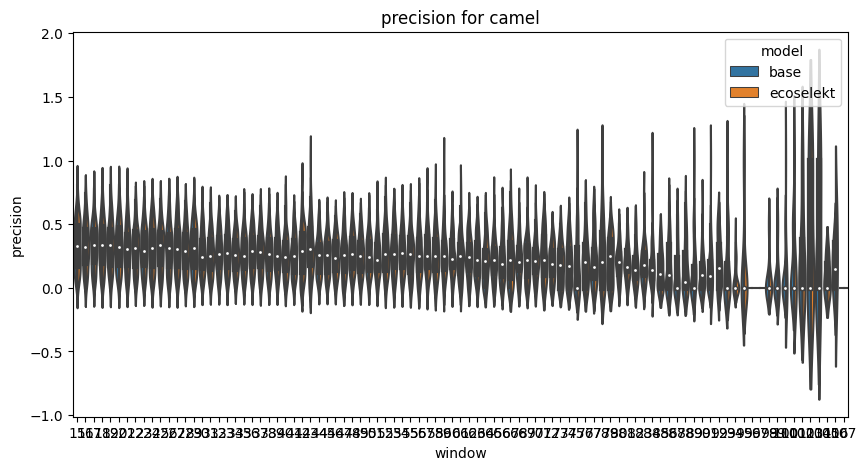

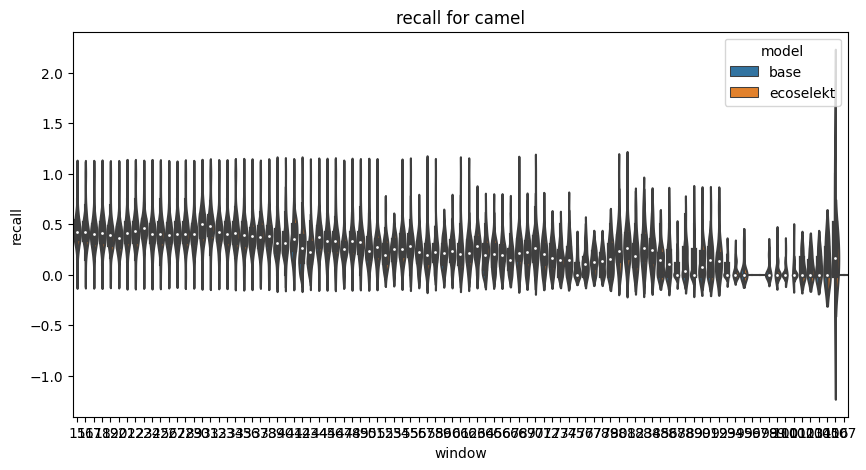

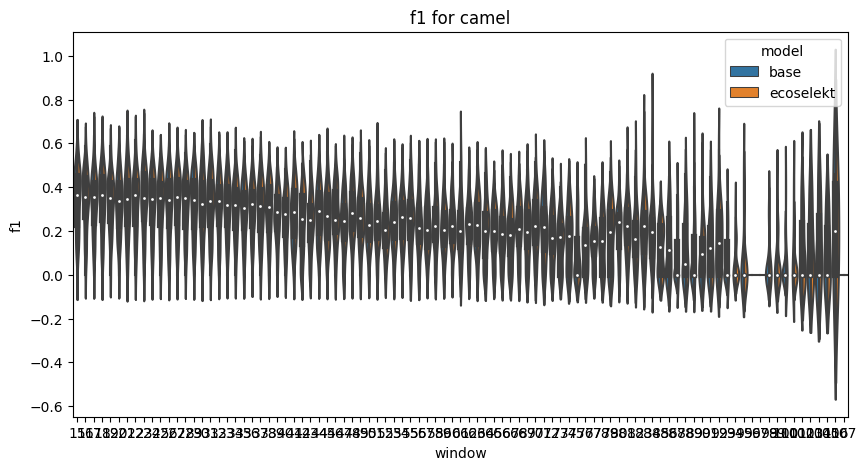

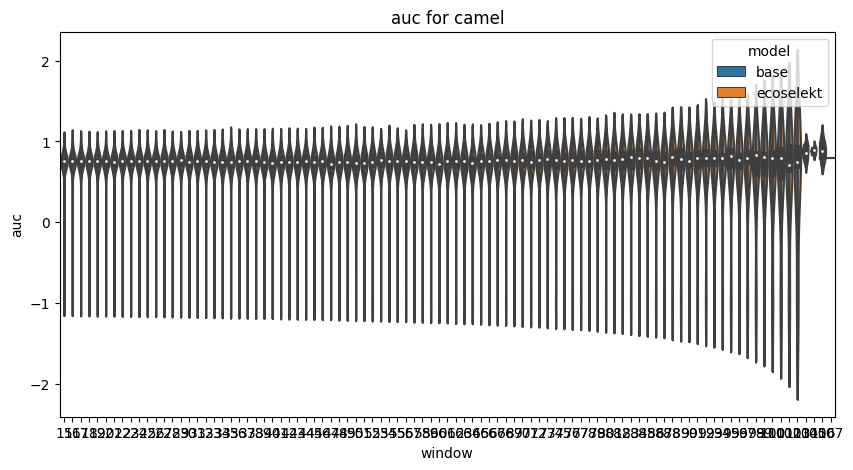

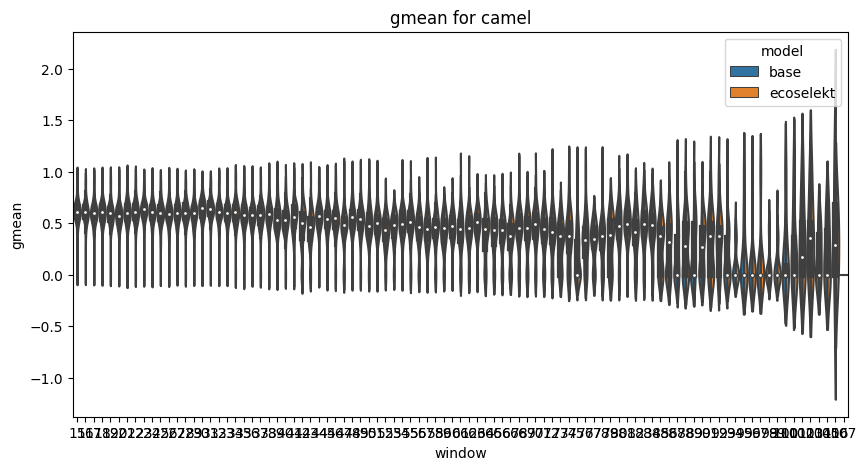

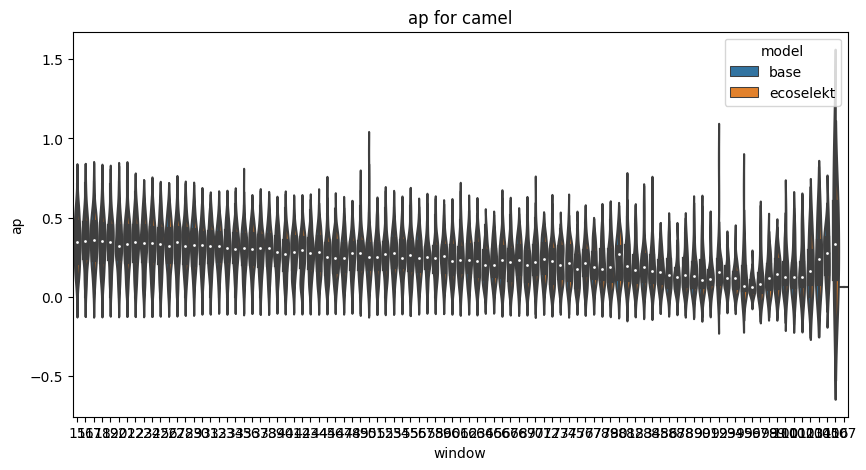

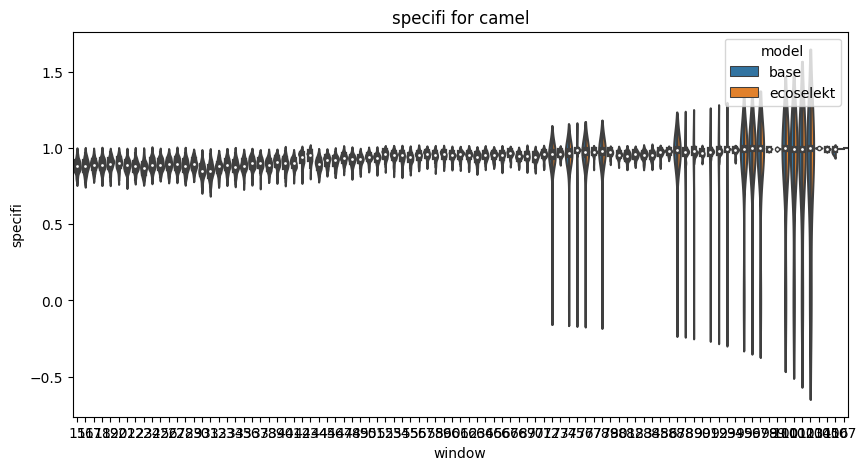

In [6]:
# concat base and ecoselekt evaluation dataframes keeping only common `window` and `test_split` then plot violin plots for each metric
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
print(eval_df.shape)

# plot violin plots for each metric
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x="window", y=metric, data=eval_df, hue="model", split=True)
    plt.title(f"{metric} for {PROJECT_NAME}")
    plt.show()


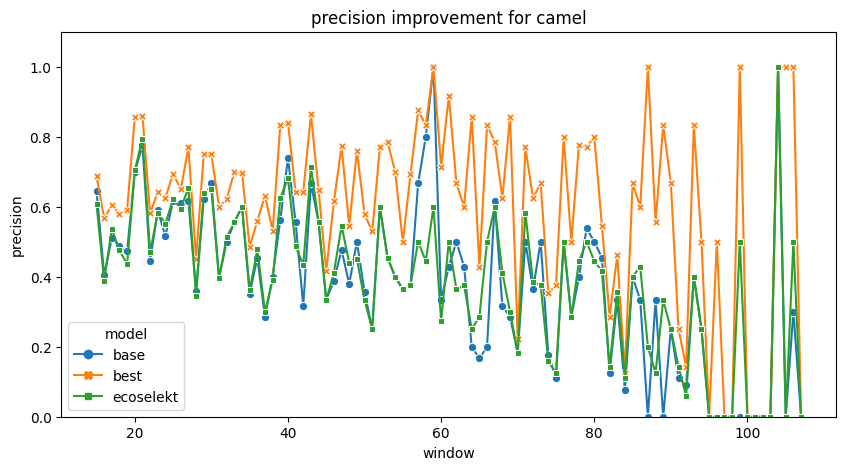

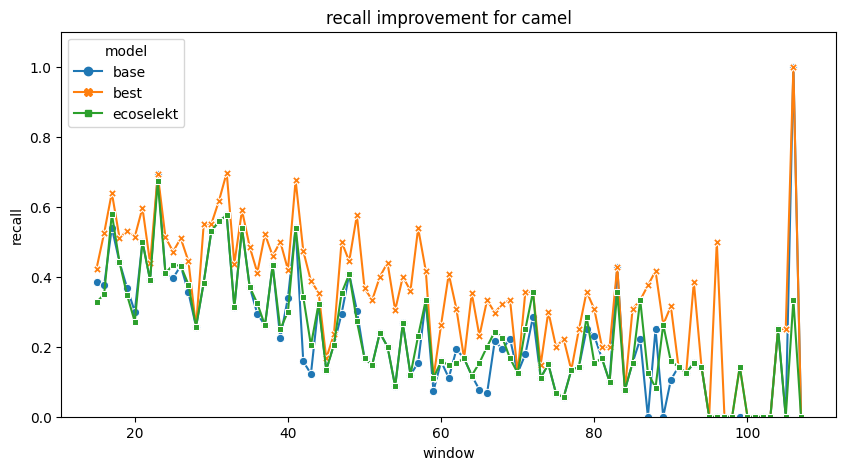

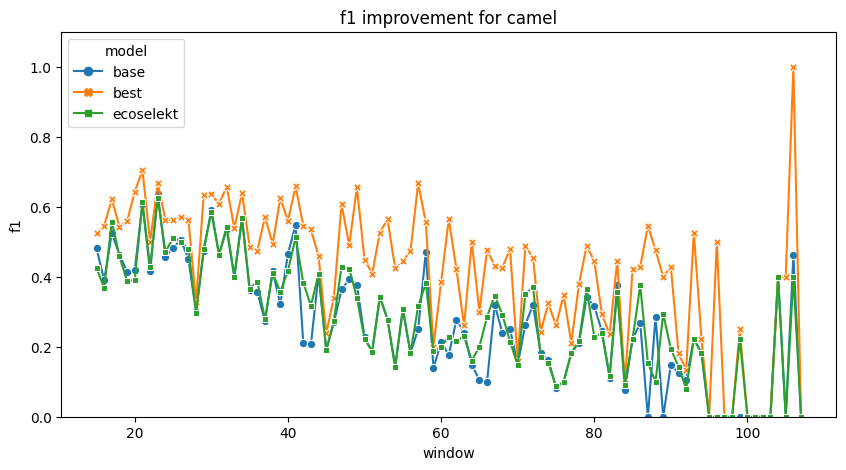

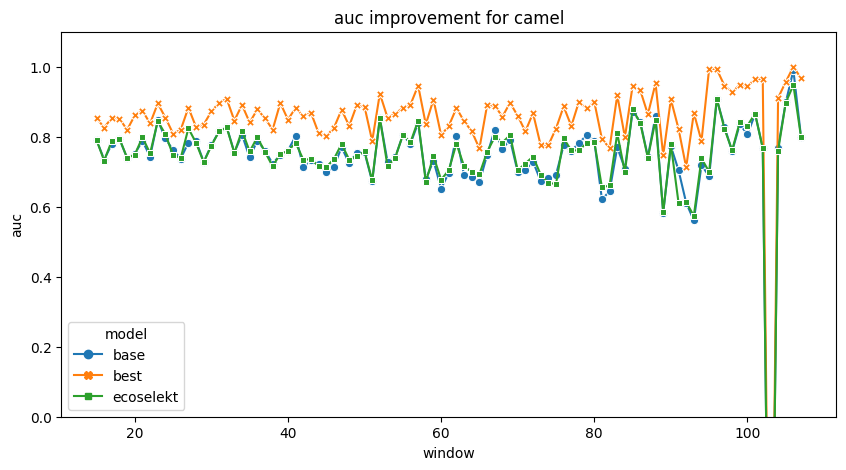

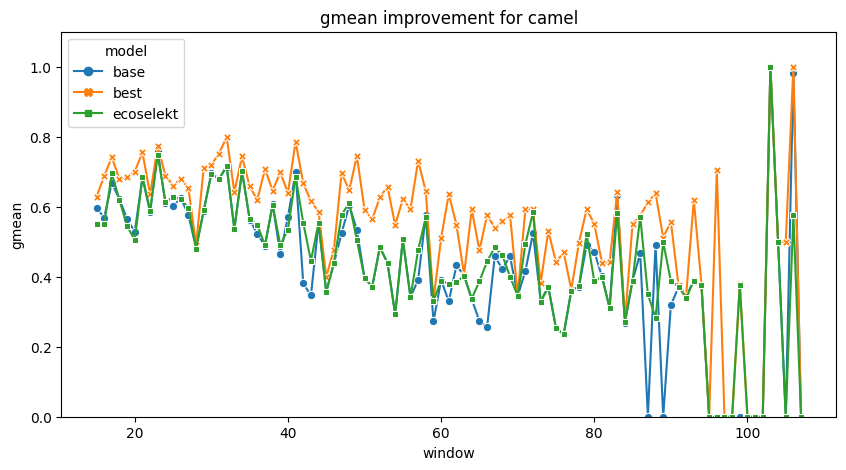

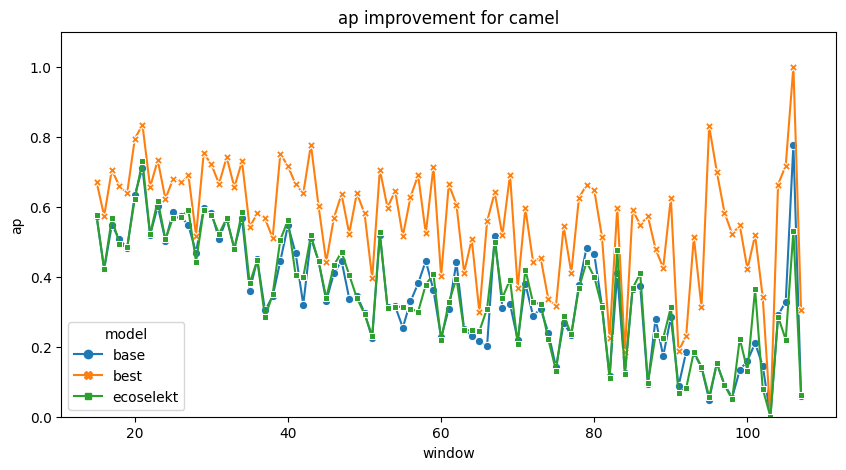

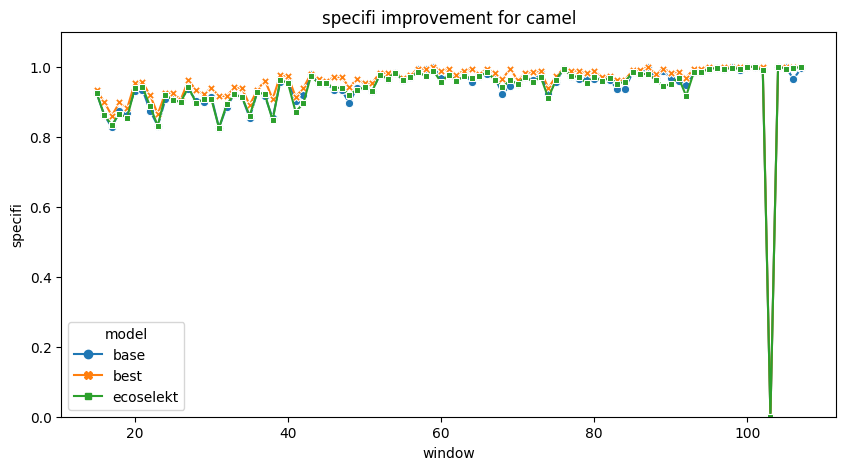

In [7]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], best_eval_df, selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
# plot percetange improvement for each metric for each window
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="window", y=metric, data=eval_df, hue="model", markers=True, style="model", dashes=False)
    plt.title(f"{metric} improvement for {PROJECT_NAME}")
    plt.ylim(0, 1.1)
    plt.show()

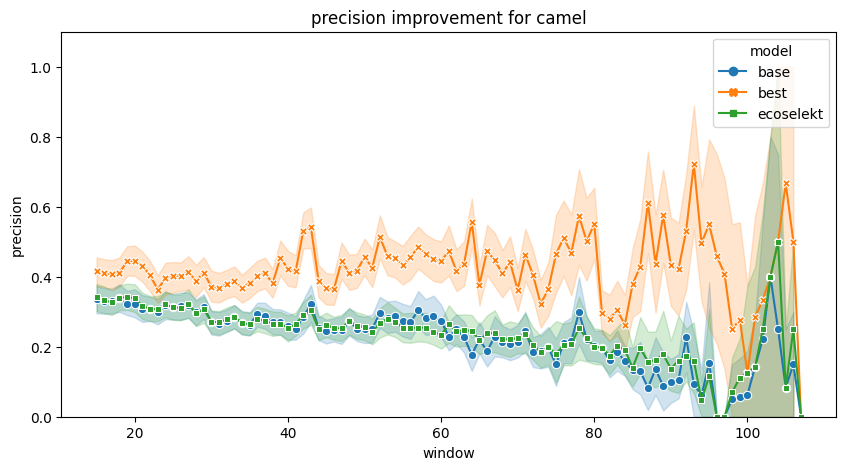

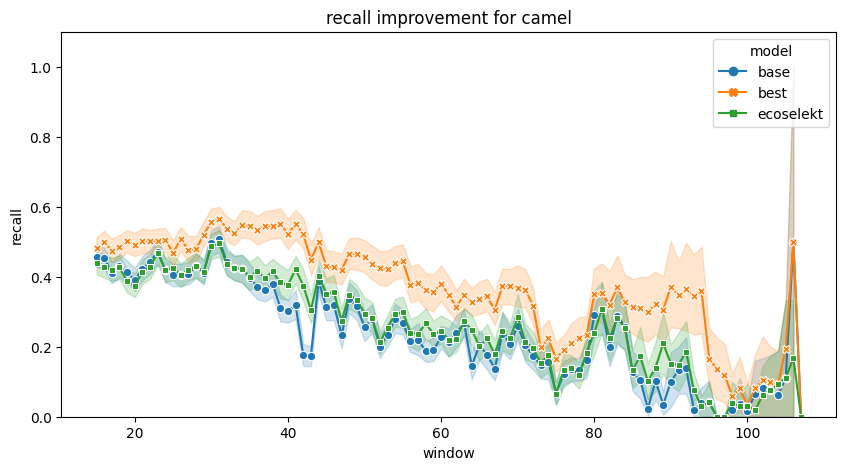

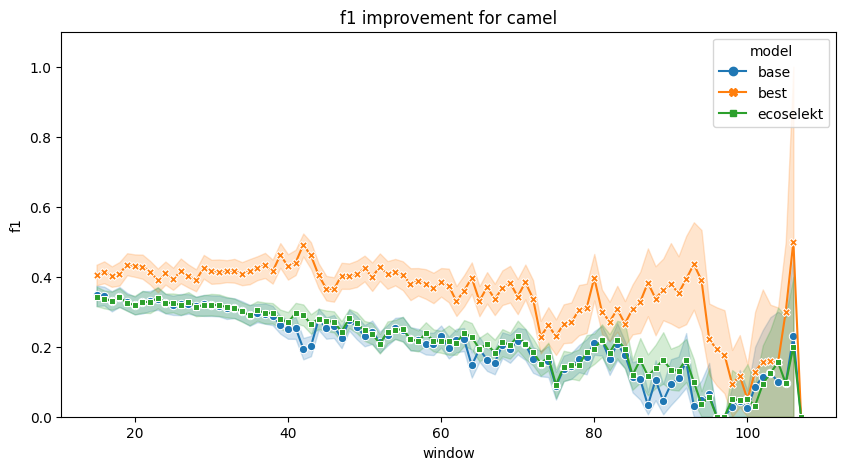

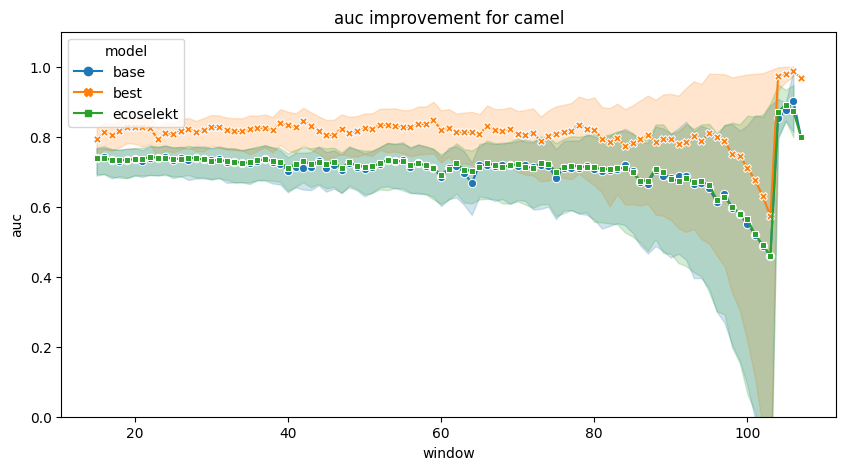

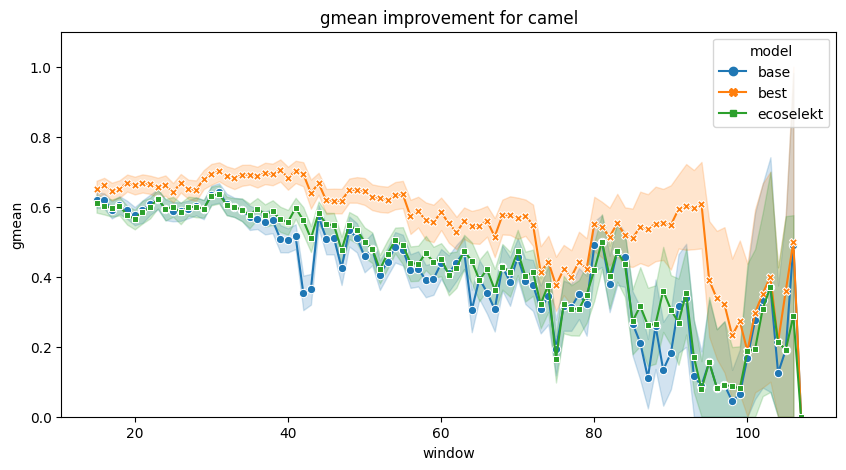

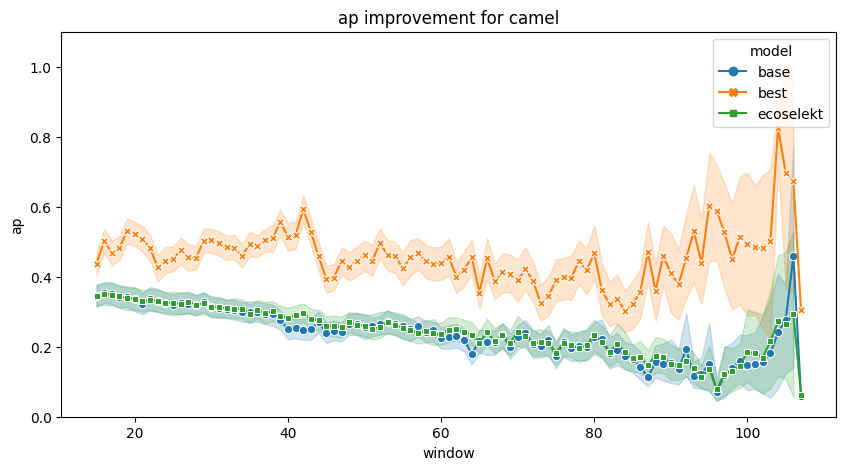

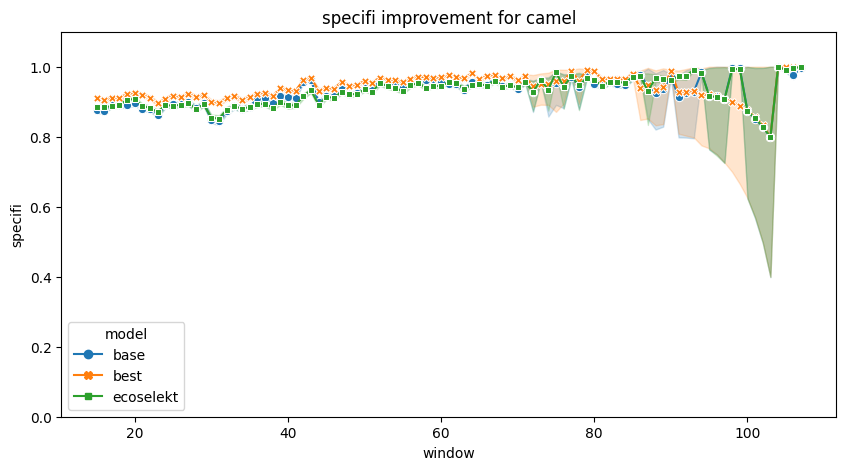

In [8]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], best_eval_df, selekt_eval_df])
# plot percetange improvement for each metric for each window
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="window", y=metric, data=eval_df, hue="model", markers=True, style="model", dashes=False)
    plt.title(f"{metric} improvement for {PROJECT_NAME}")
    plt.ylim(0, 1.1)
    plt.show()

In [9]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
_, p = wilcoxon(eval_df[eval_df["model"] == "ecoselekt"]["auc"], eval_df[eval_df["model"] == "base"]["auc"])
print(f"Wilcoxon test p-value: {p}")
print(f"Wilcoxon test significance: {p < ALPHA}")

Wilcoxon test p-value: 0.02586044771469341
Wilcoxon test significance: True


In [10]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
_, p = wilcoxon(eval_df[eval_df["model"] == "ecoselekt"]["recall"], eval_df[eval_df["model"] == "base"]["recall"])
print(f"Wilcoxon test p-value: {p}")
print(f"Wilcoxon test significance: {p < ALPHA}")

Wilcoxon test p-value: 0.05832193054148546
Wilcoxon test significance: False


In [11]:
bestmodel_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_best_model_per_test_split.csv")
bestmodel_df.drop(columns=["Unnamed: 0"], inplace=True)
print(bestmodel_df.shape)
bestmodel_df.head()

(874200, 4)


commit_id  window  test_split  model_version
0  f277c1b035a6f98040e1274a90362777bb973cc3      15          16             15
1  232f61dbb8c43a3e346138d174d823ad62d05967      15          16             14
2  f2f922ce289f7ee11edfde2a093b9af4951e6a4f      15          16             14
3  bf857a2fb3e3d9dc94bfb515b7cb039b268a2f55      15          16             14
4  22ad756275d813acc27b732ec1e2cbdb2e8eb126      15          16             14

In [12]:
selektmodel_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_selected_model_per_test_split.csv")
selektmodel_df.drop(columns=["Unnamed: 0"], inplace=True)
print(selektmodel_df.shape)
selektmodel_df.head()

(874200, 4)


commit_id  window  test_split  model_version
0  02d95d4650196228ef63acffc033e99c924b7dd0      15          16             15
1  02ff15739a00397e8f246a5789eee87d15cdbba1      15          16             15
2  039bb17e8ae63b93890f2a6536cf0553351a07df      15          16             15
3  04c51fb2693009d4ca15b200d4bac377a6e334a7      15          16             15
4  070129e8d74de9014ec8f3b15cf8dc39afd3c2ae      15          16             15

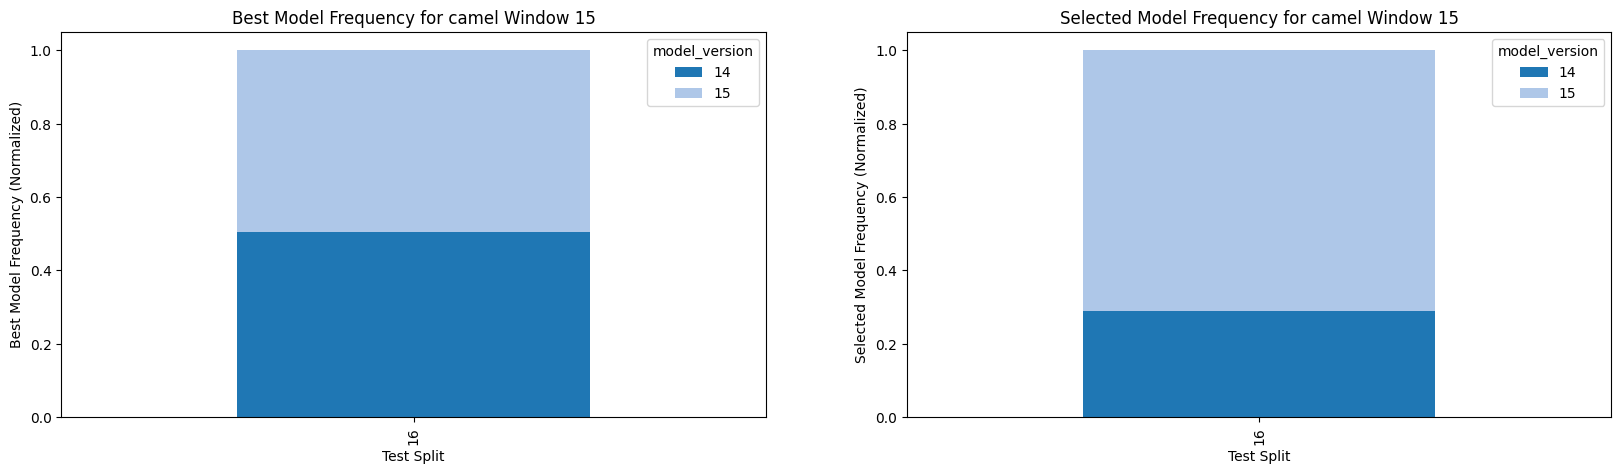

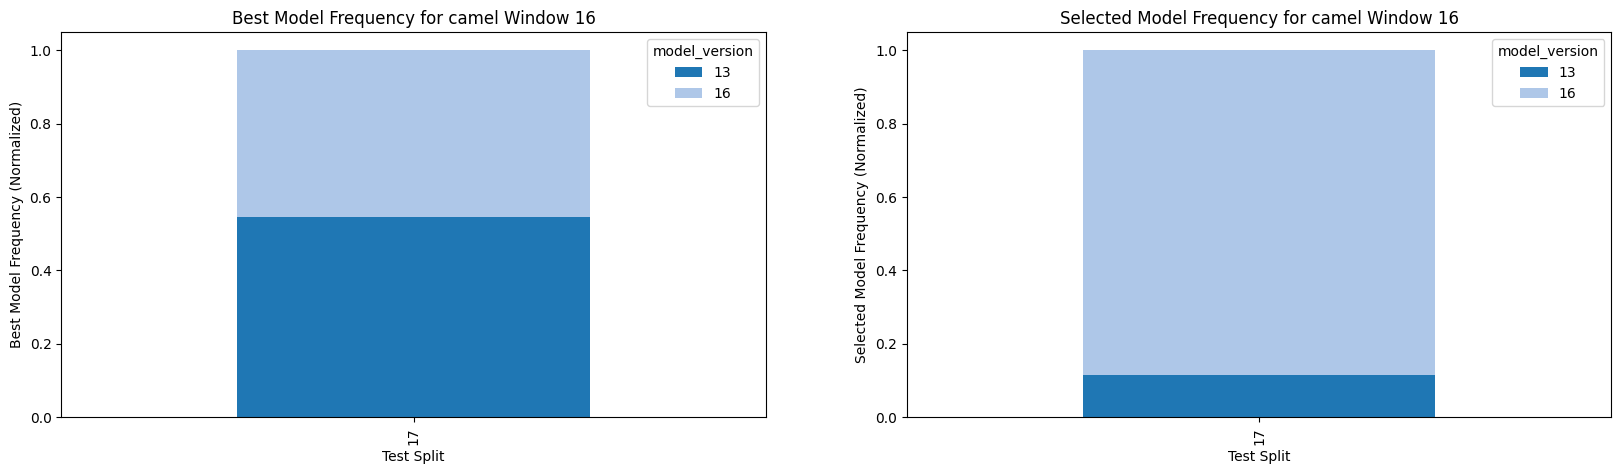

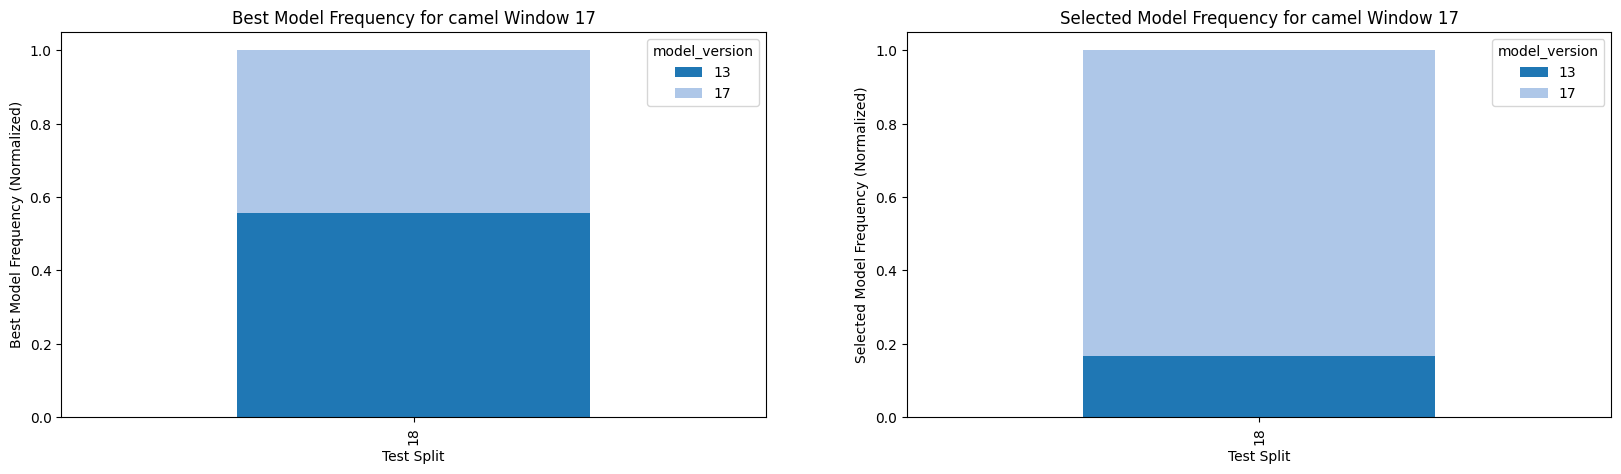

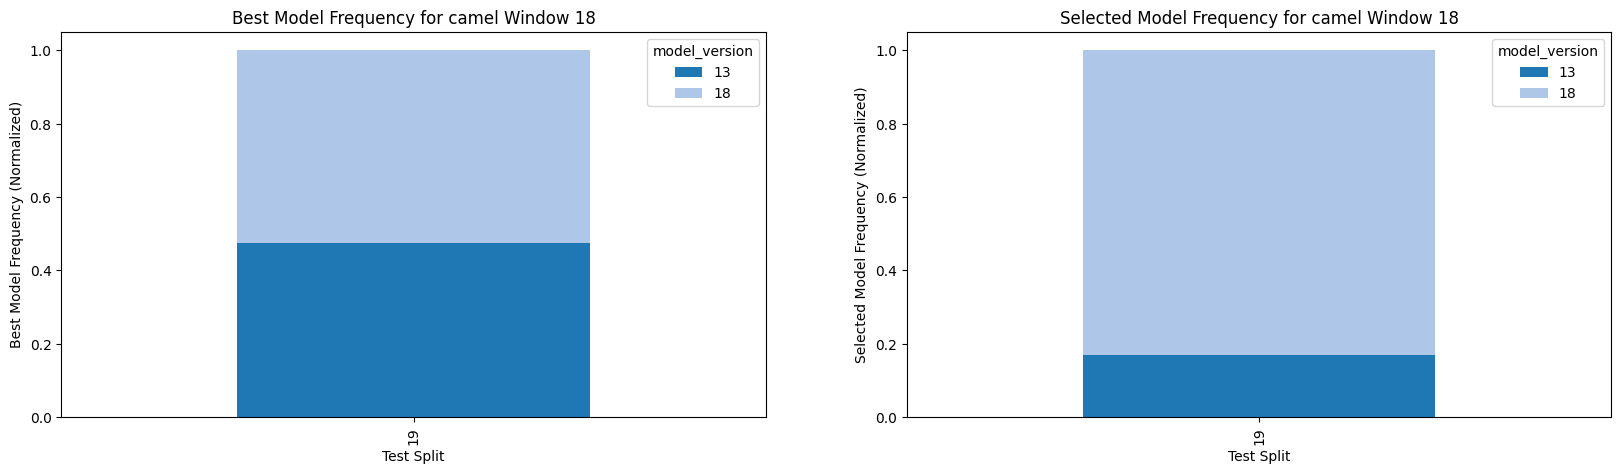

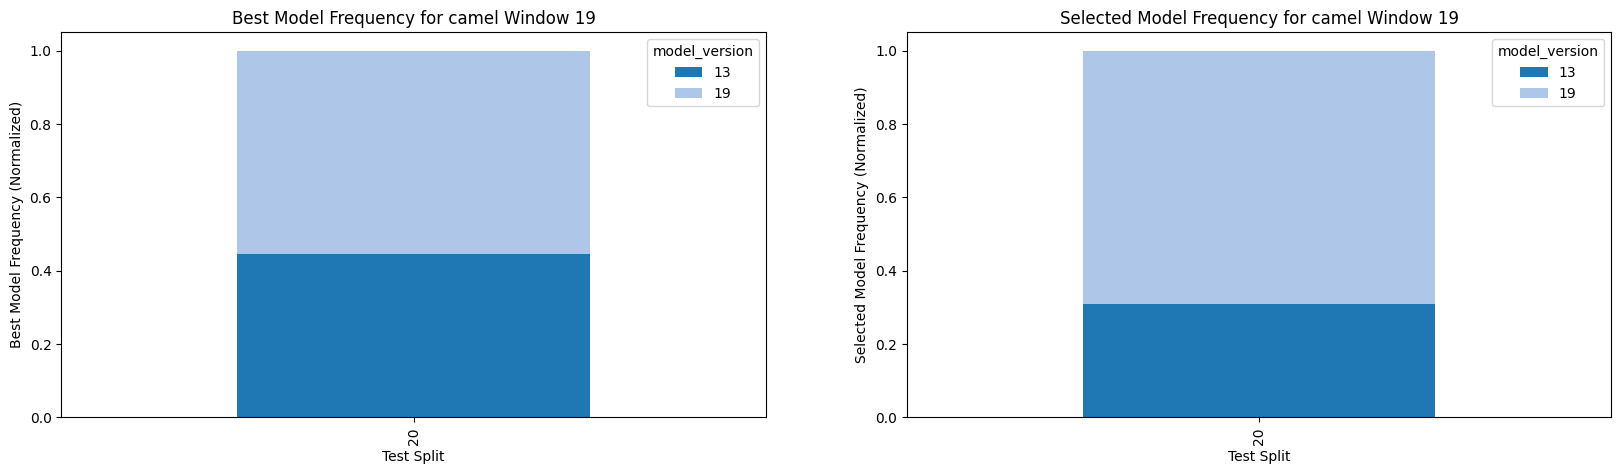

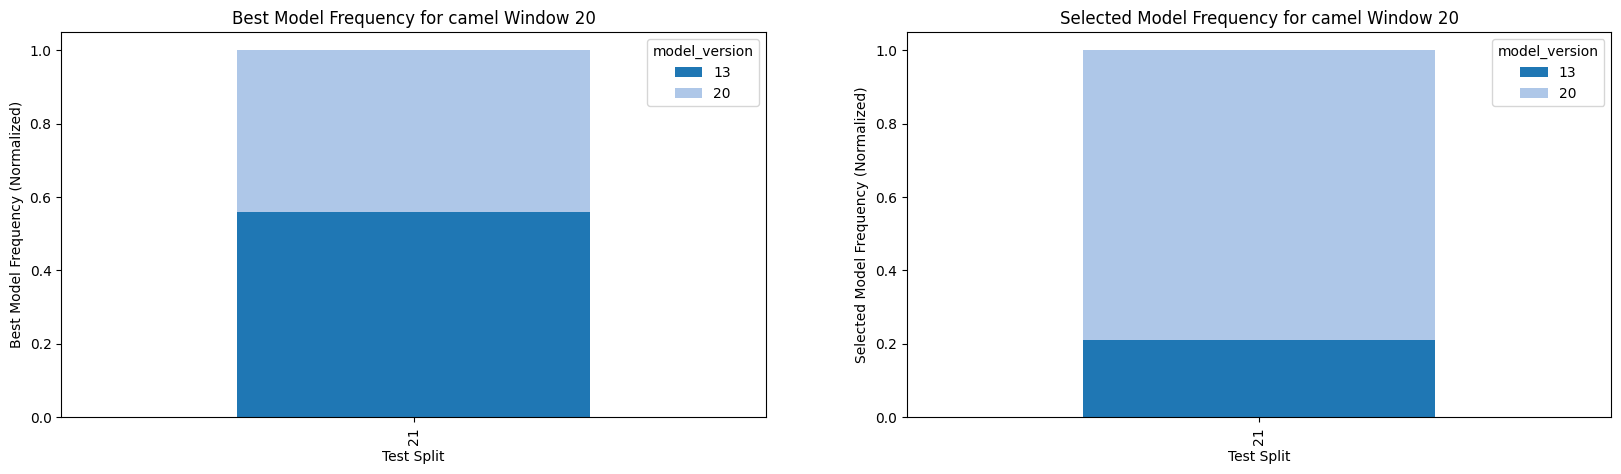

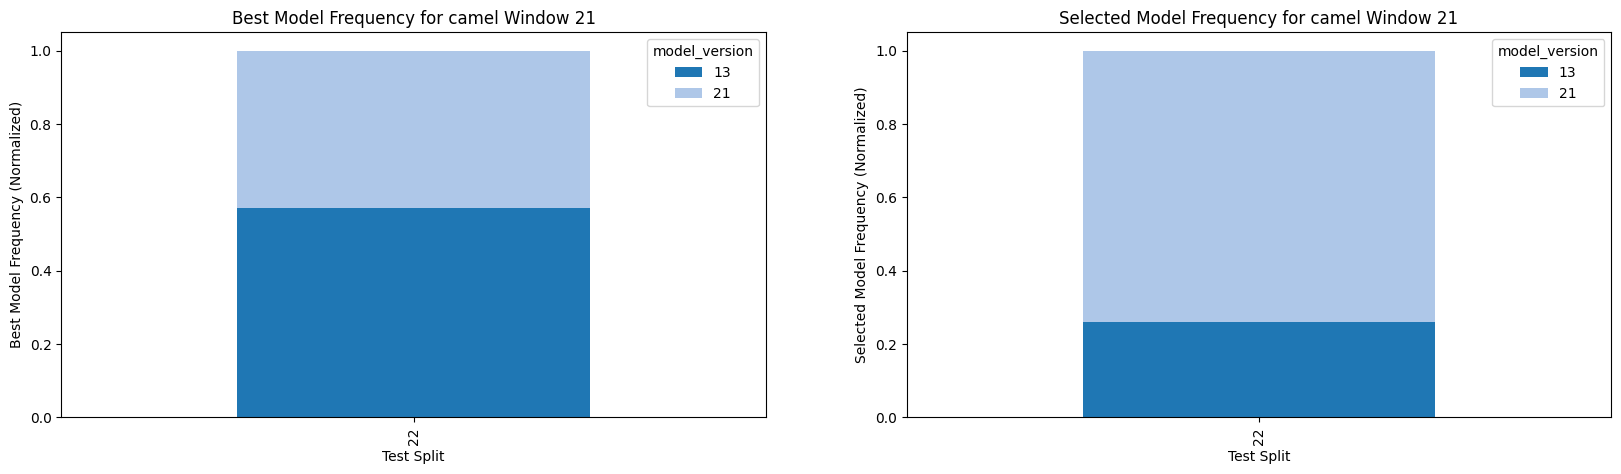

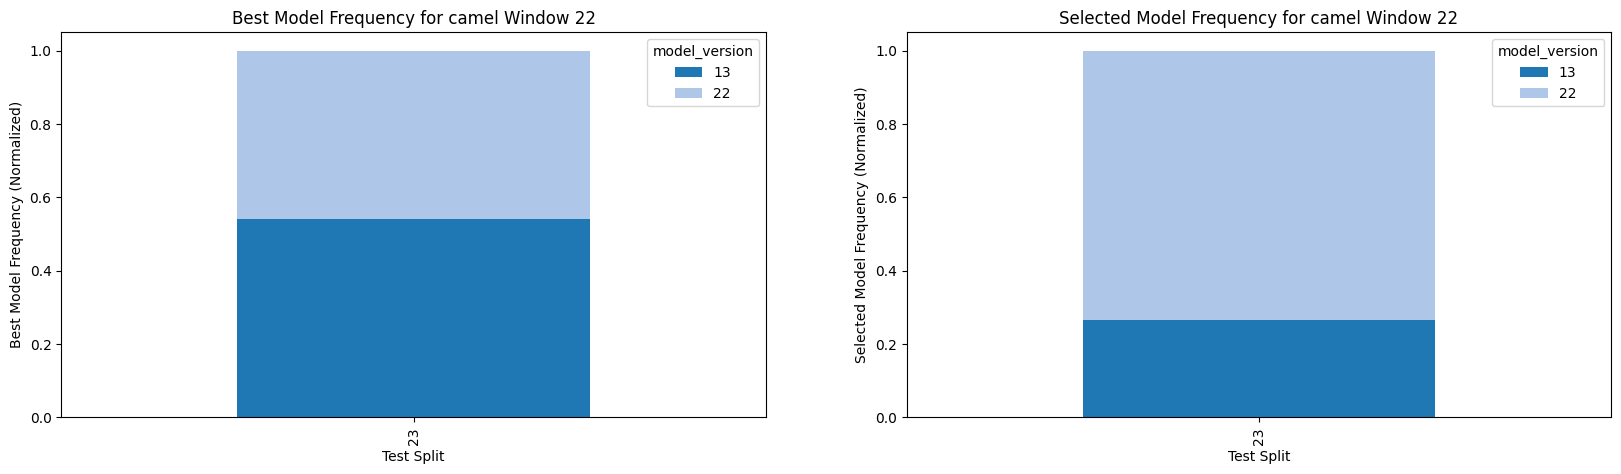

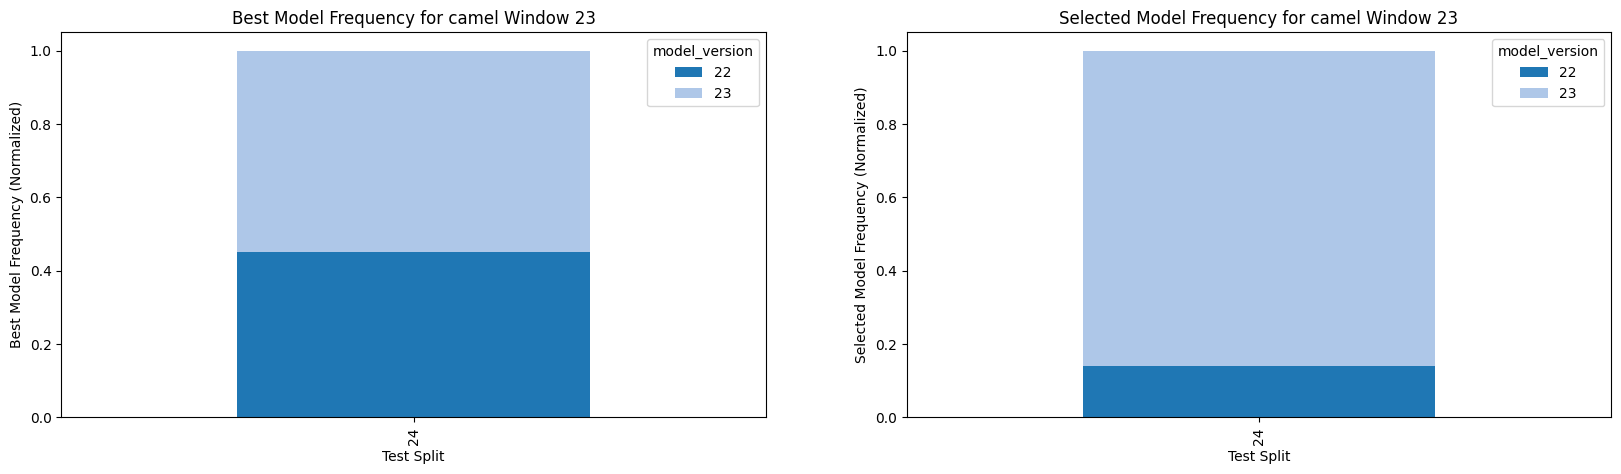

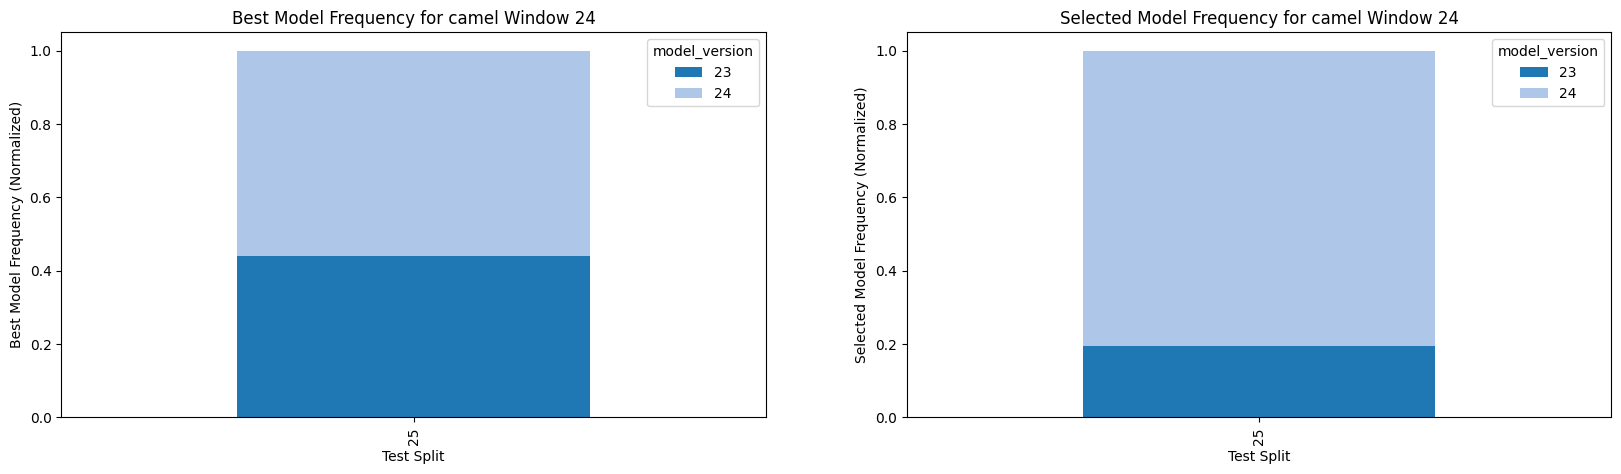

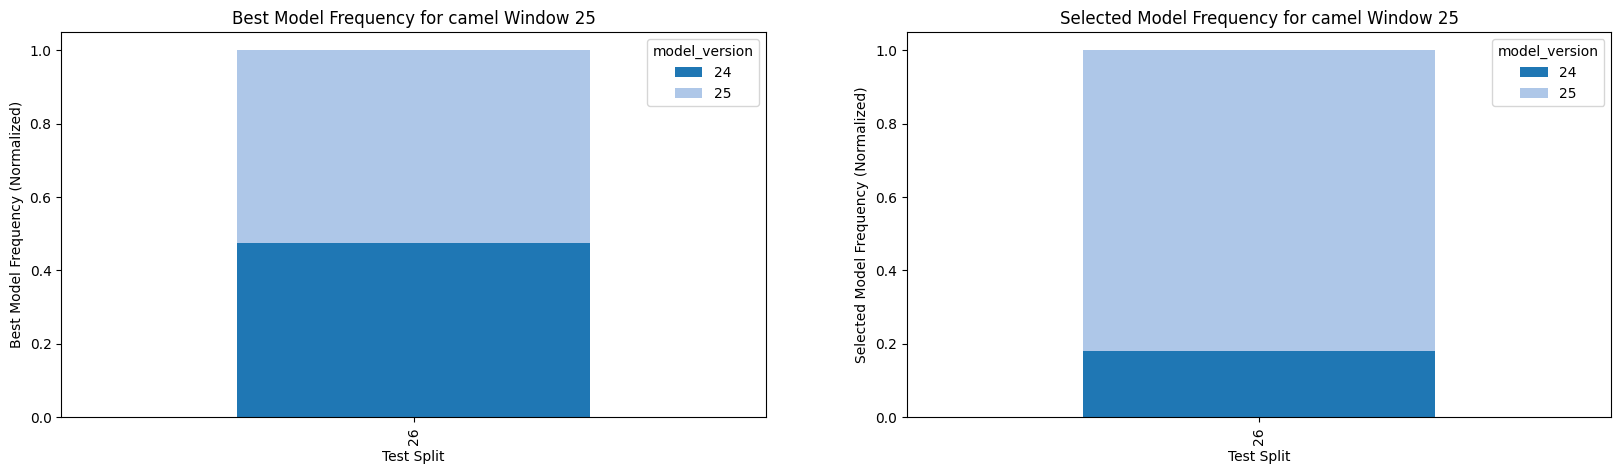

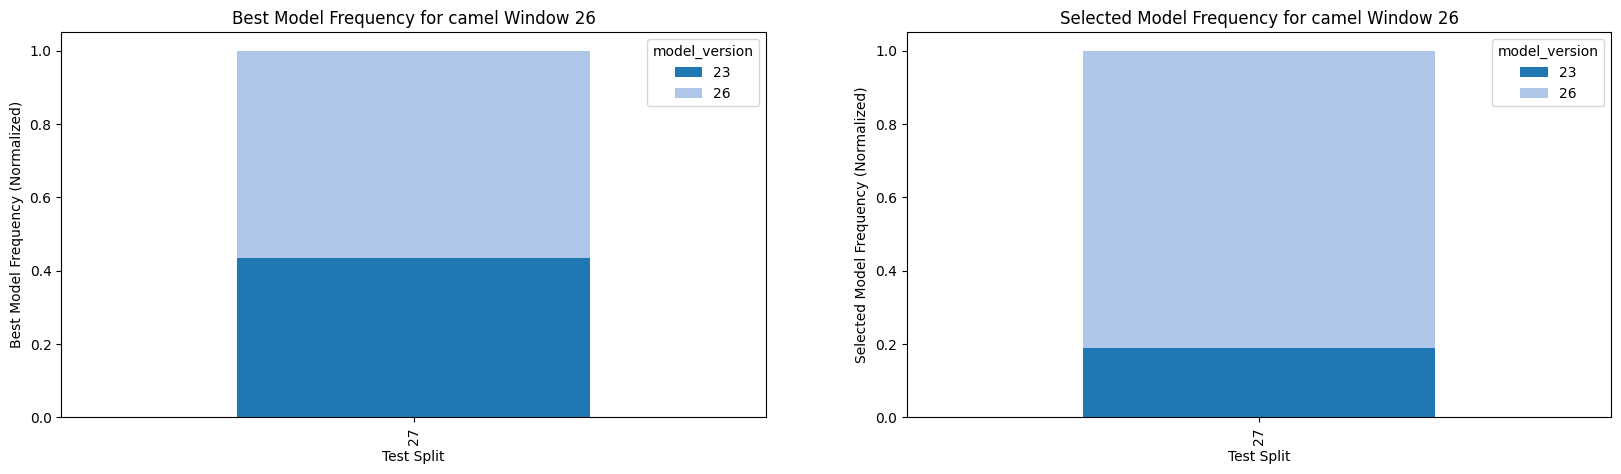

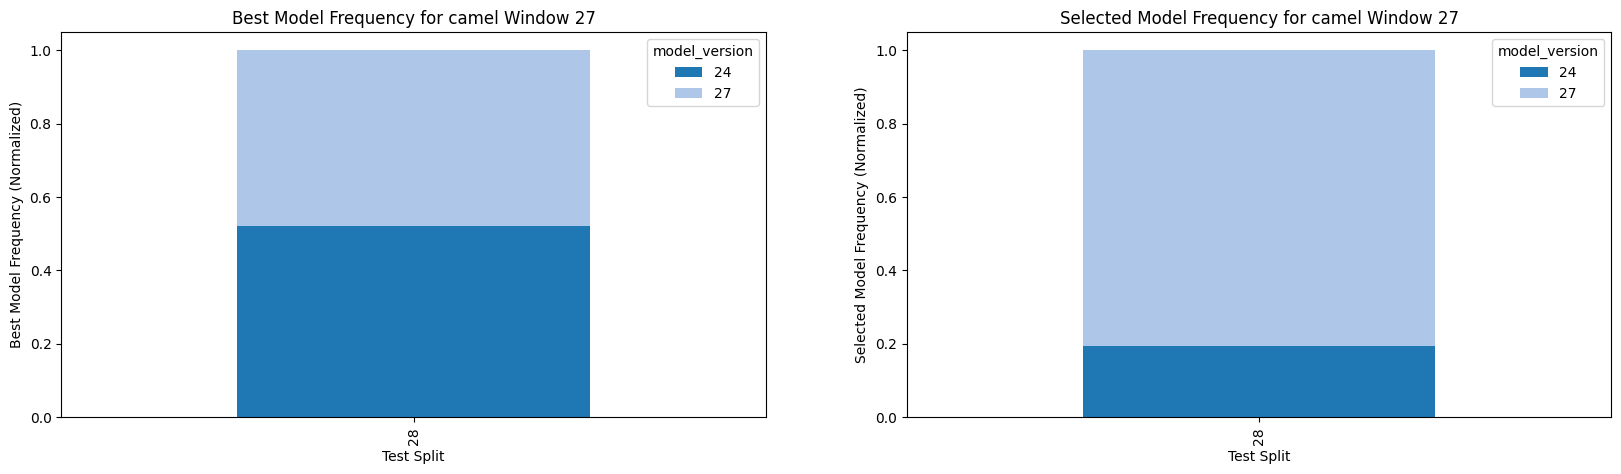

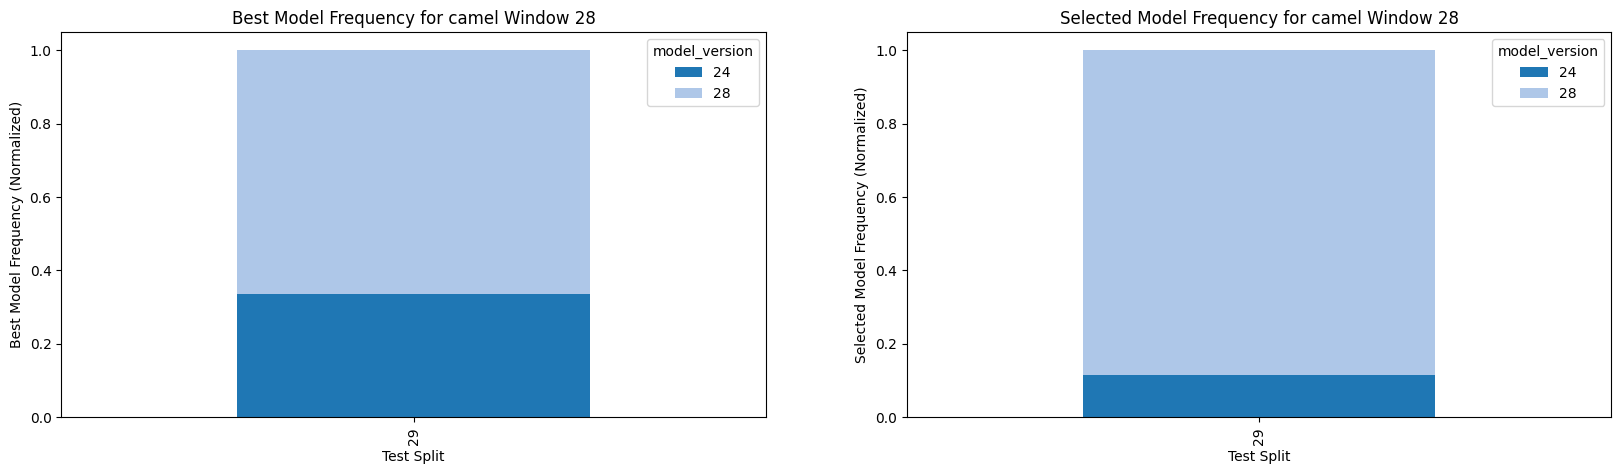

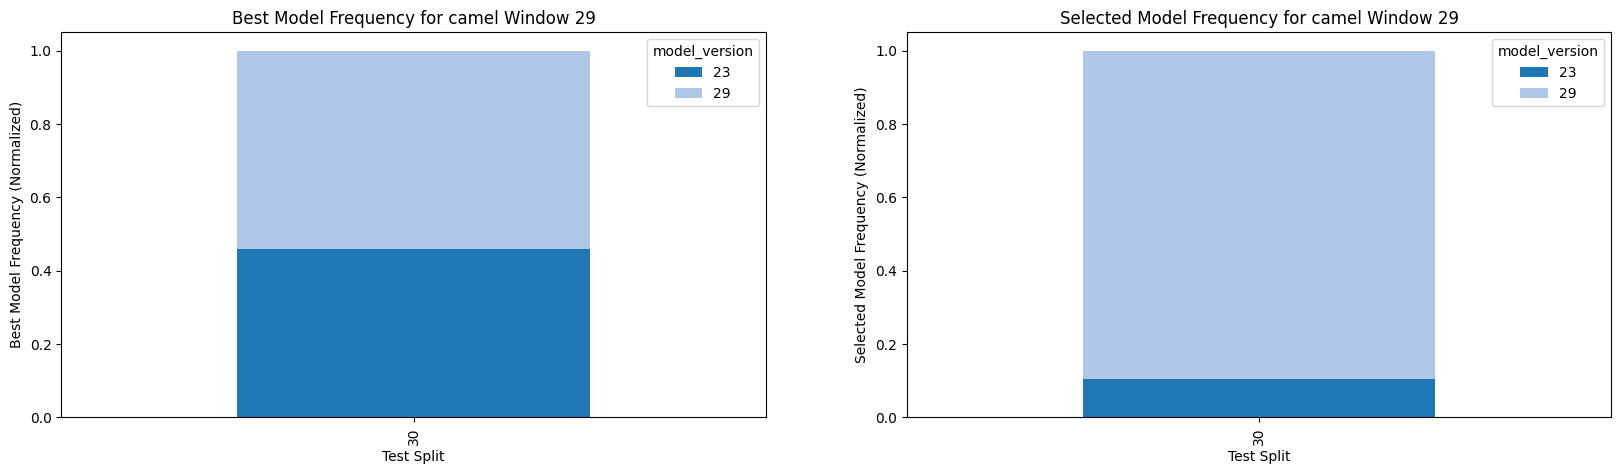

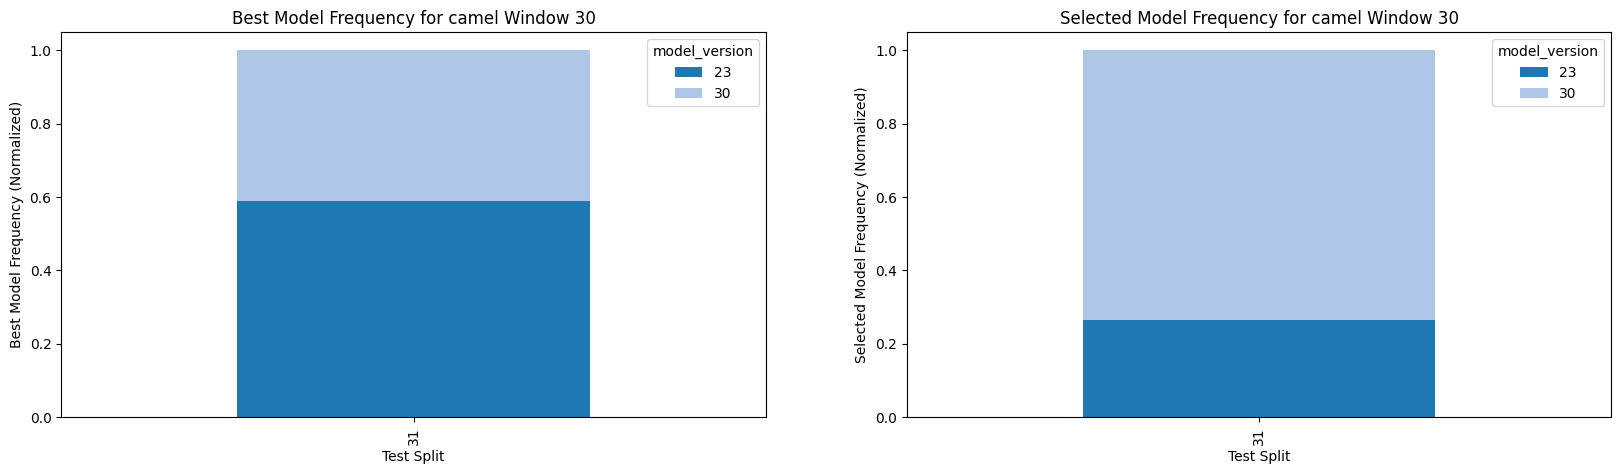

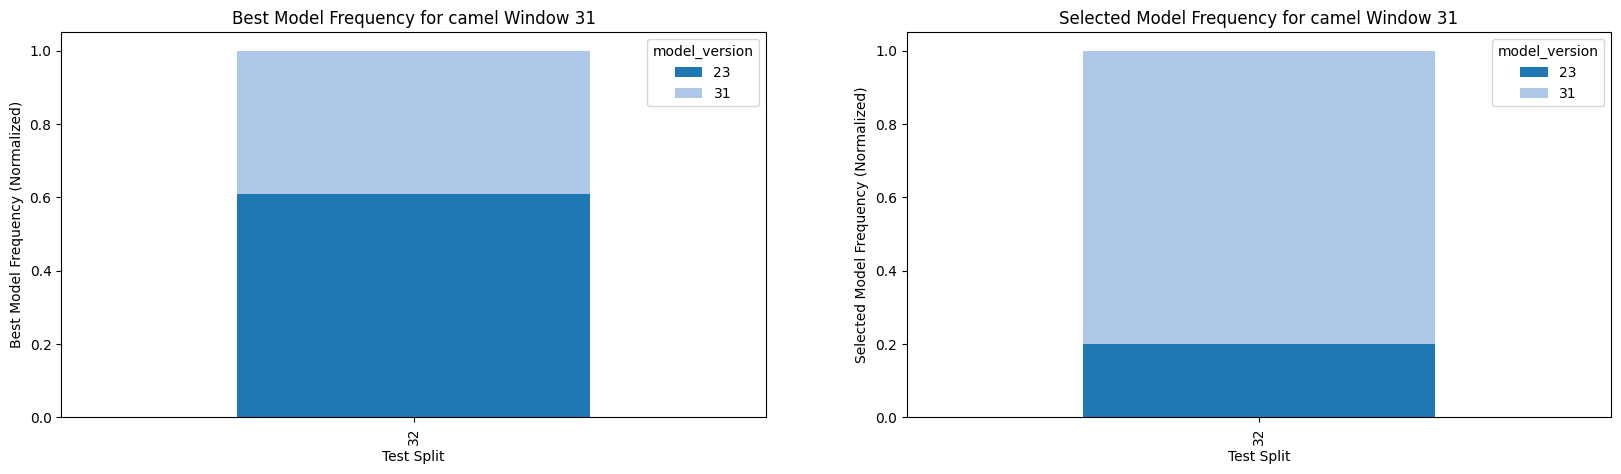

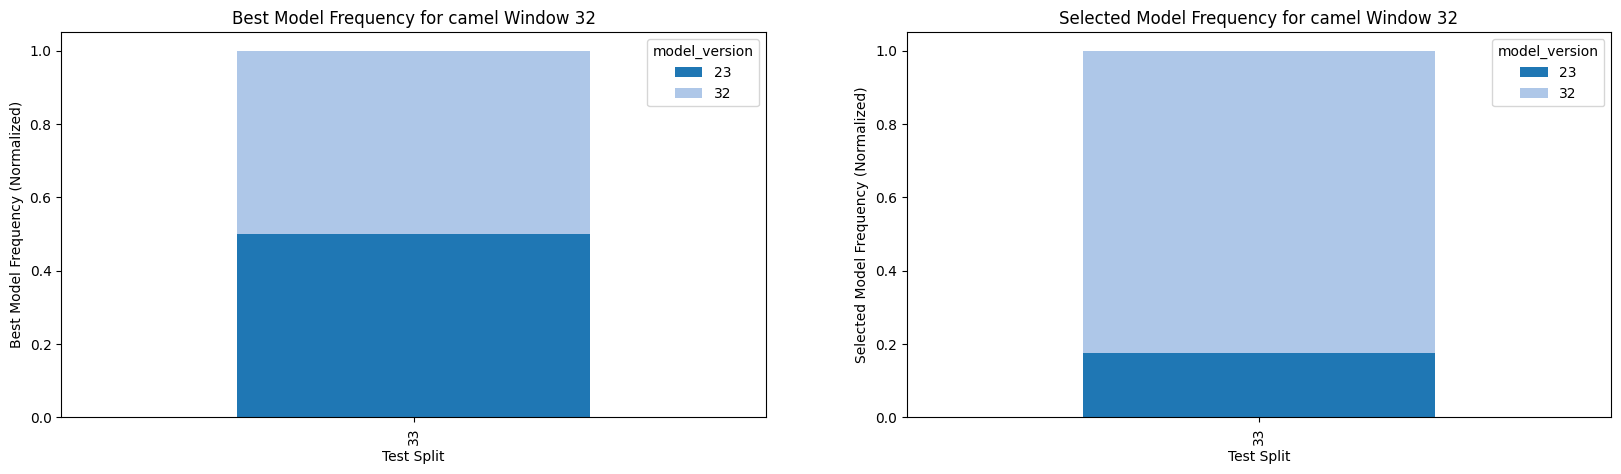

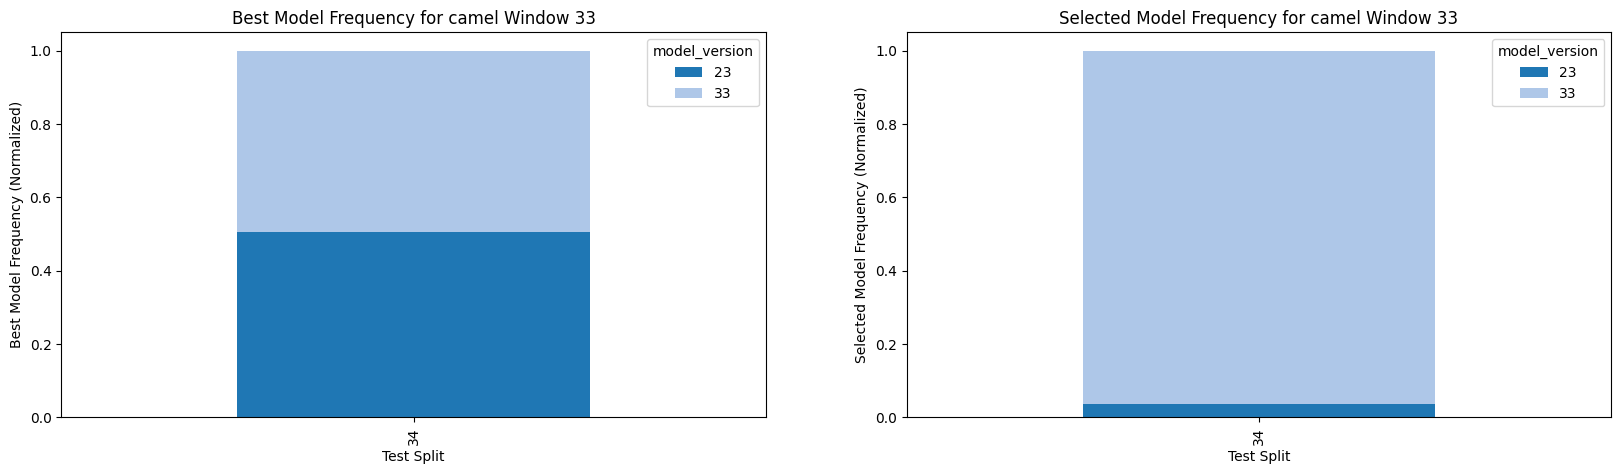

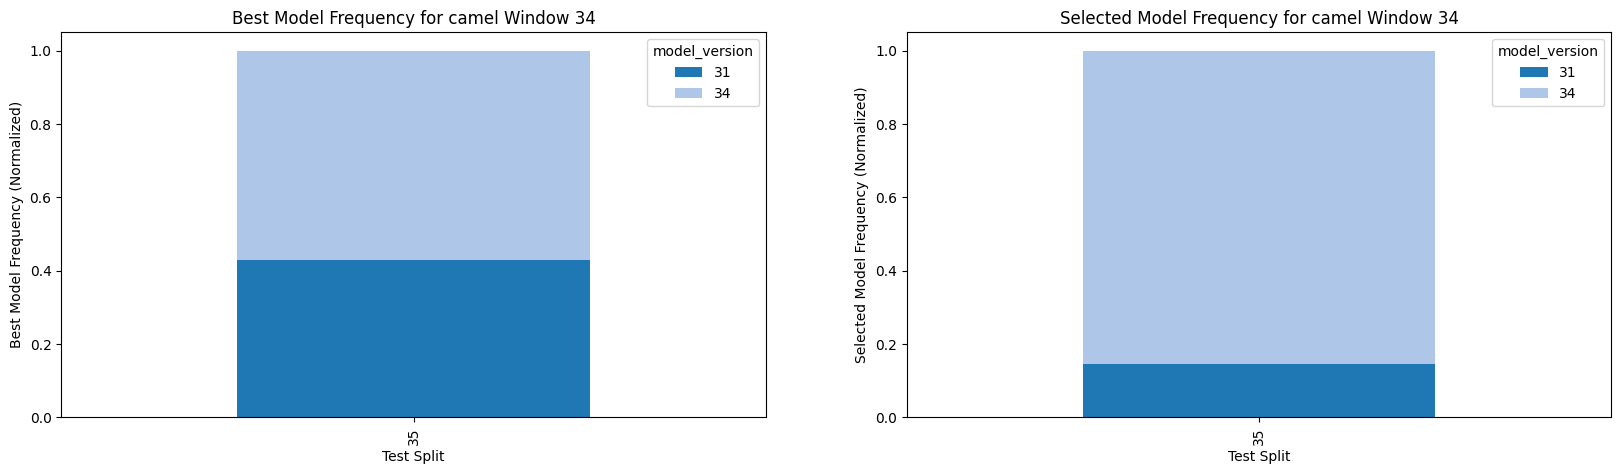

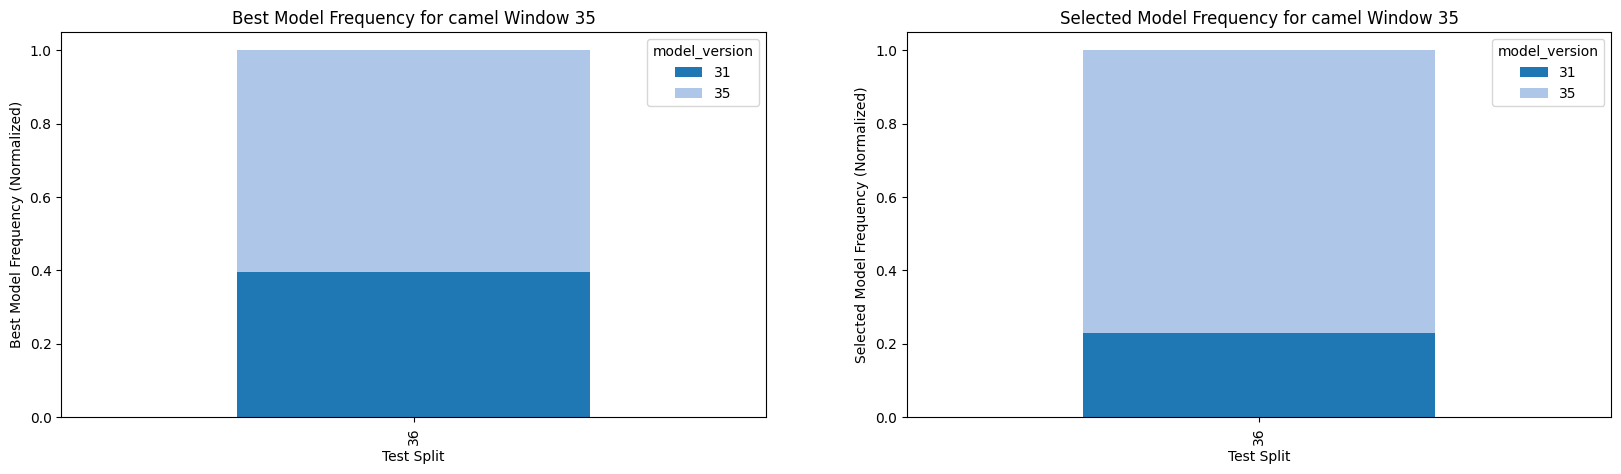

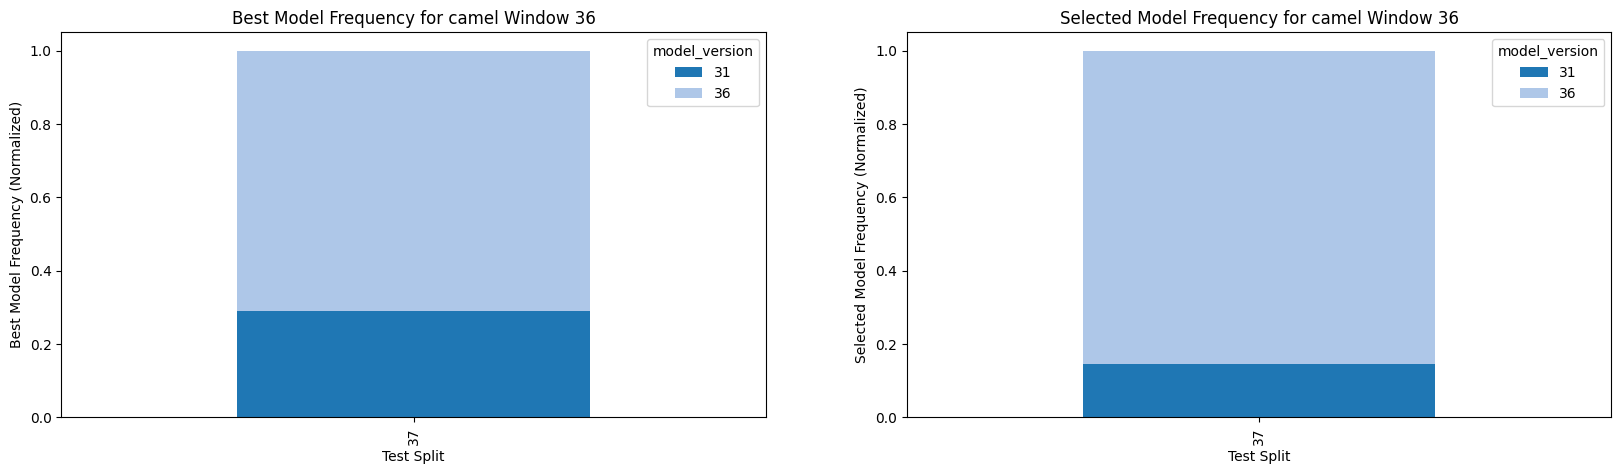

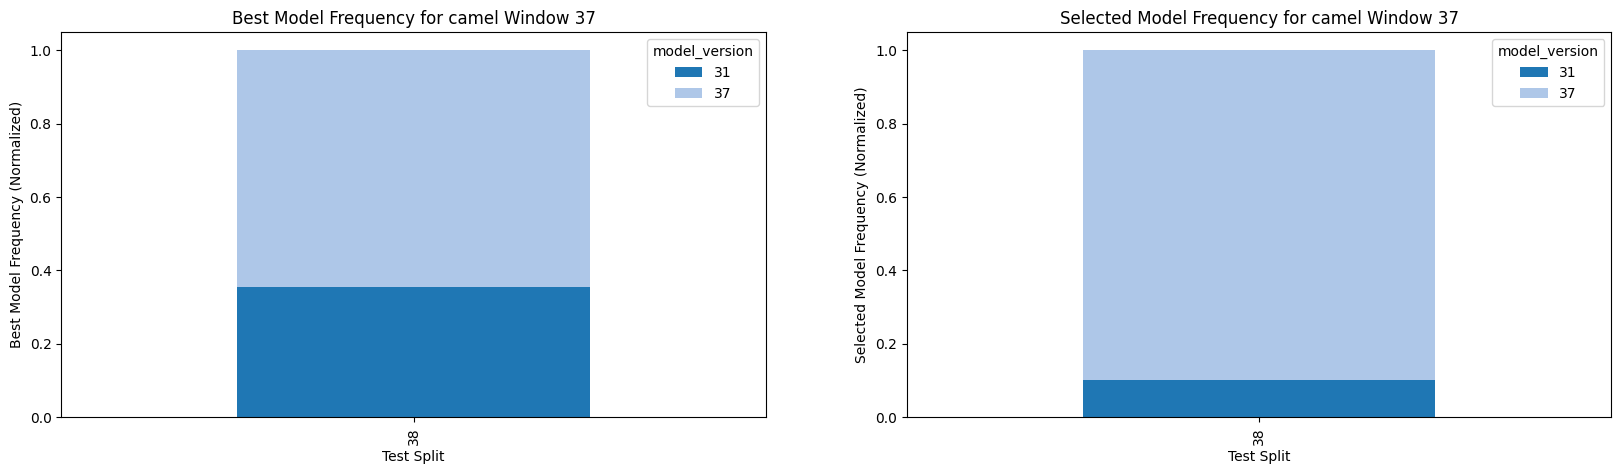

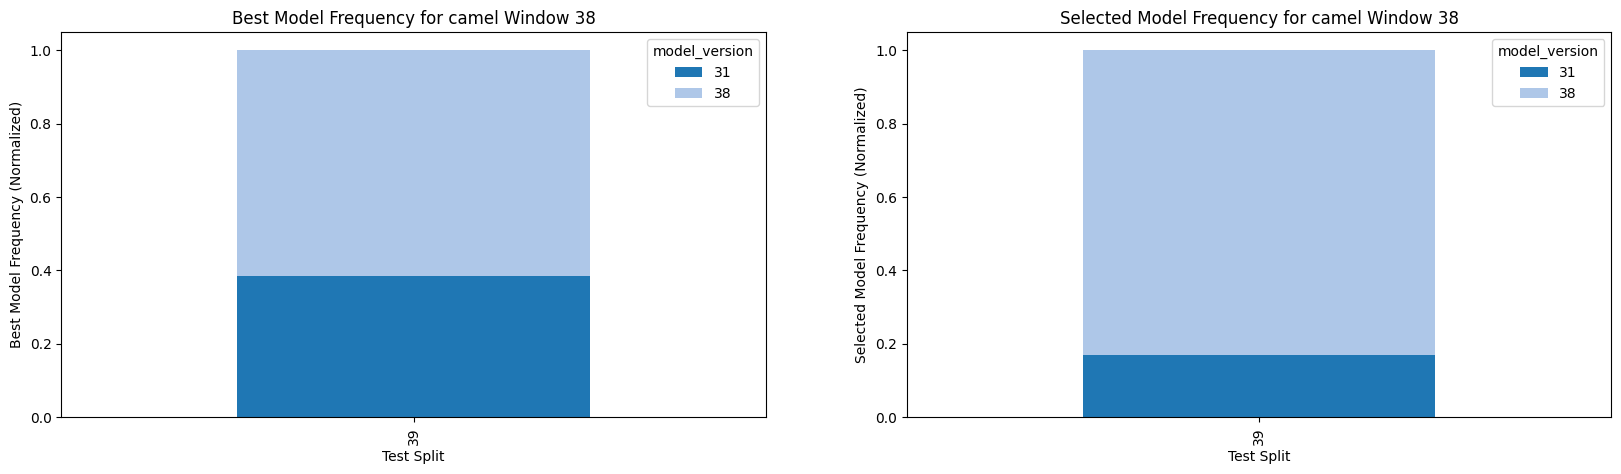

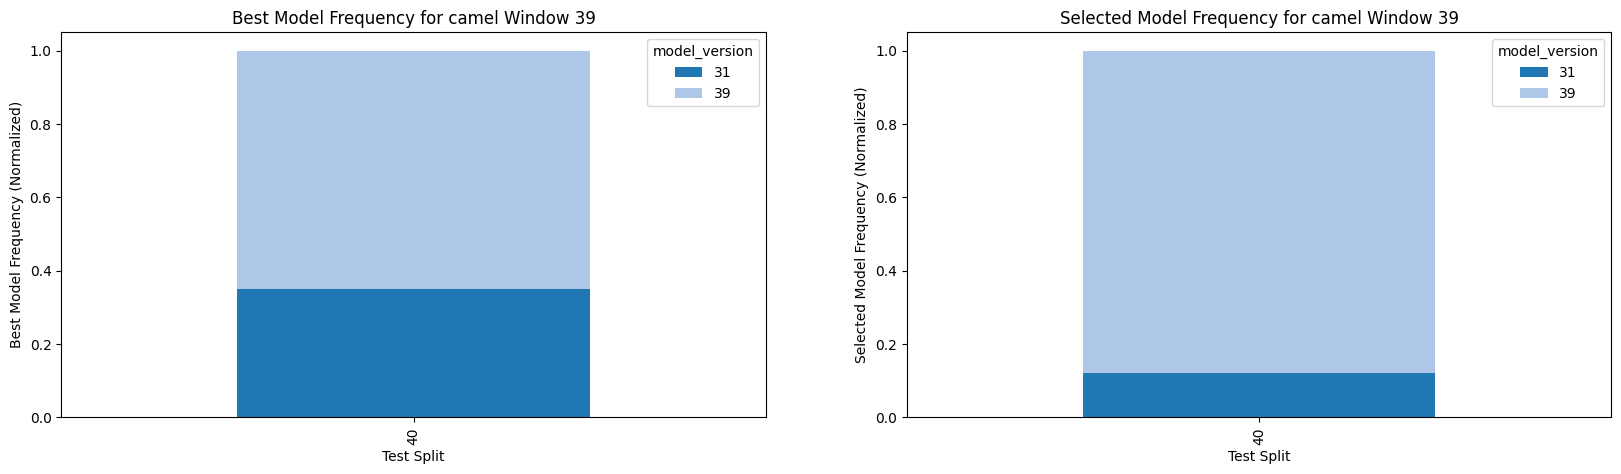

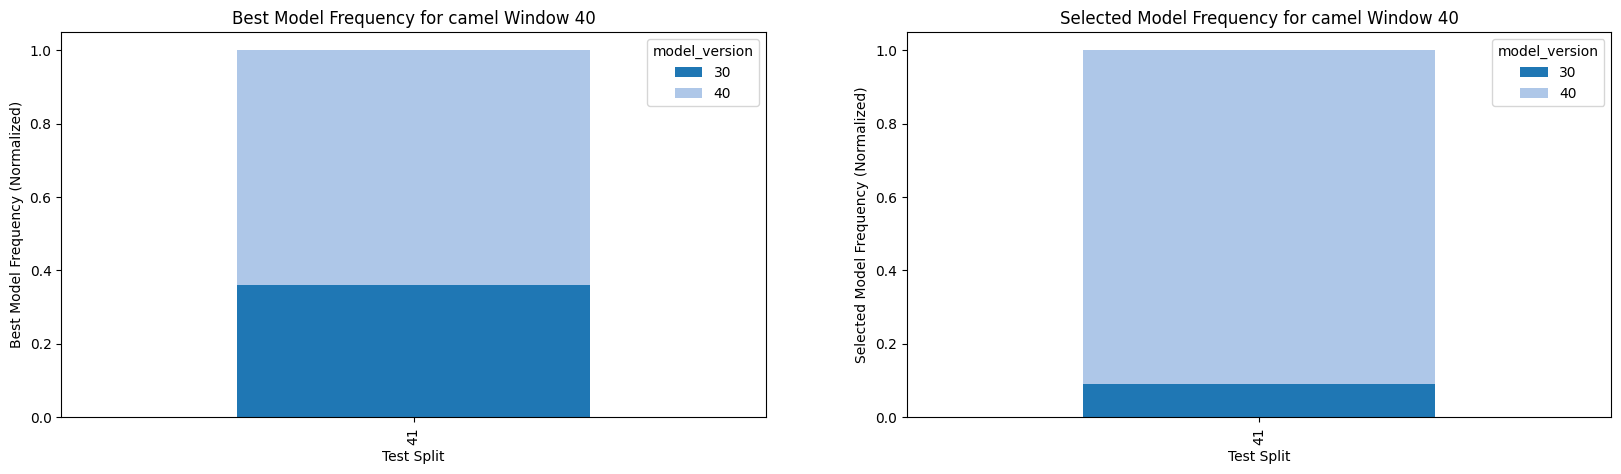

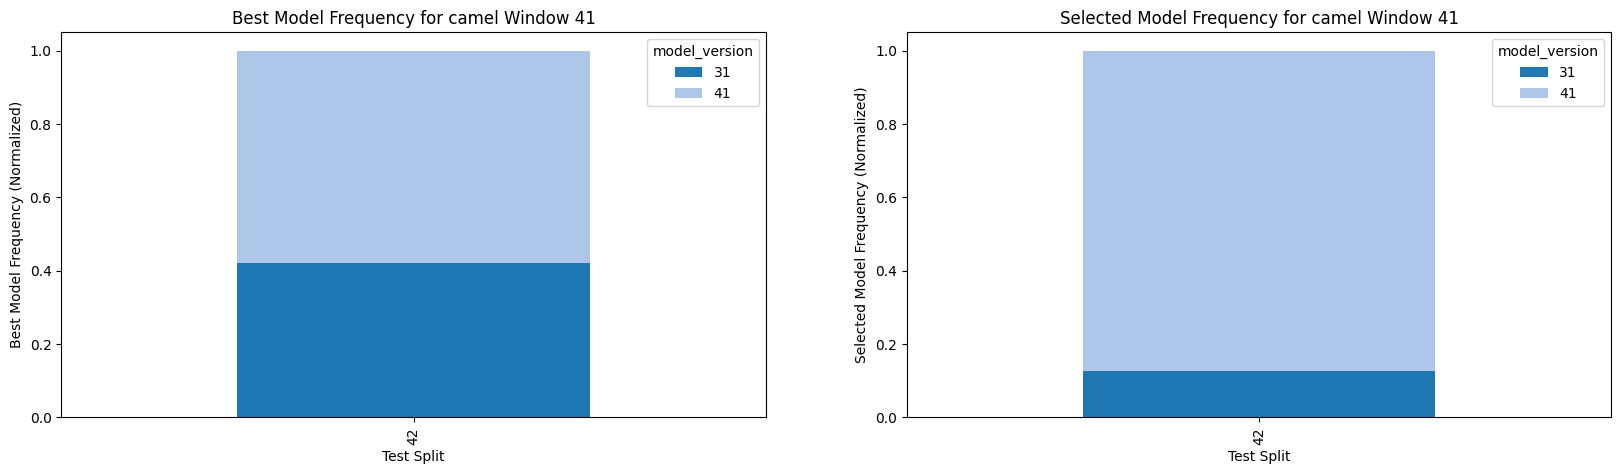

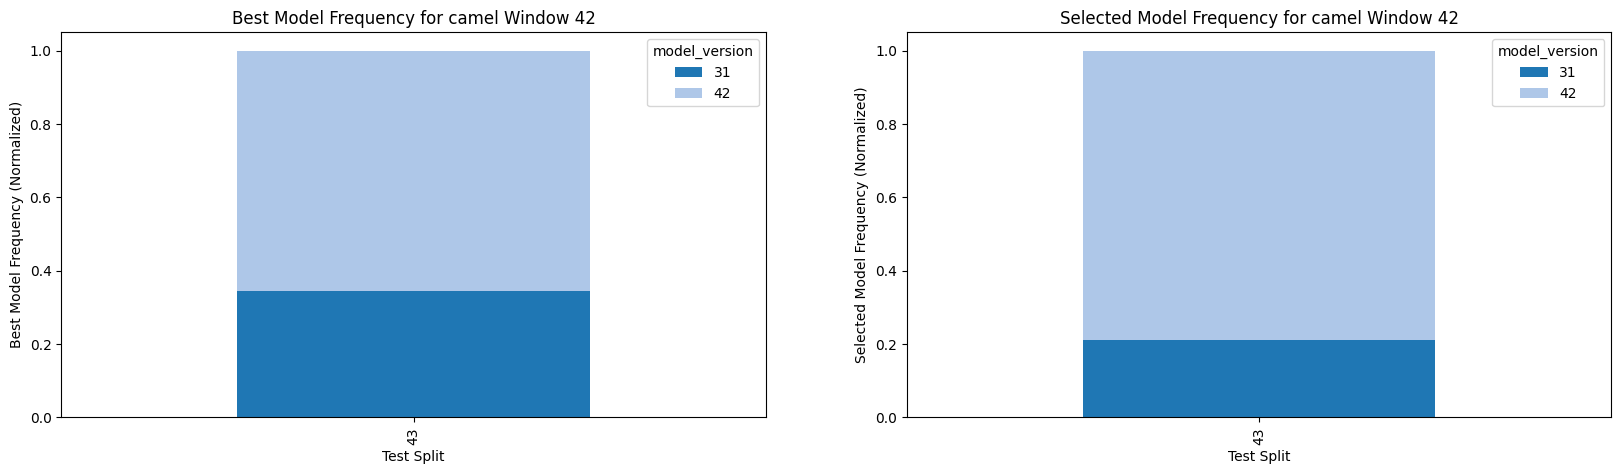

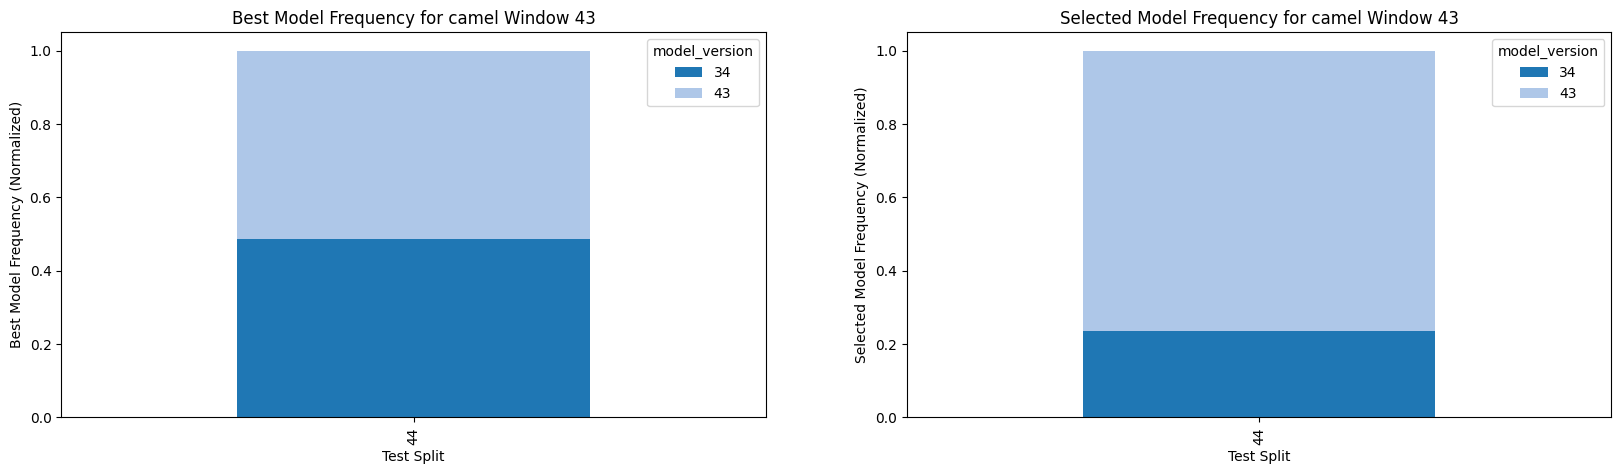

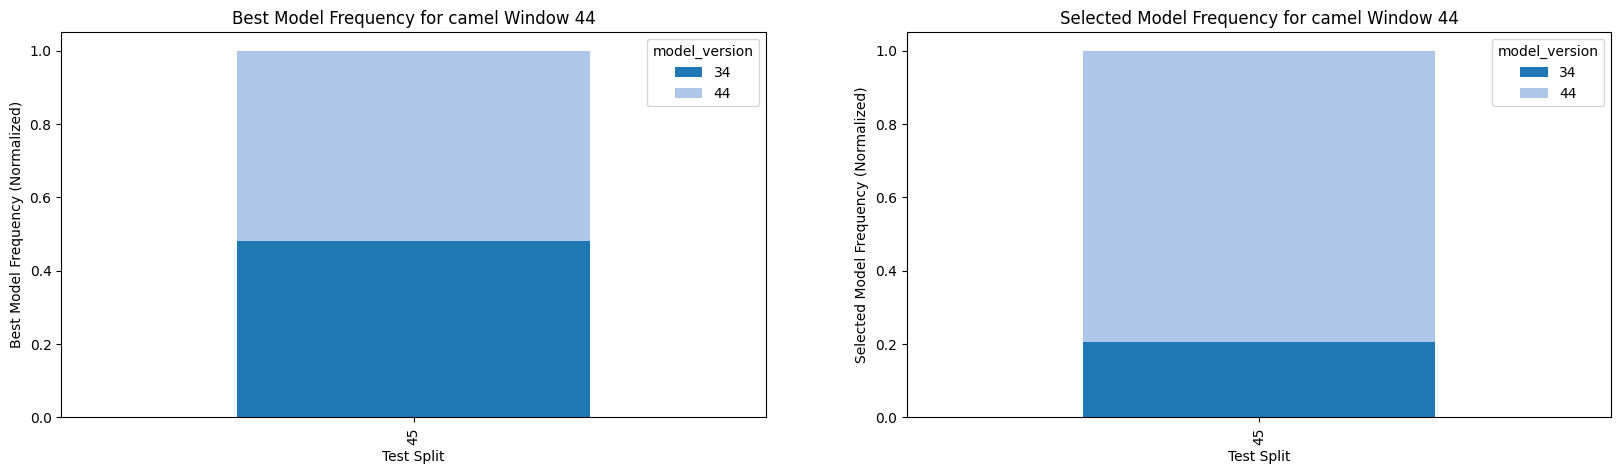

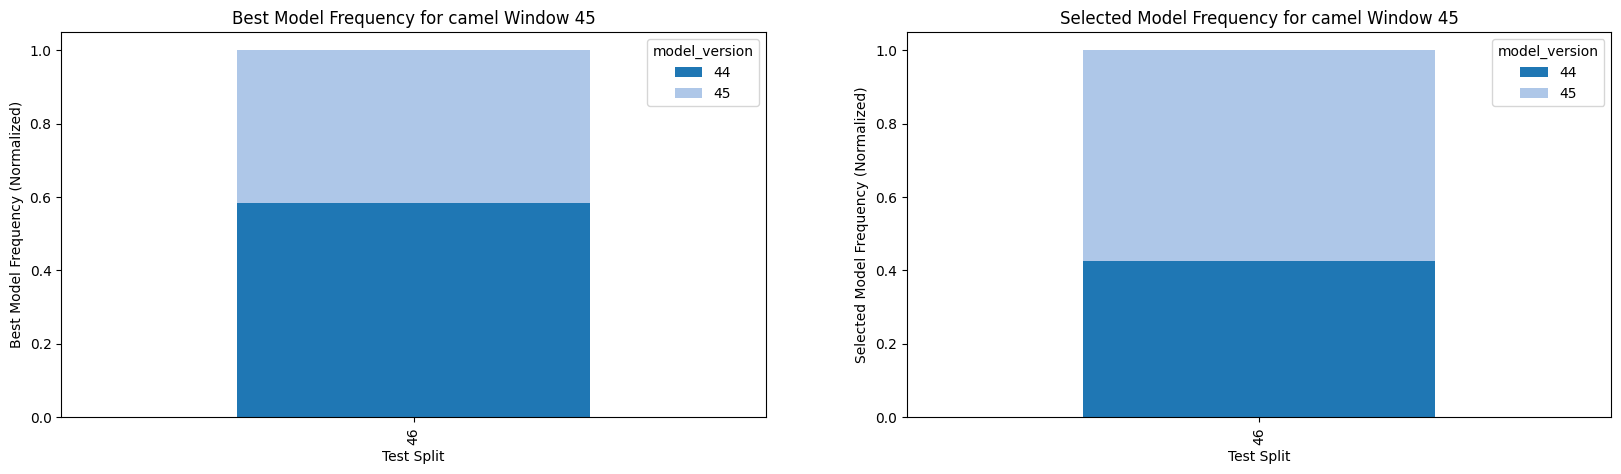

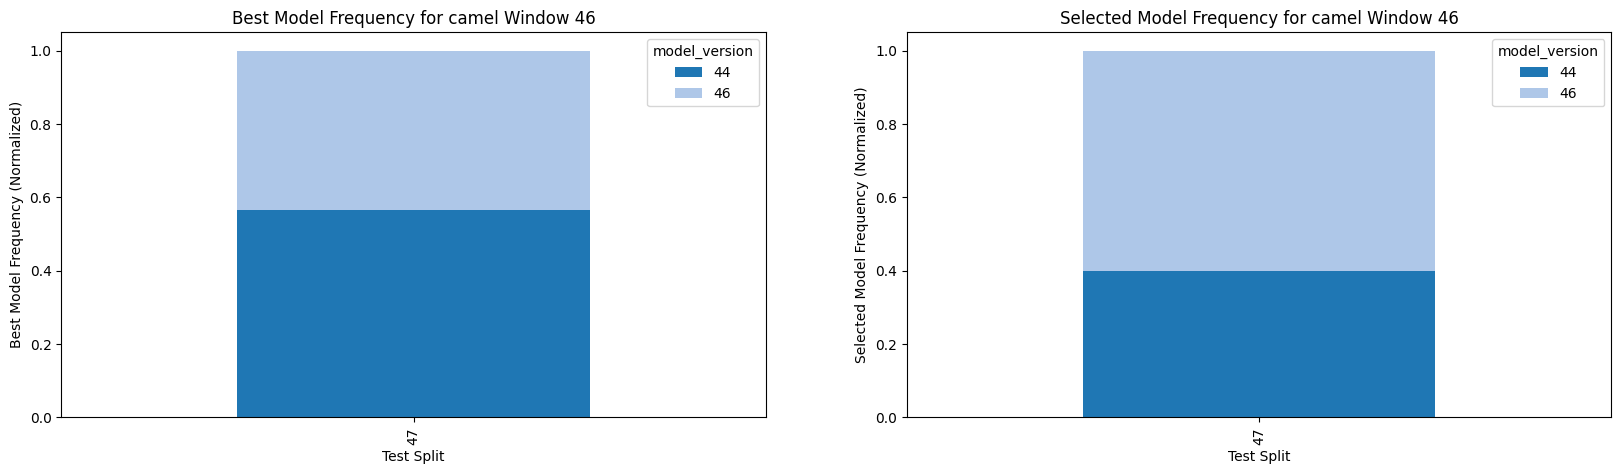

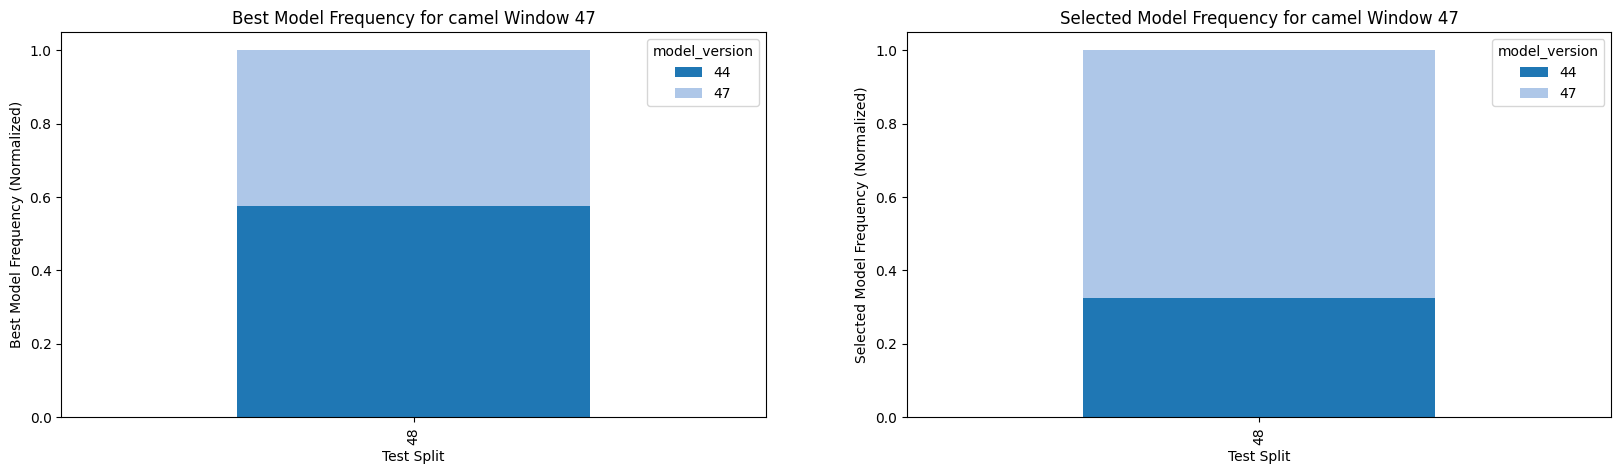

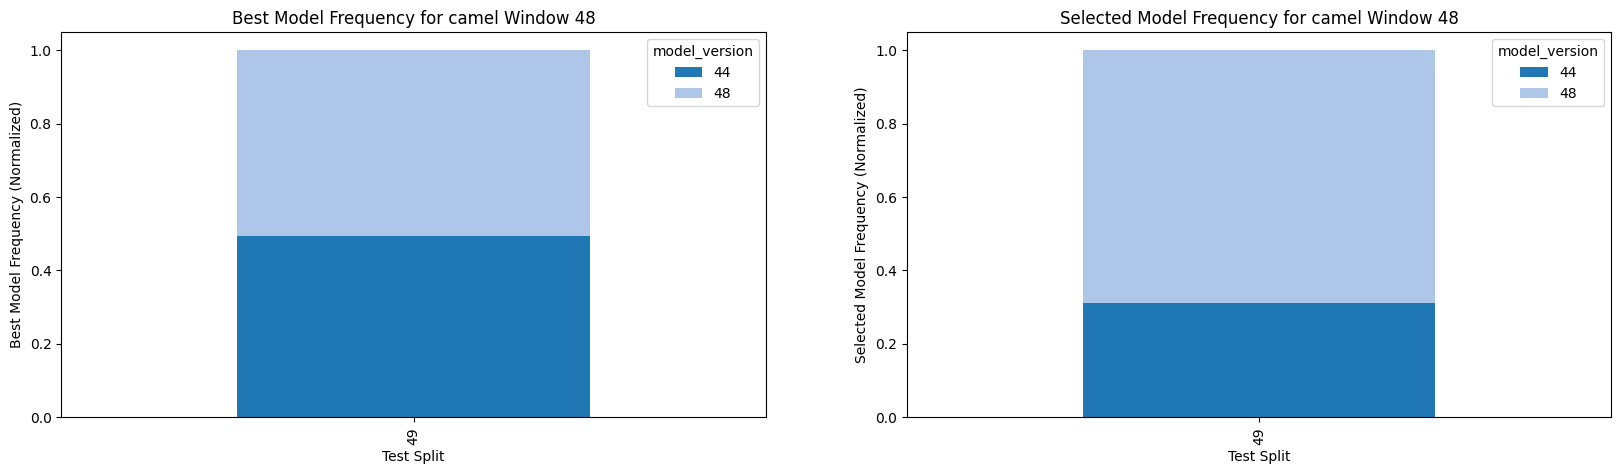

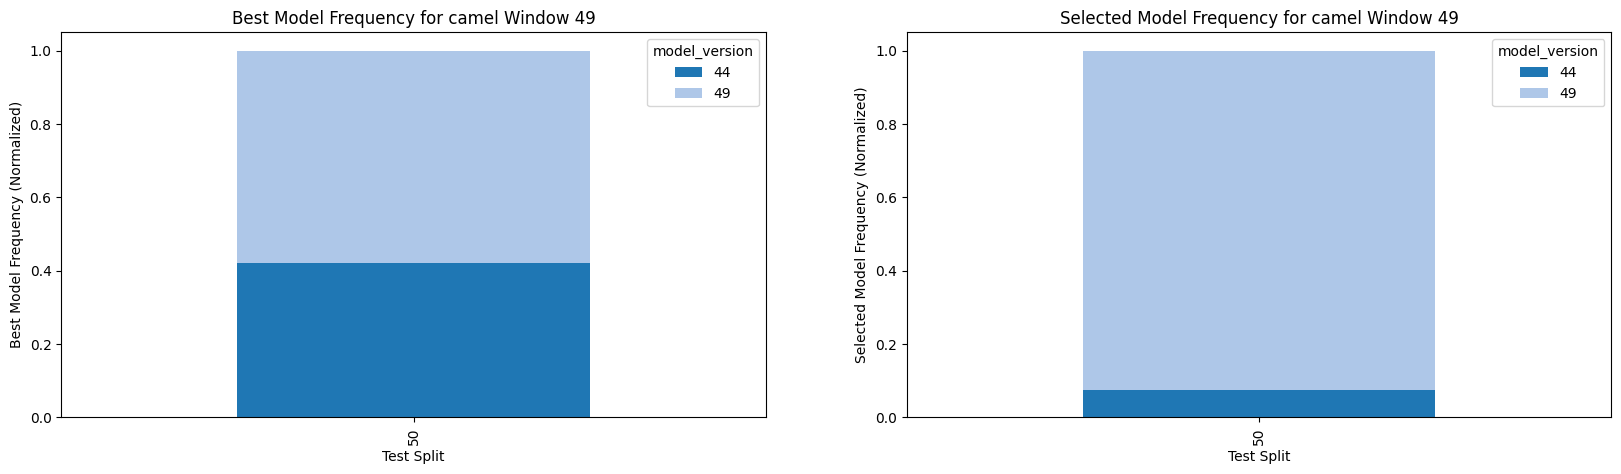

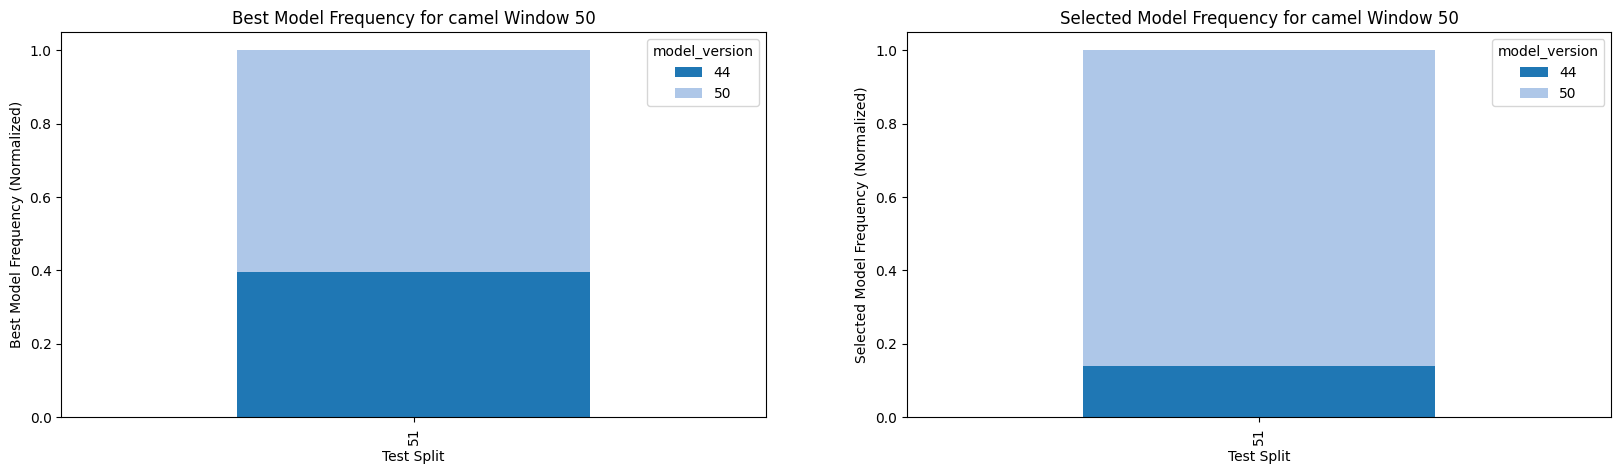

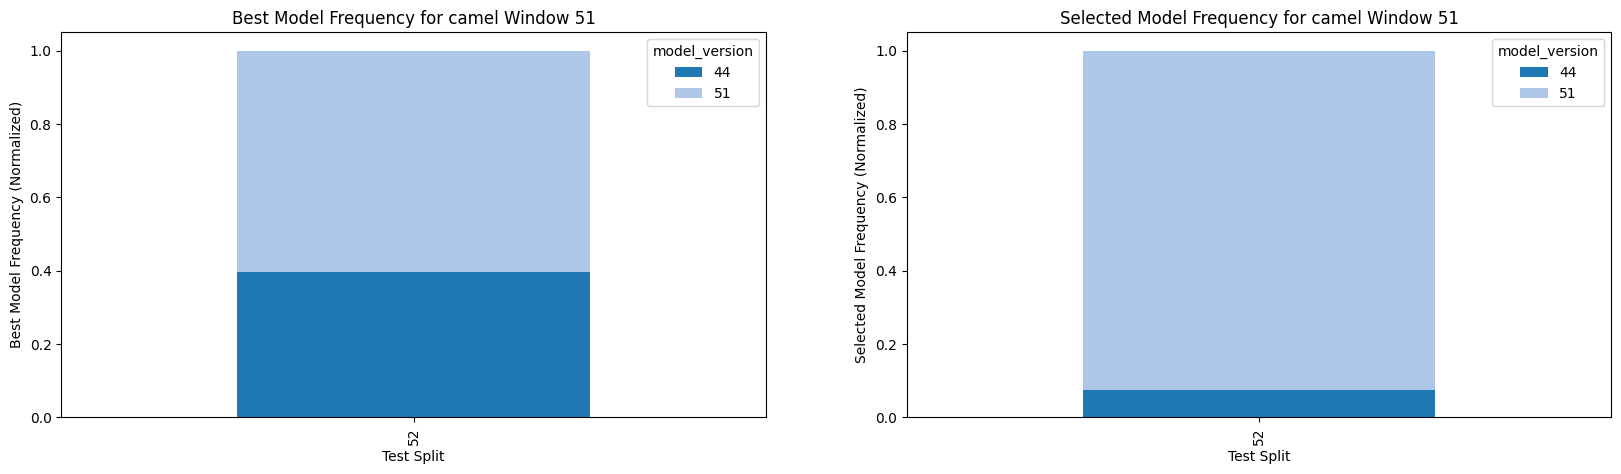

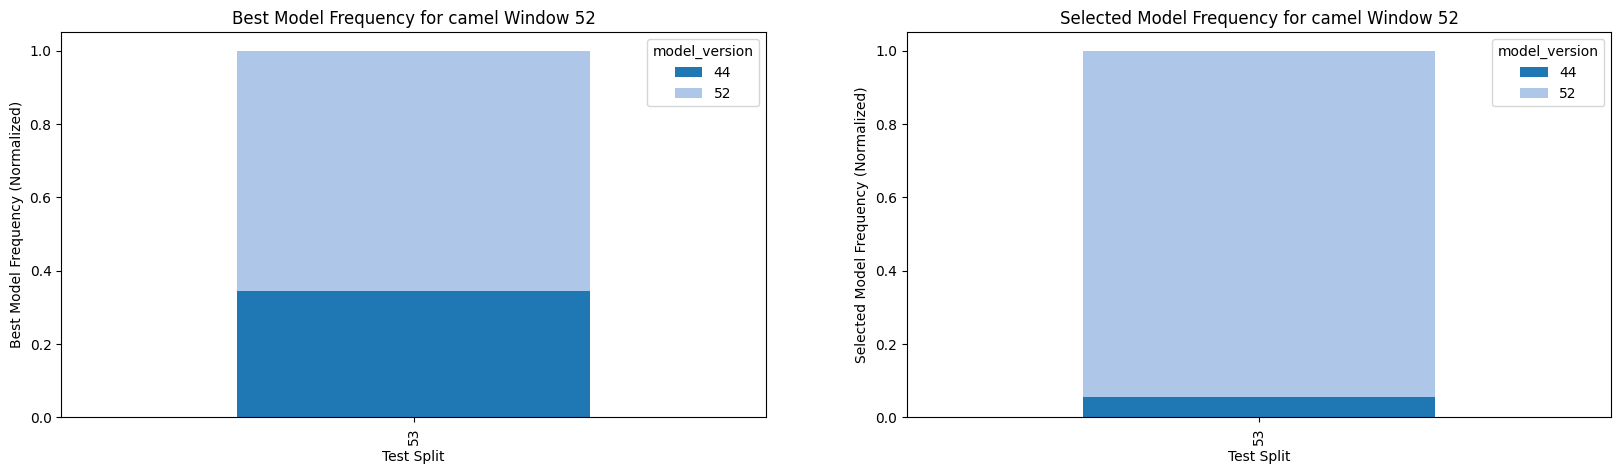

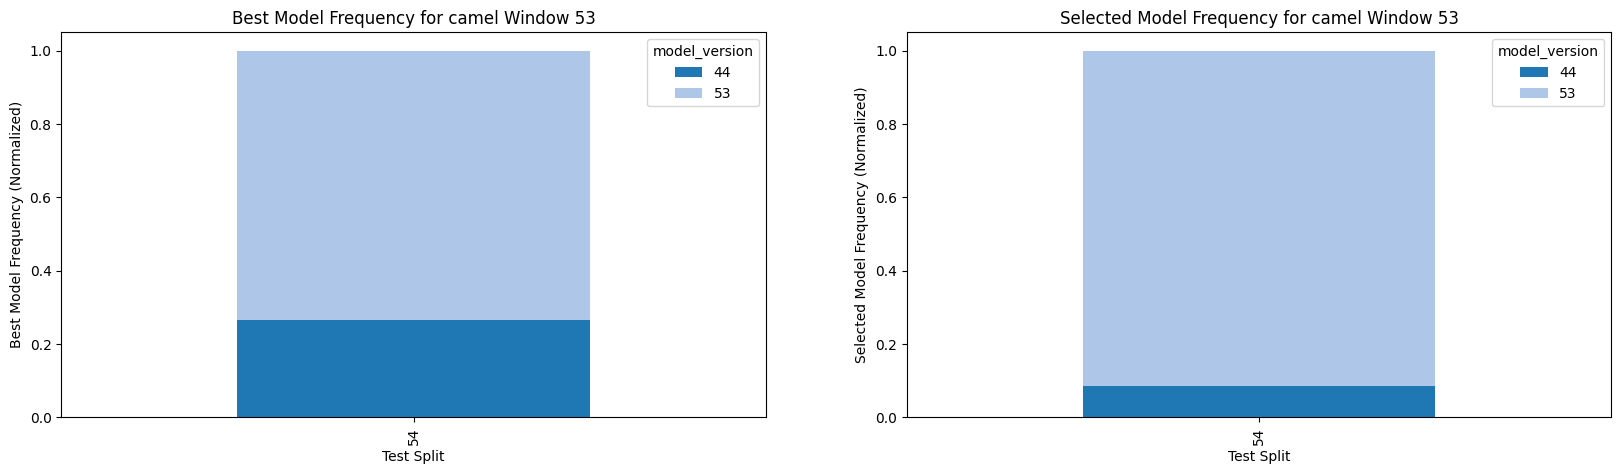

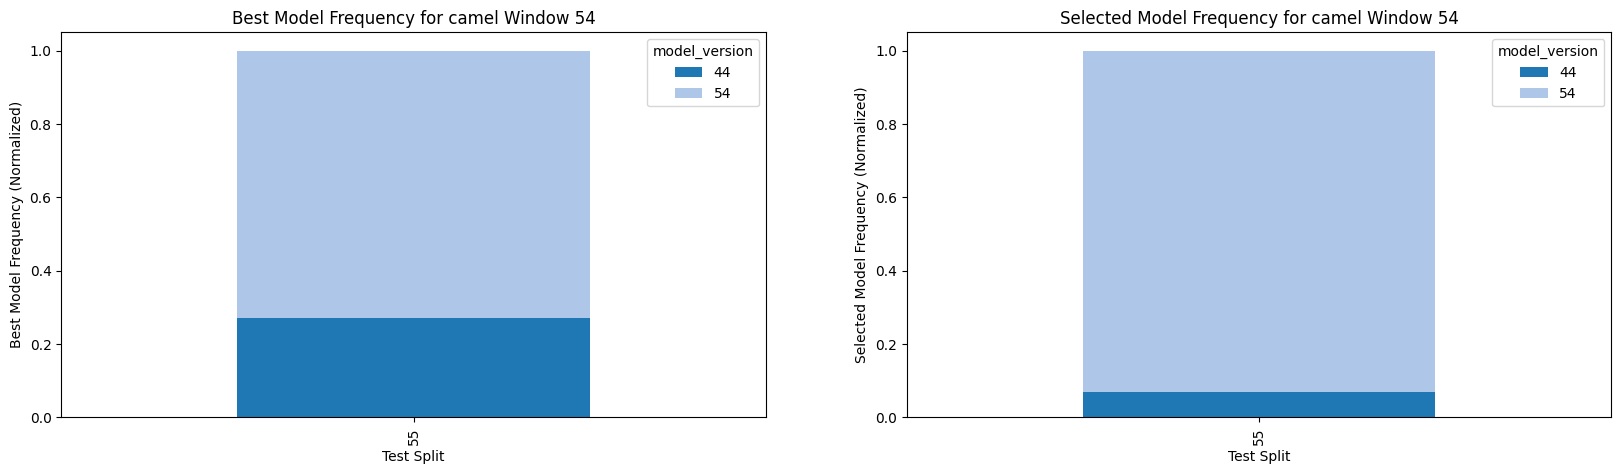

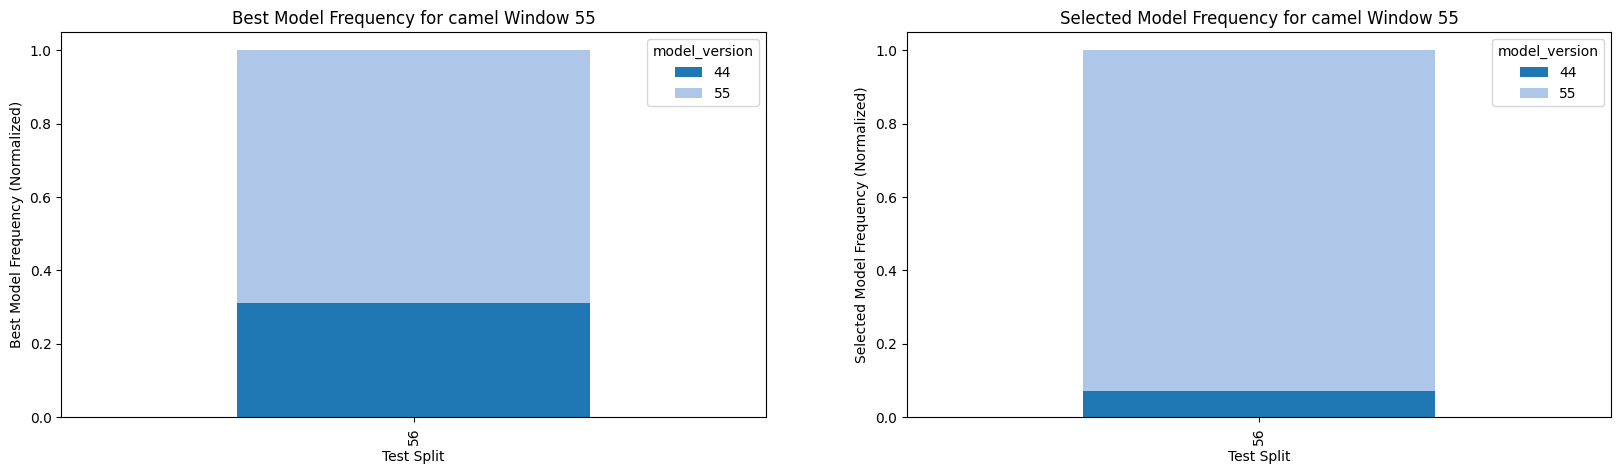

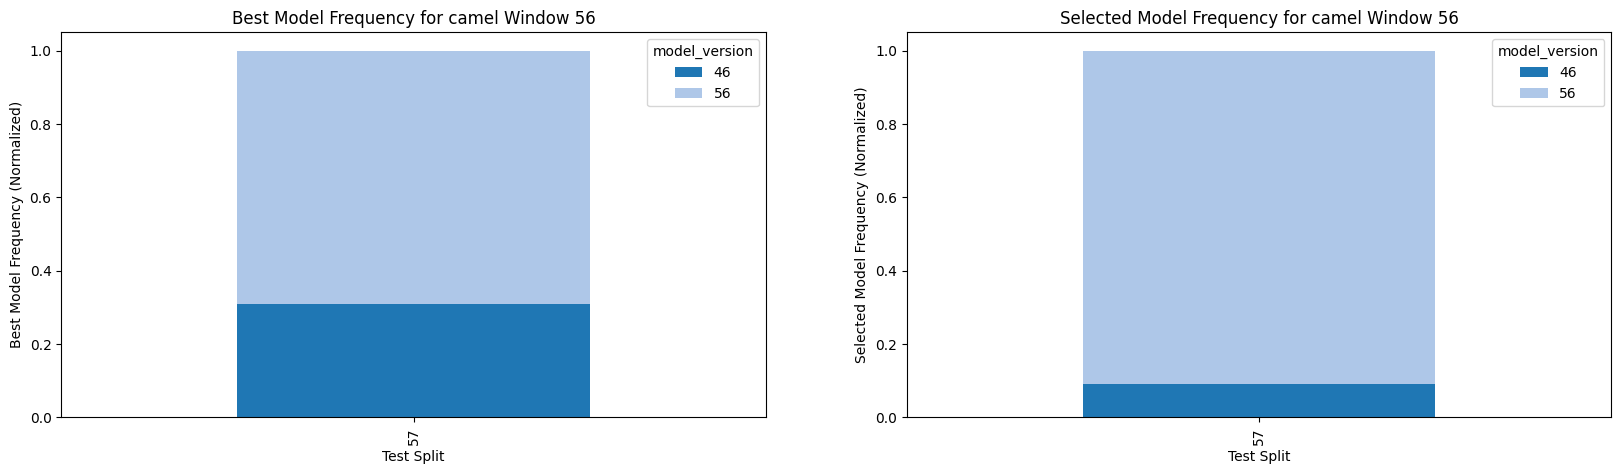

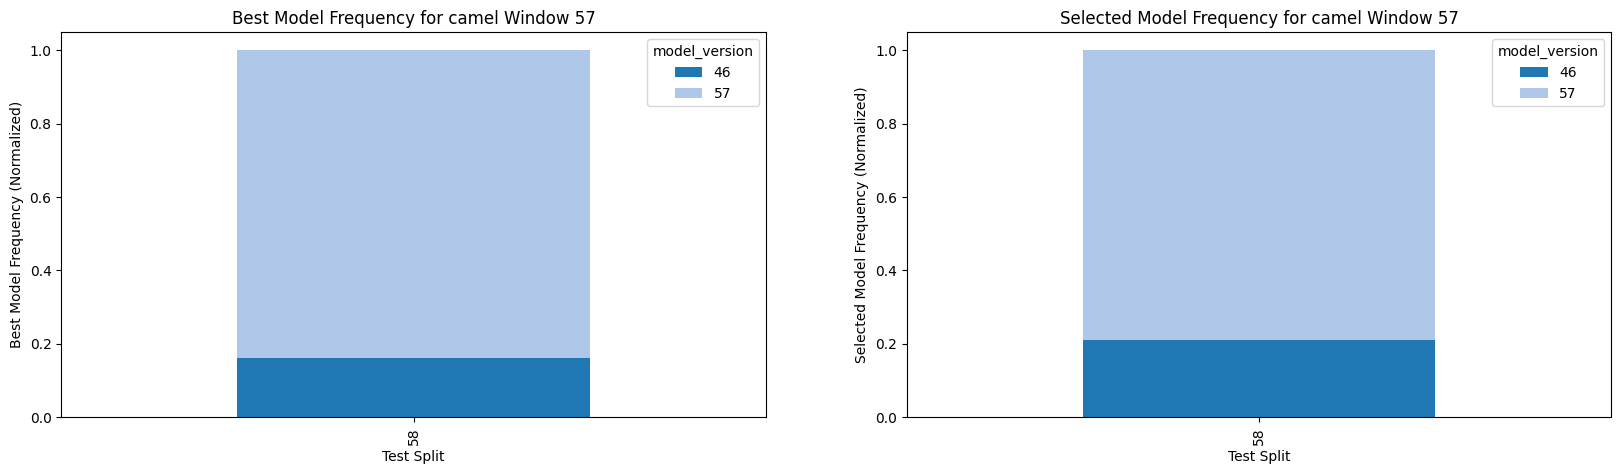

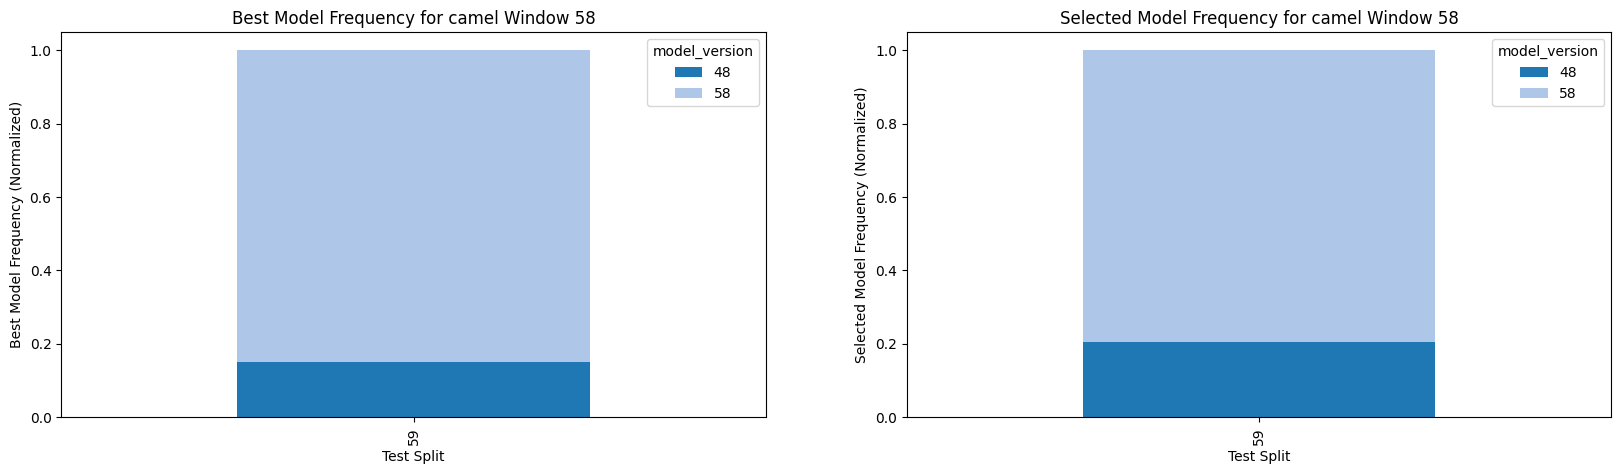

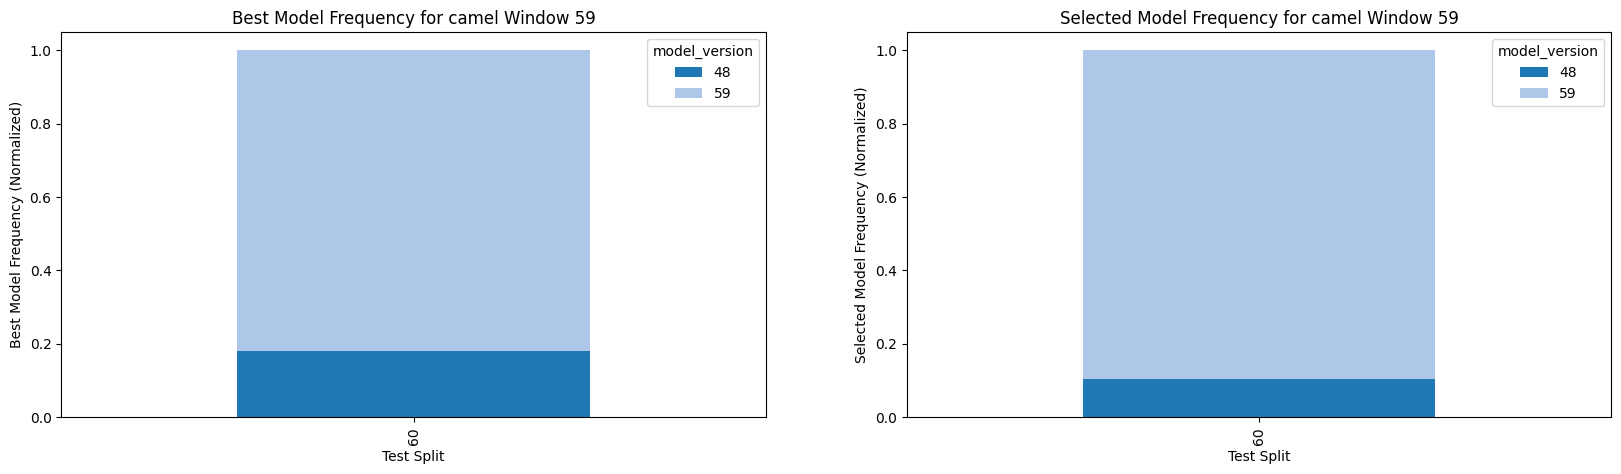

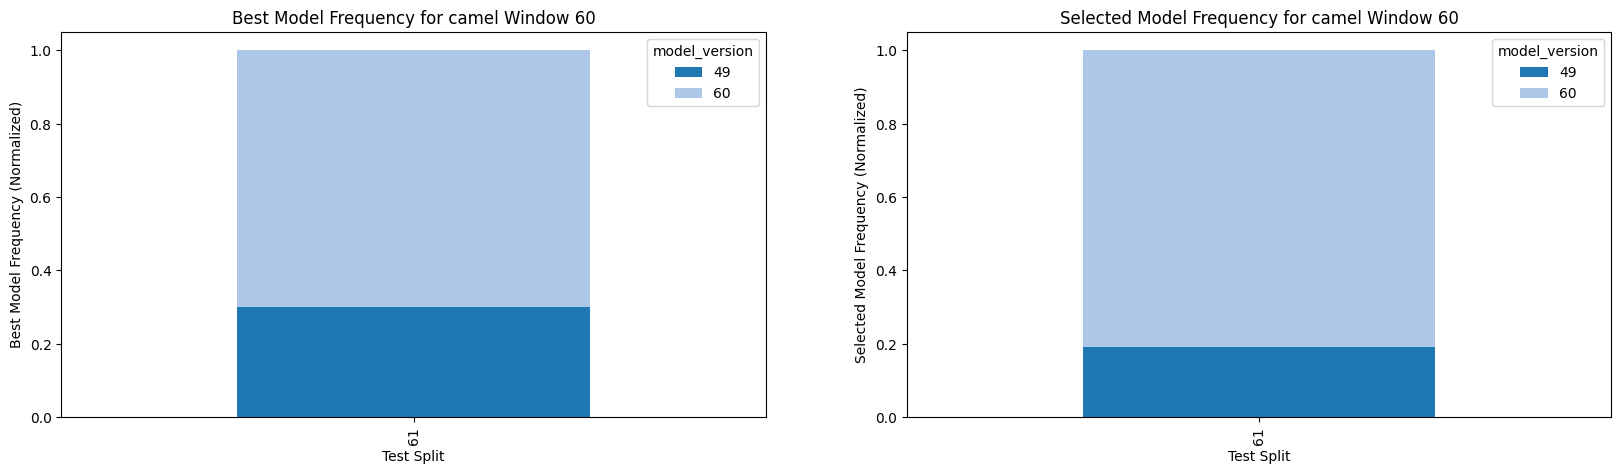

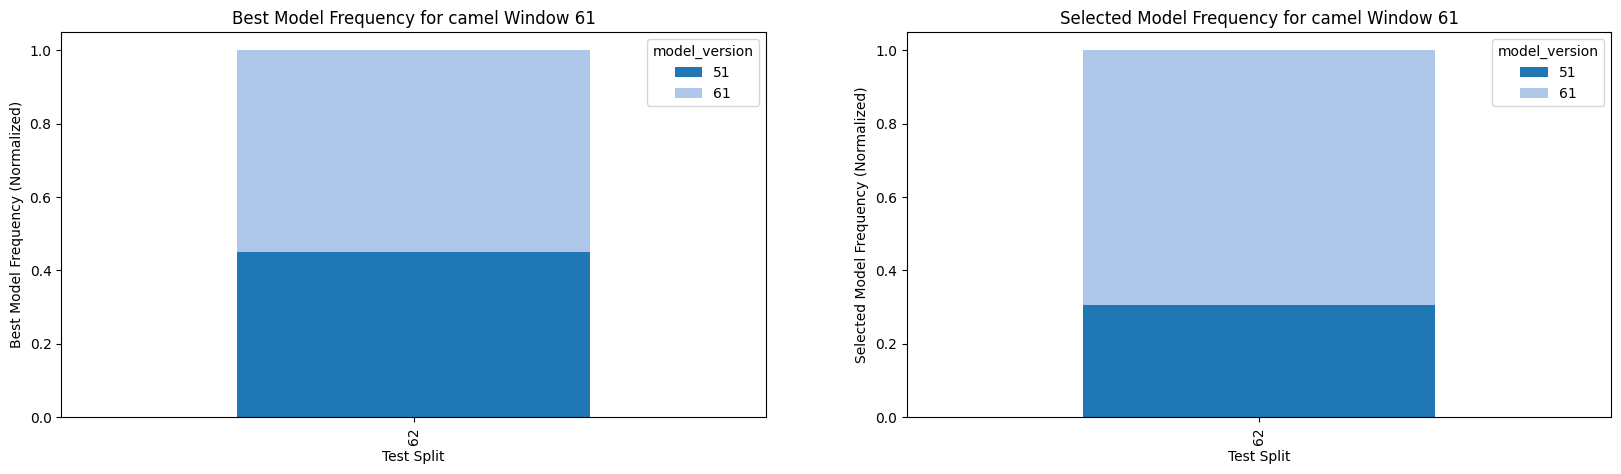

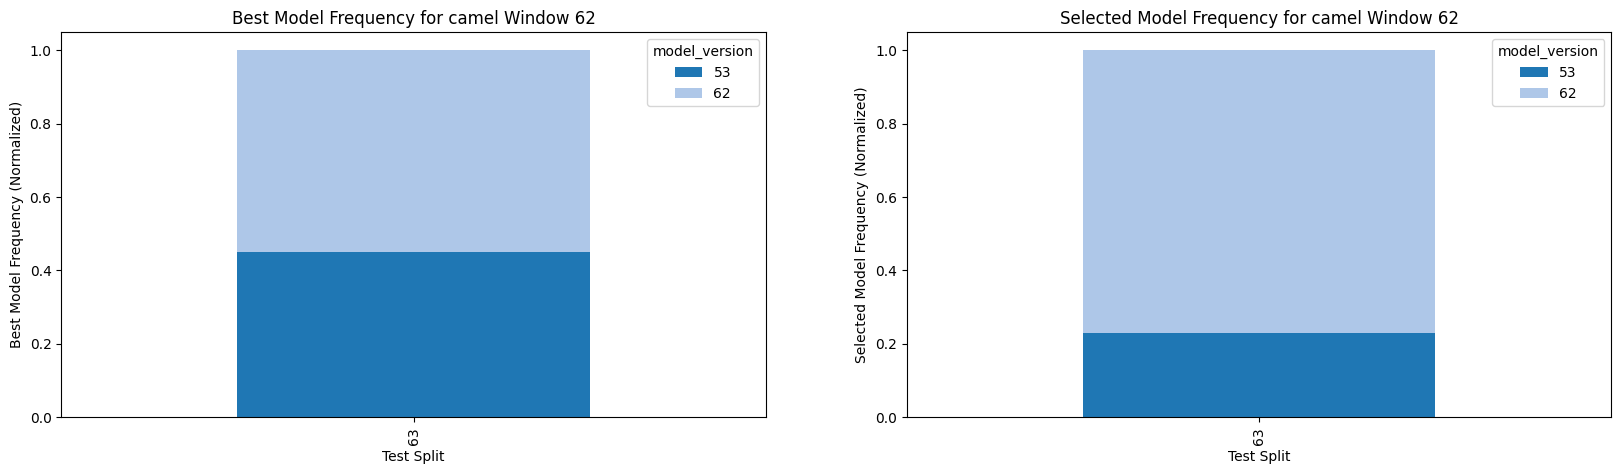

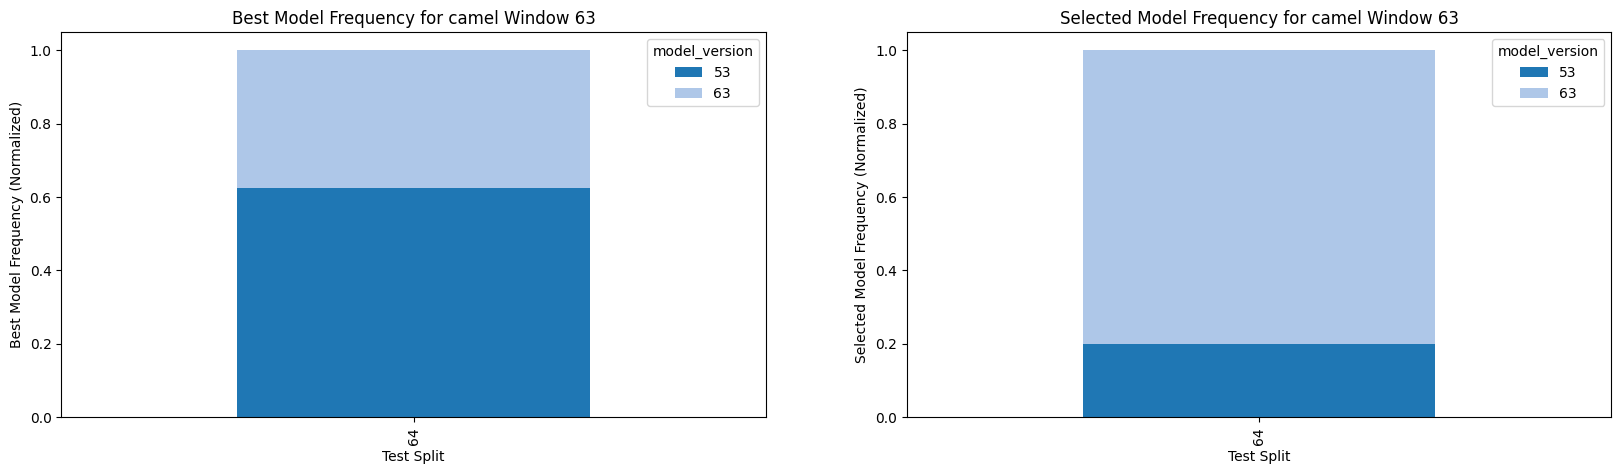

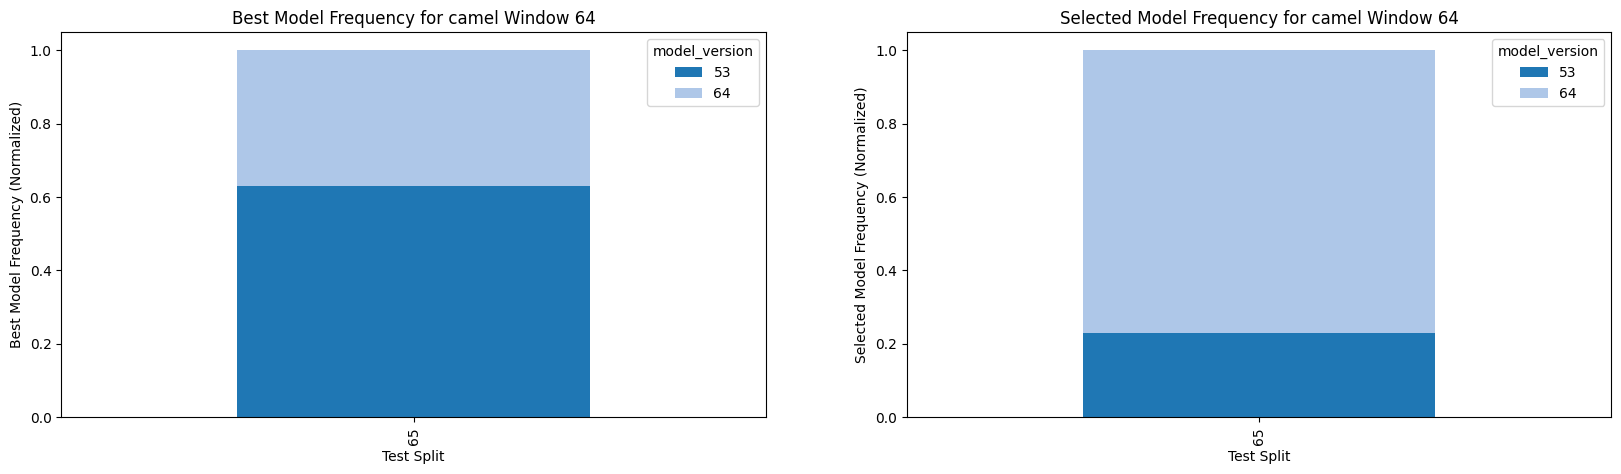

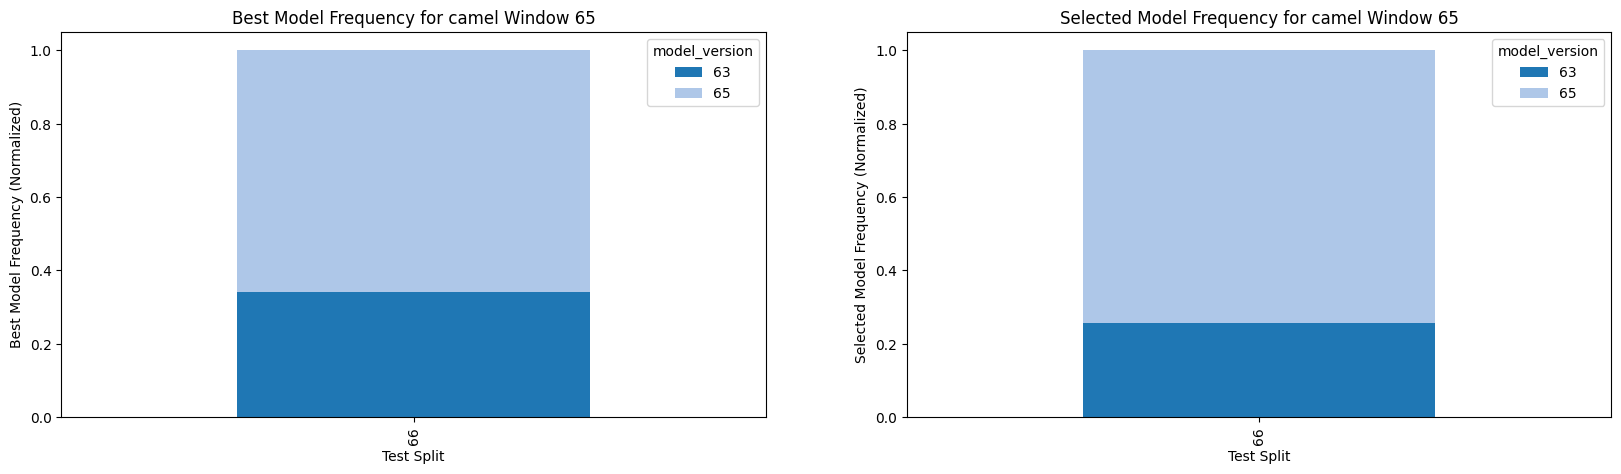

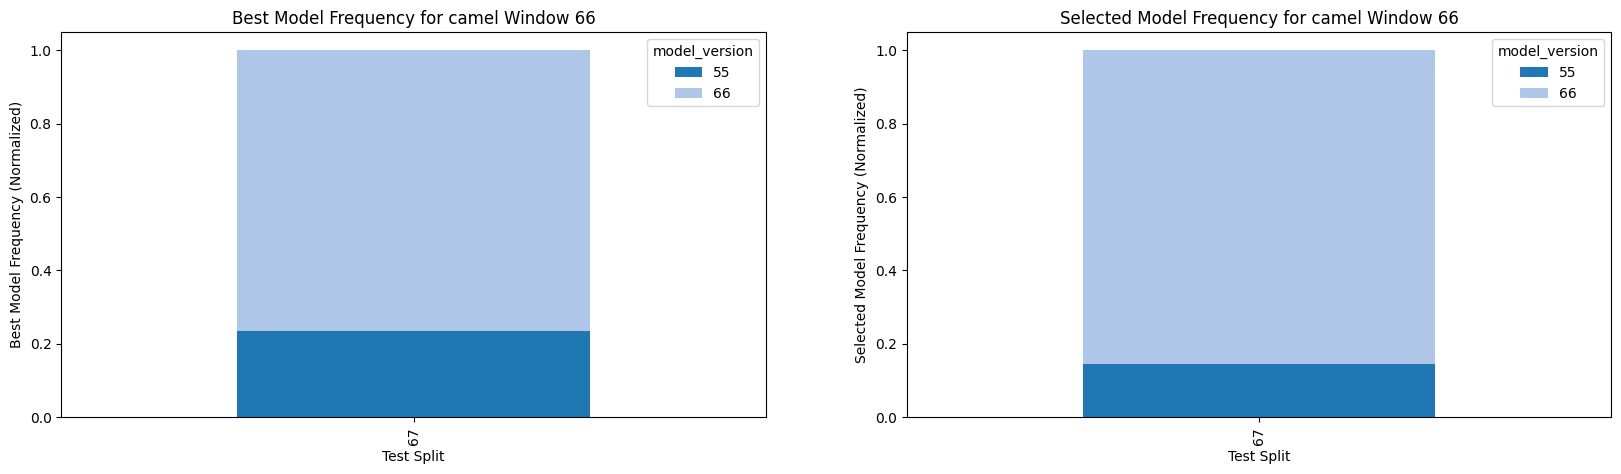

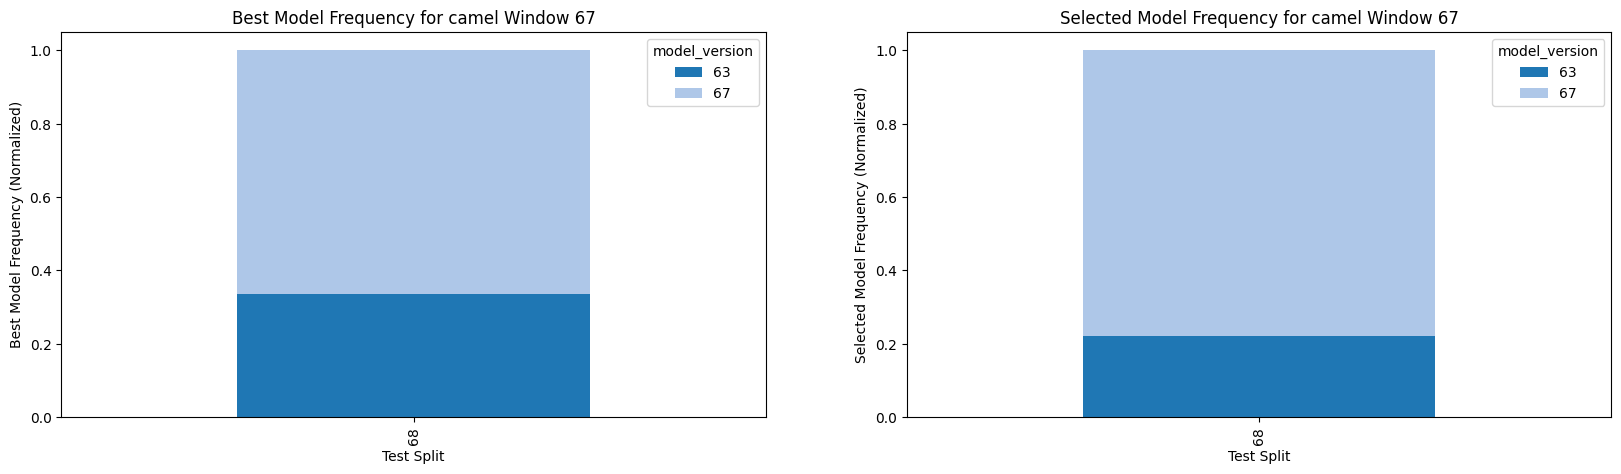

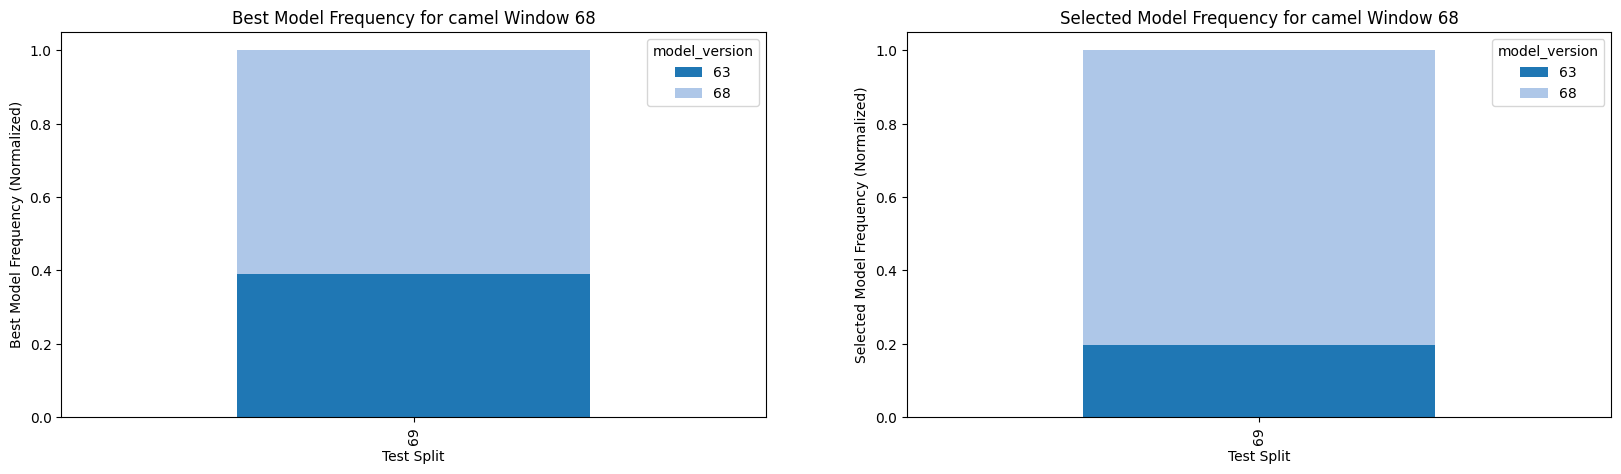

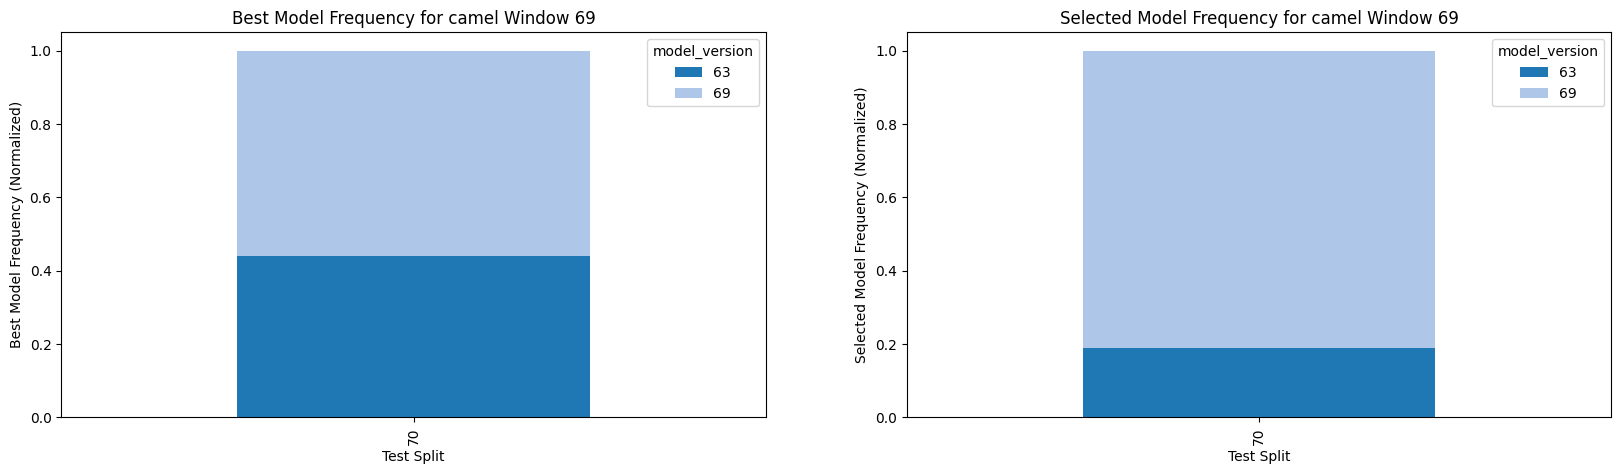

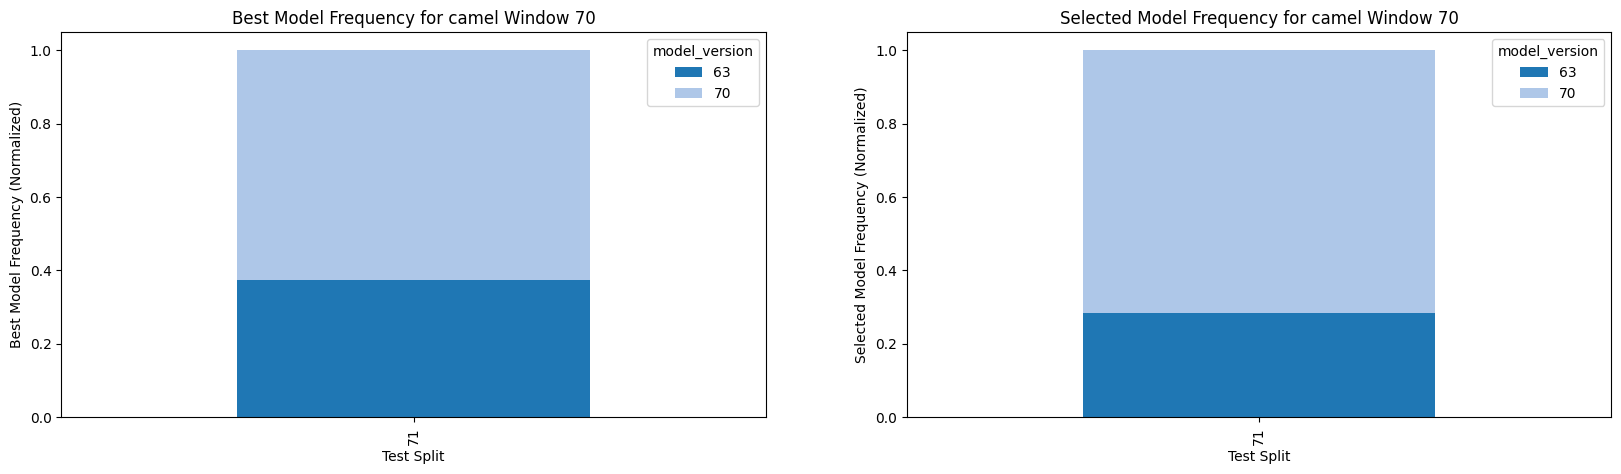

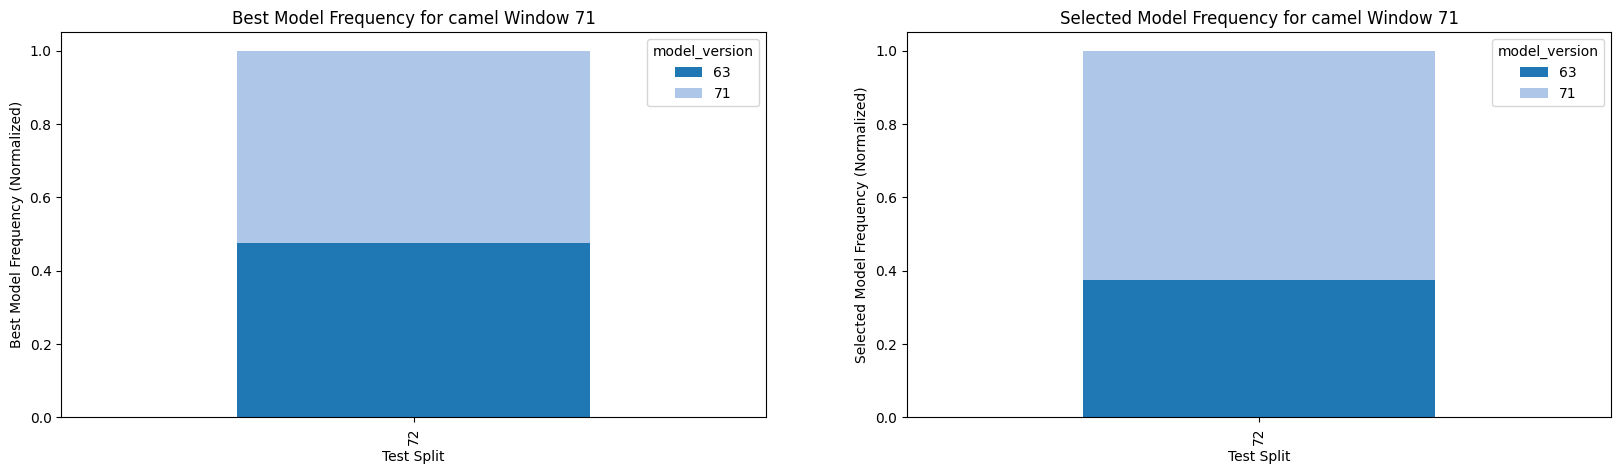

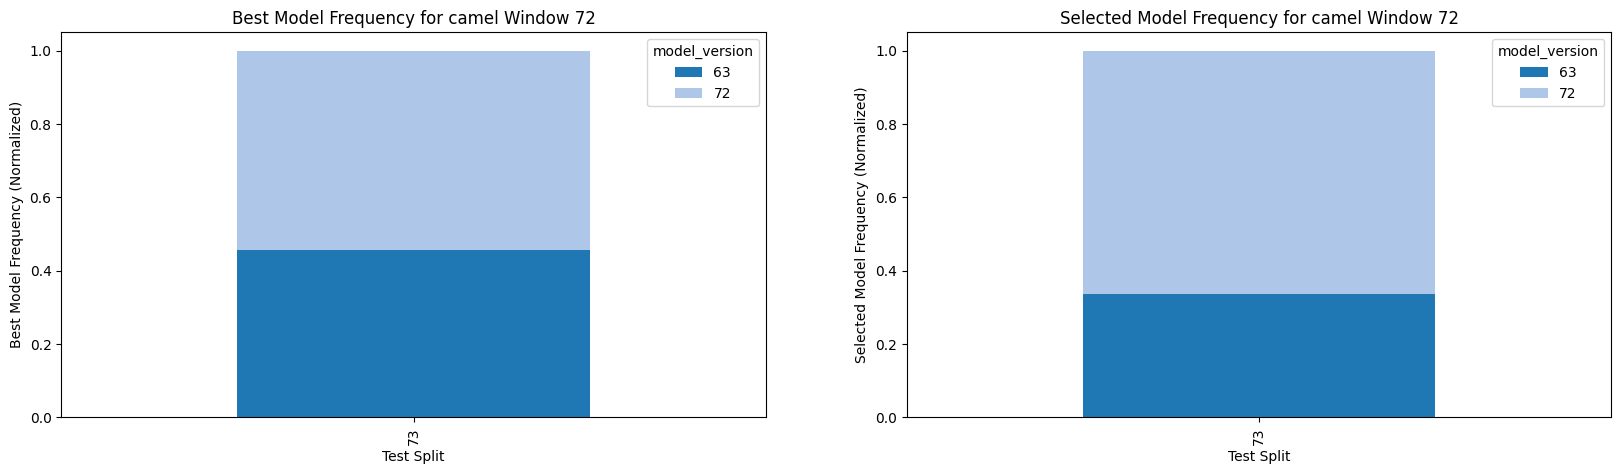

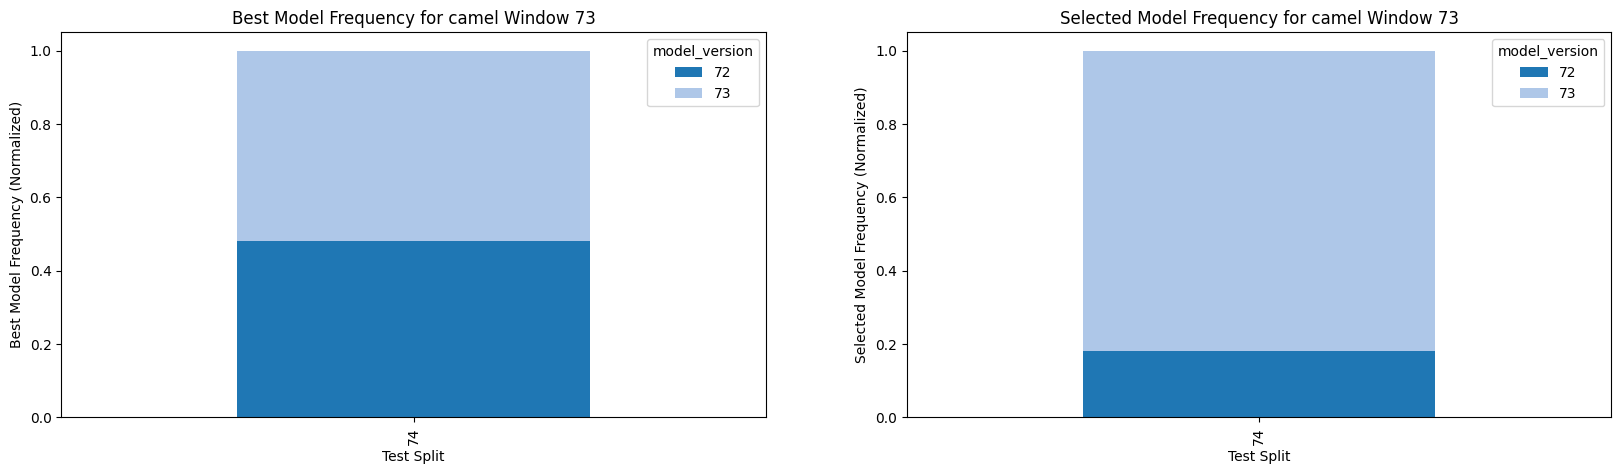

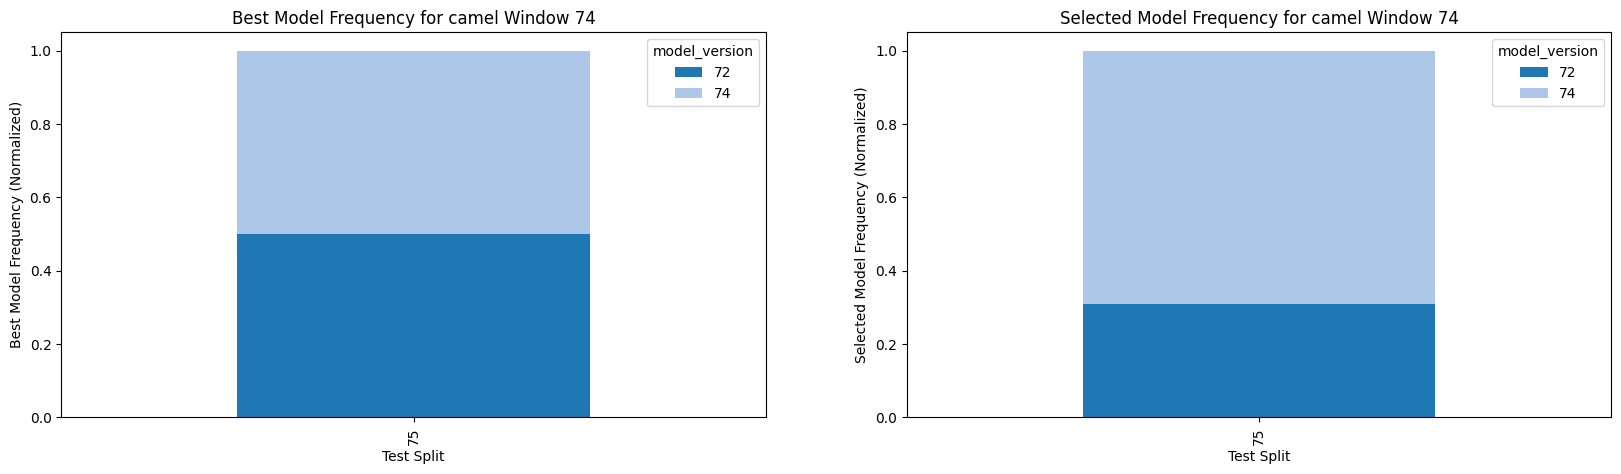

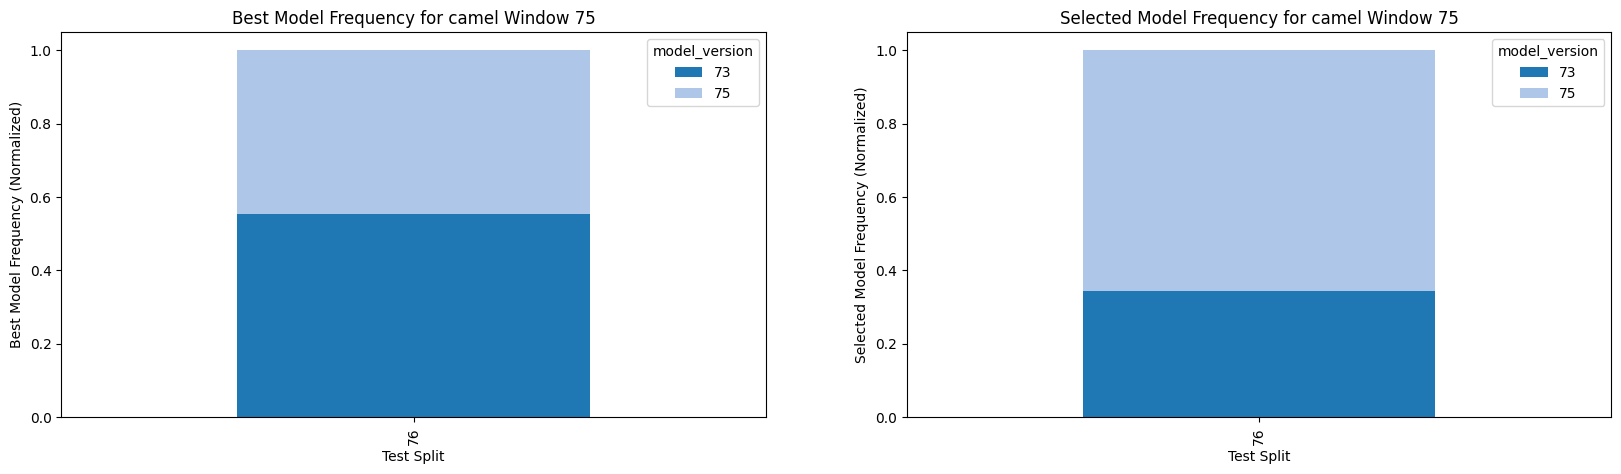

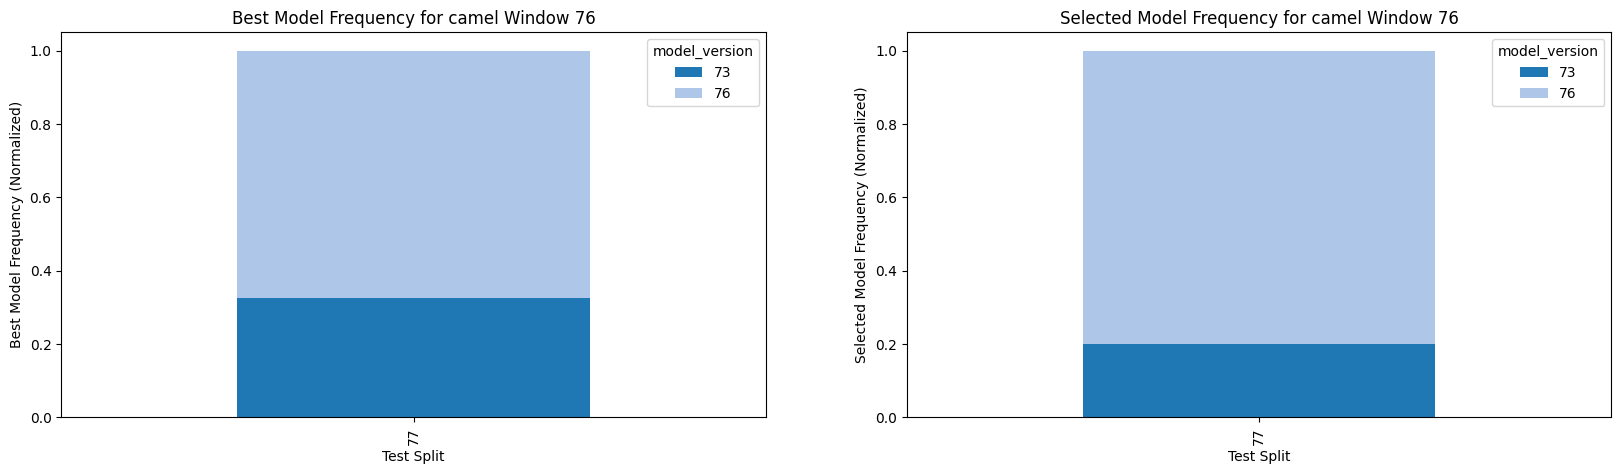

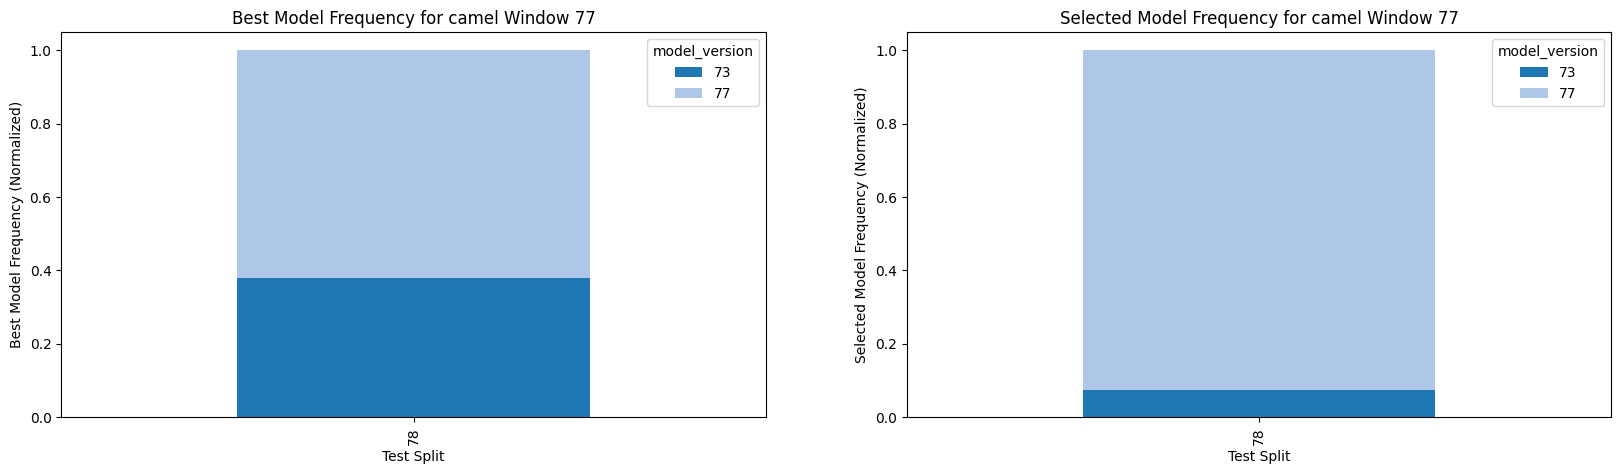

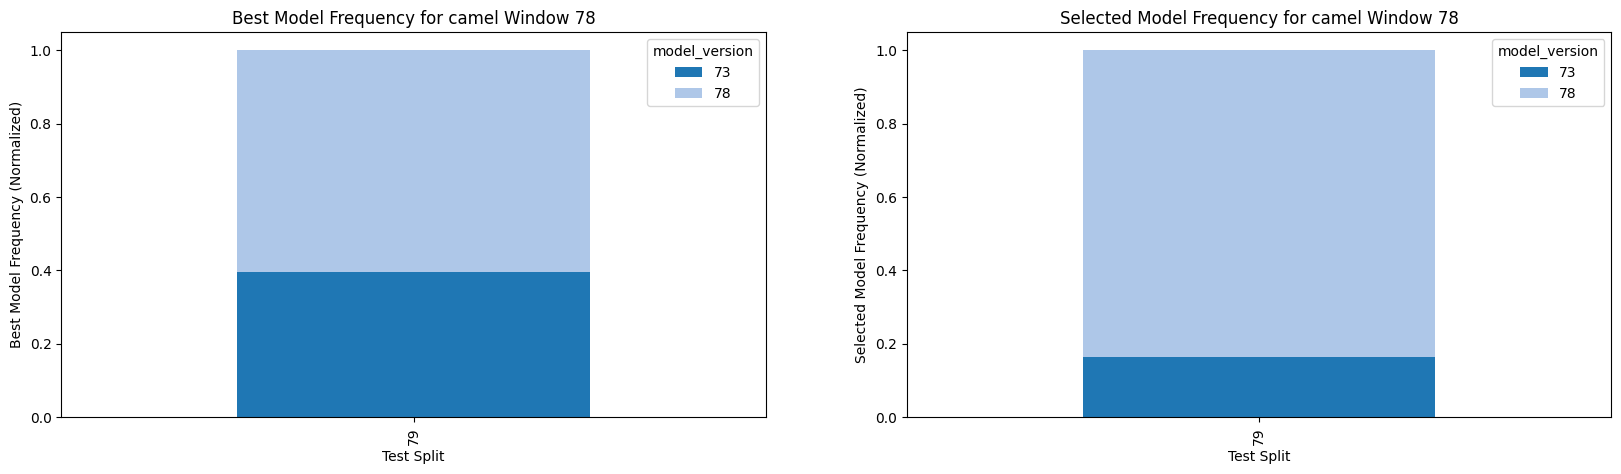

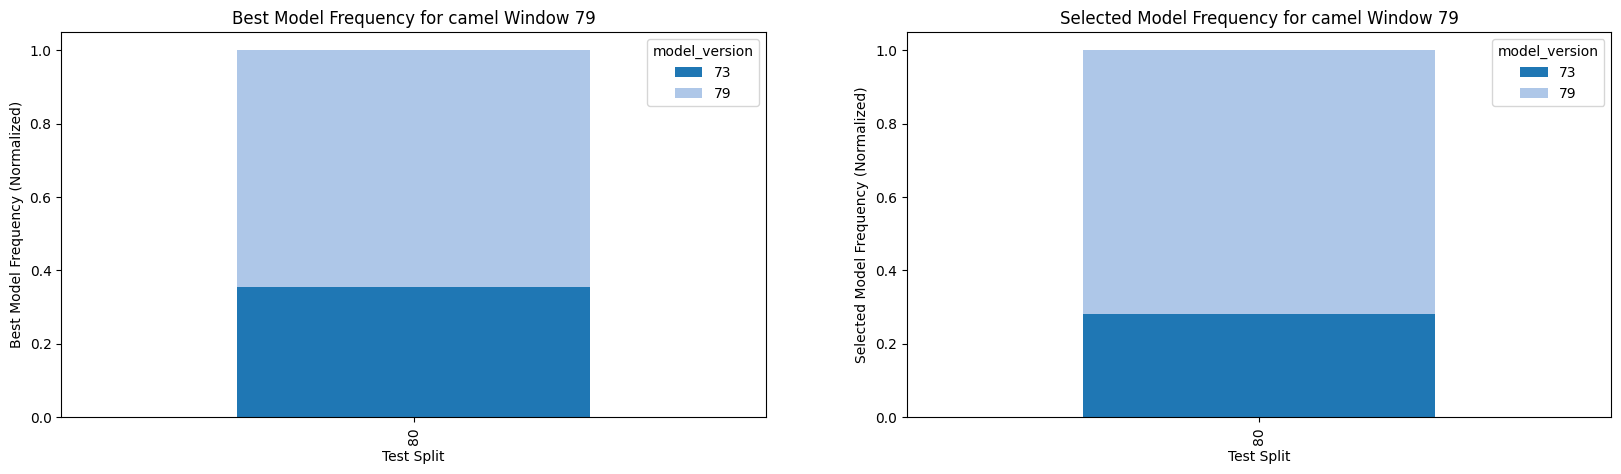

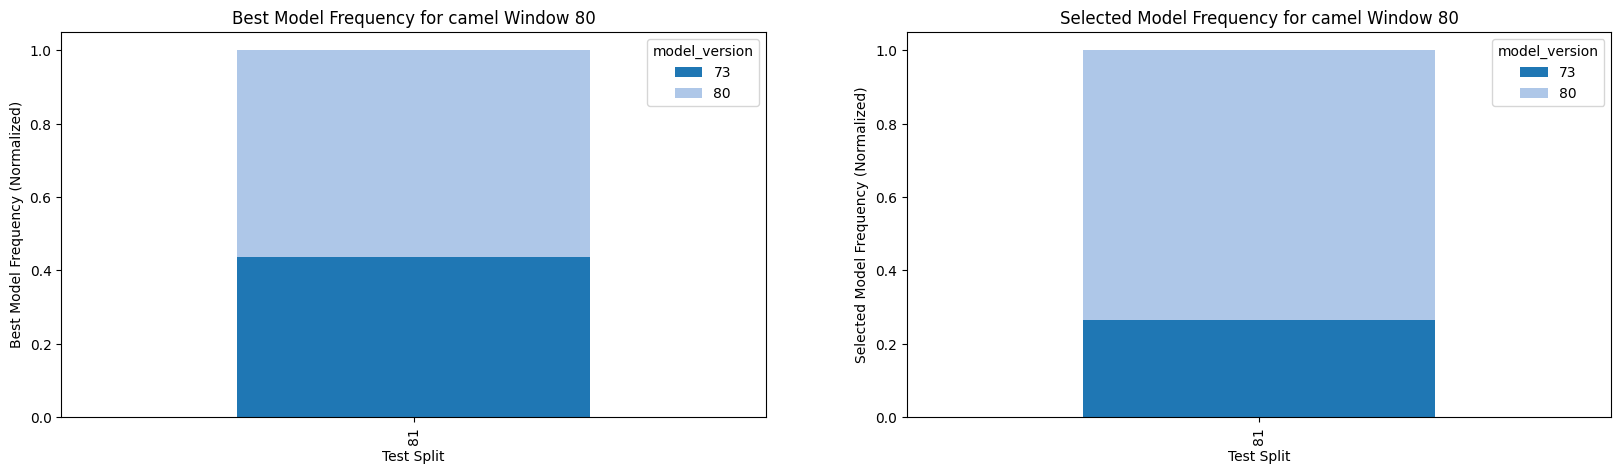

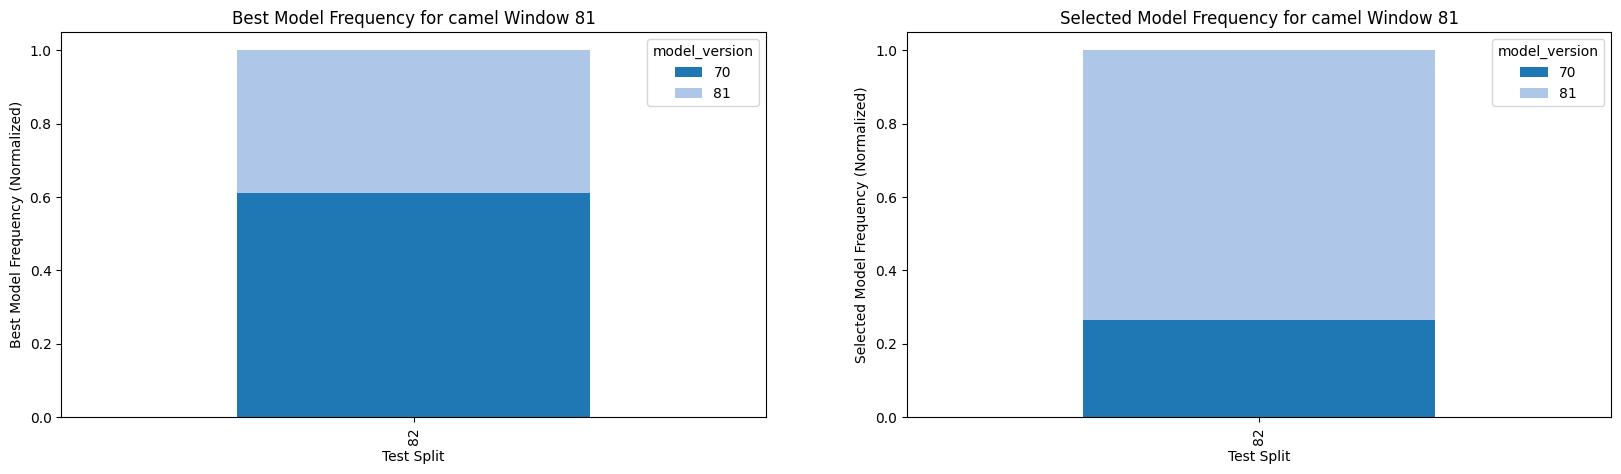

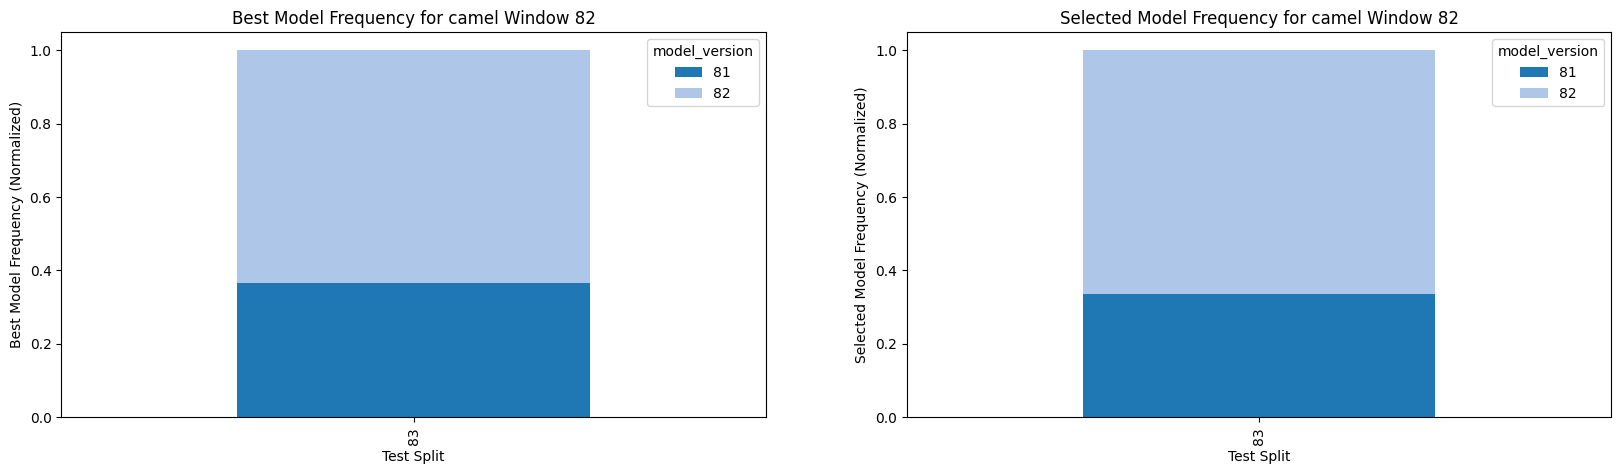

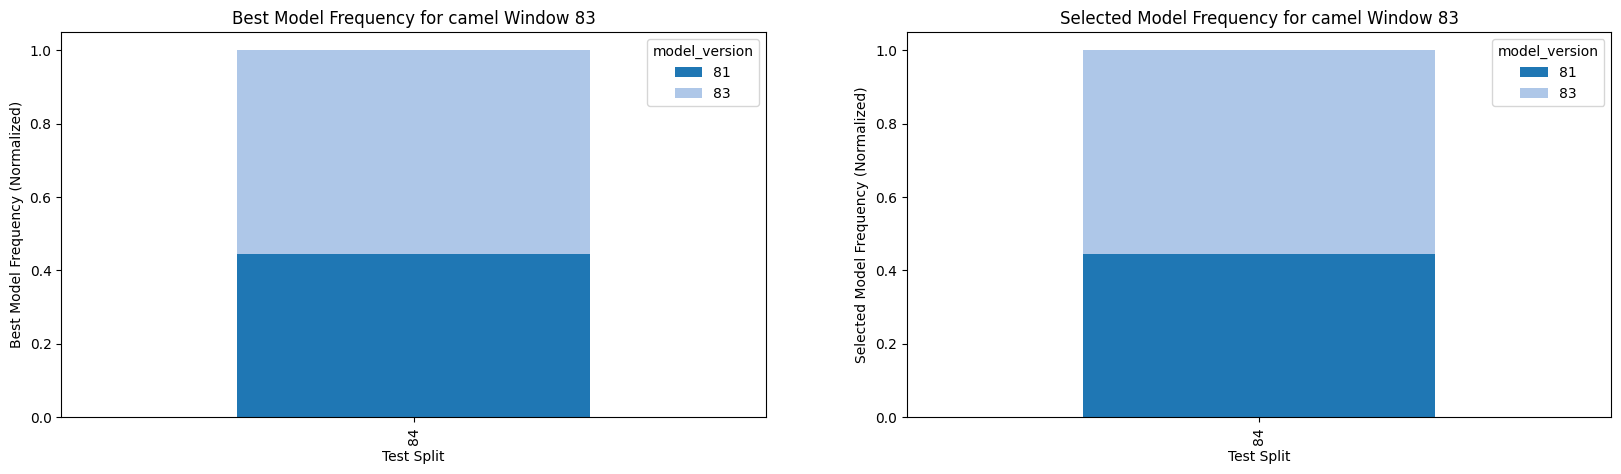

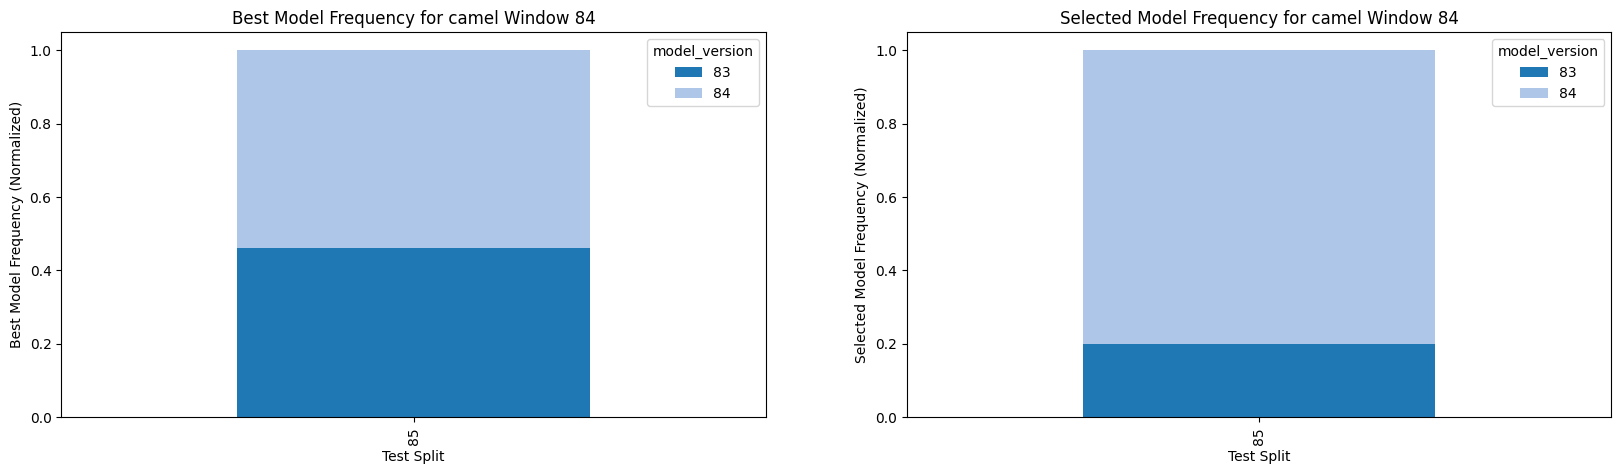

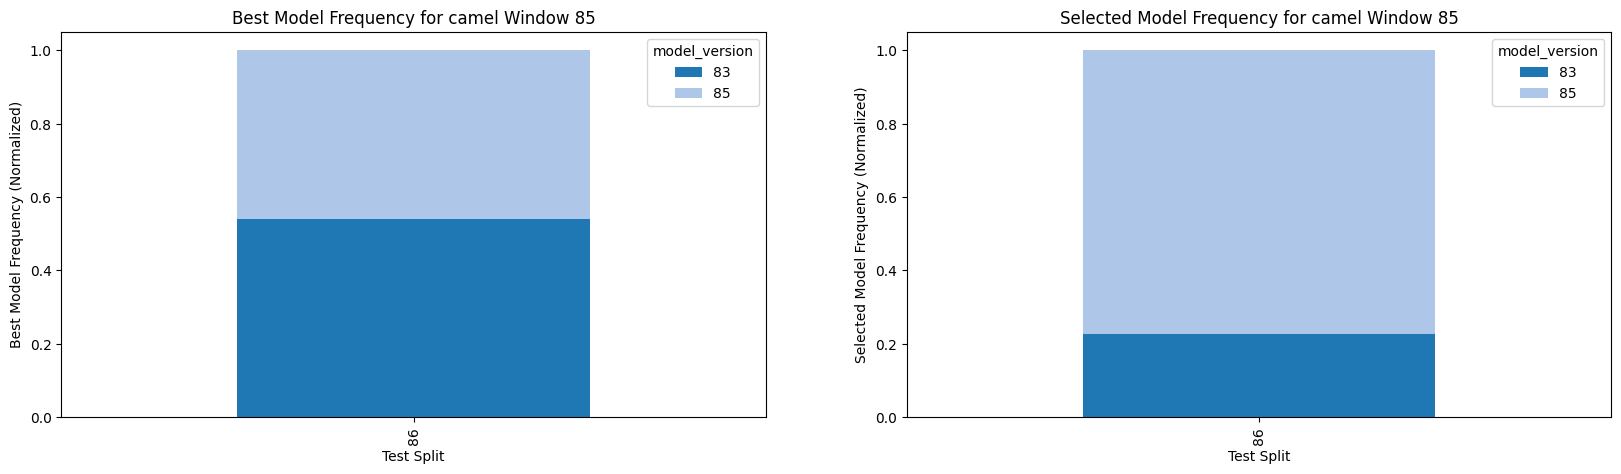

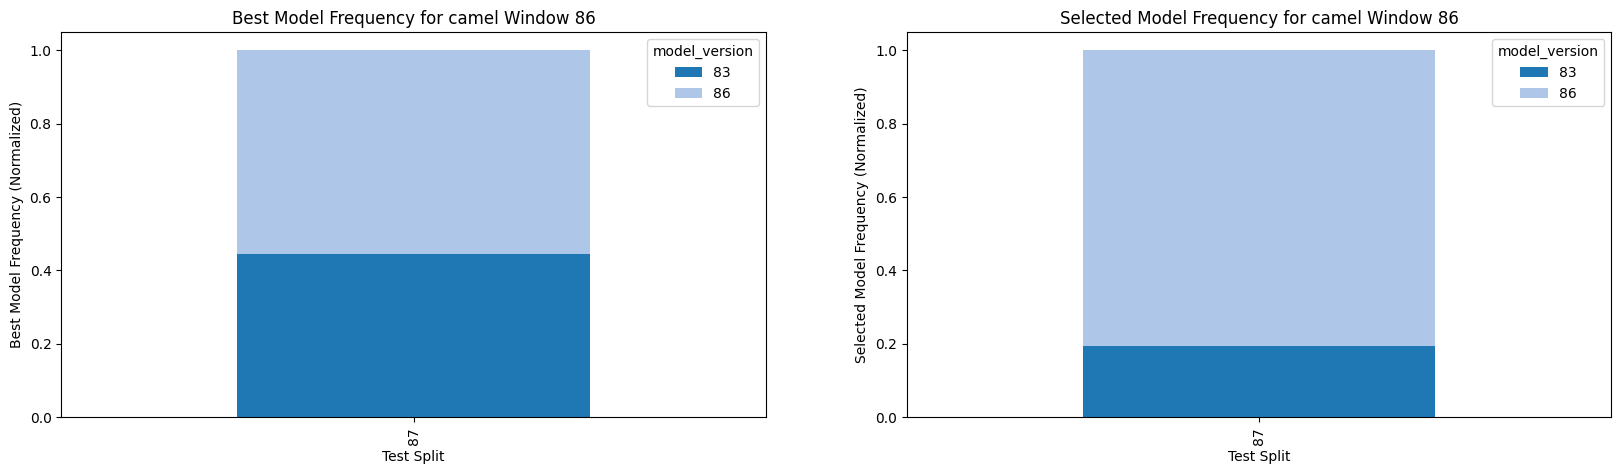

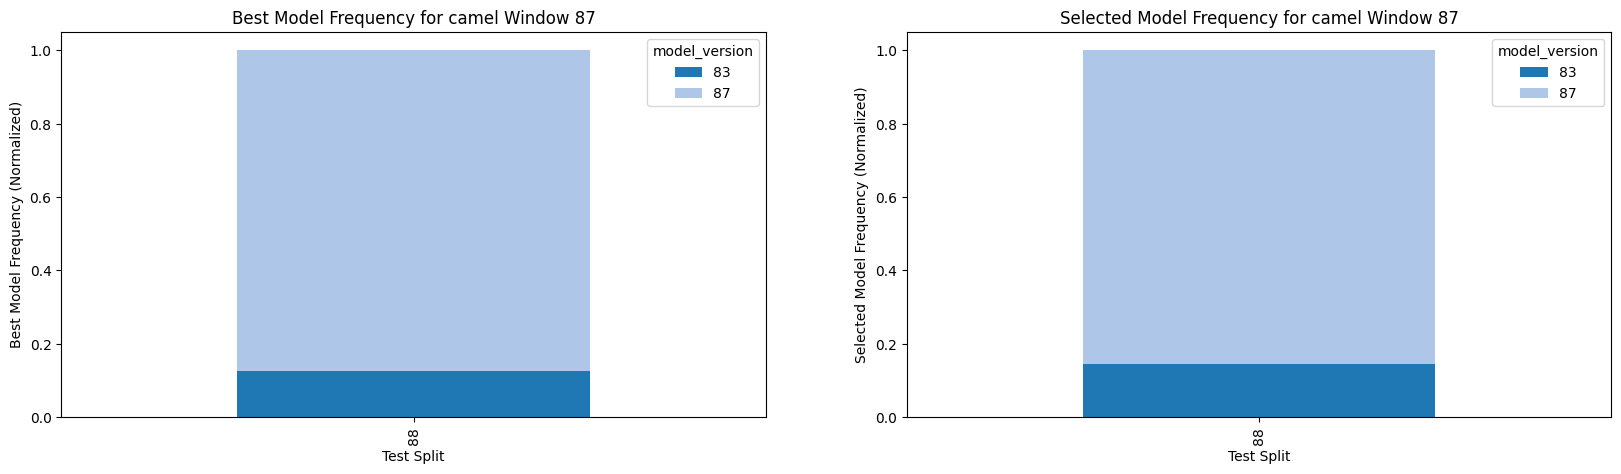

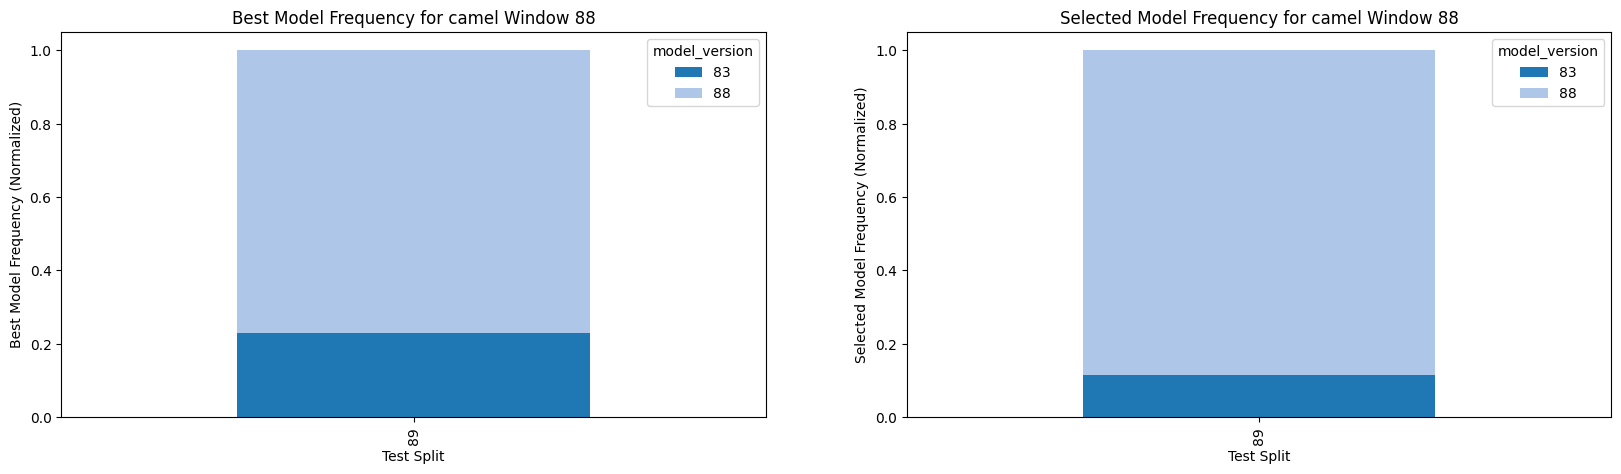

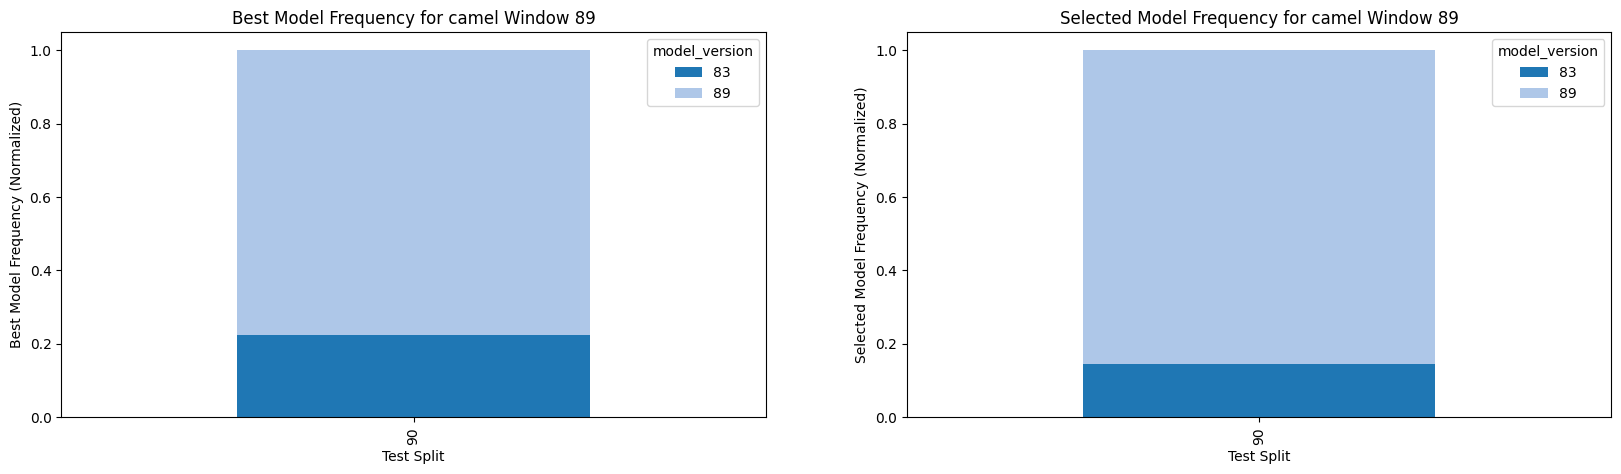

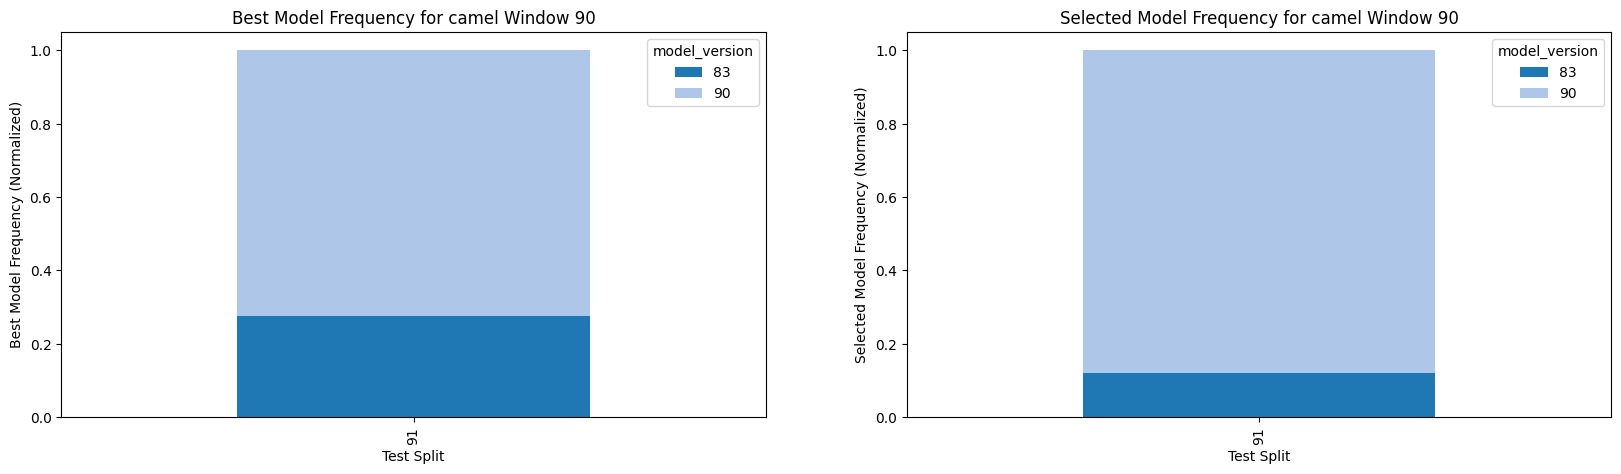

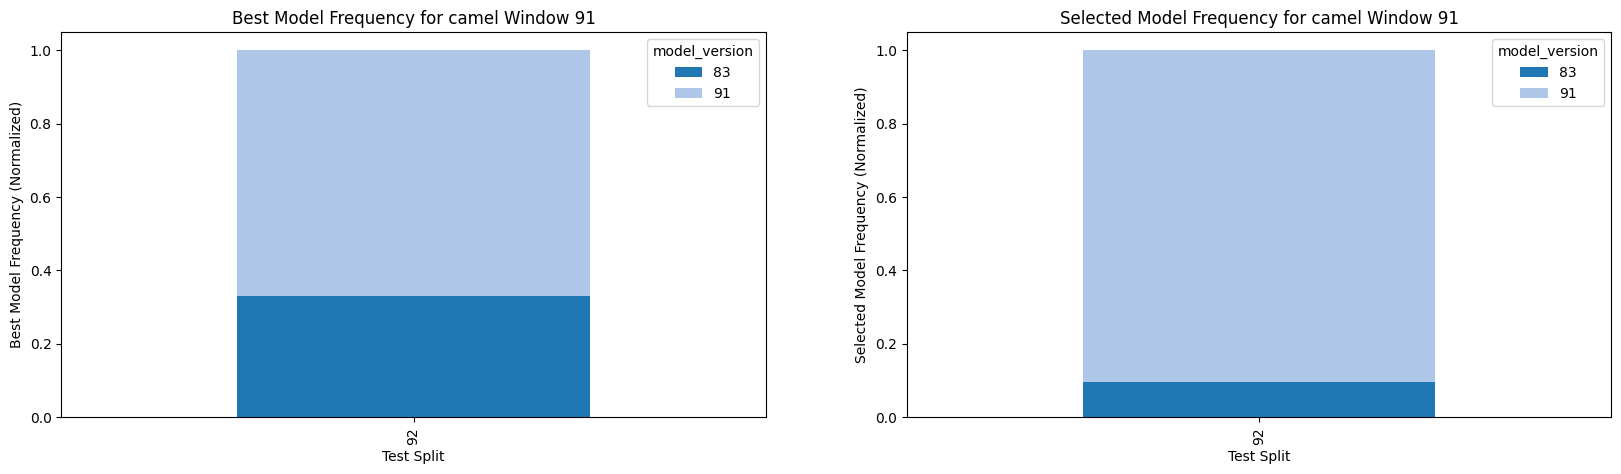

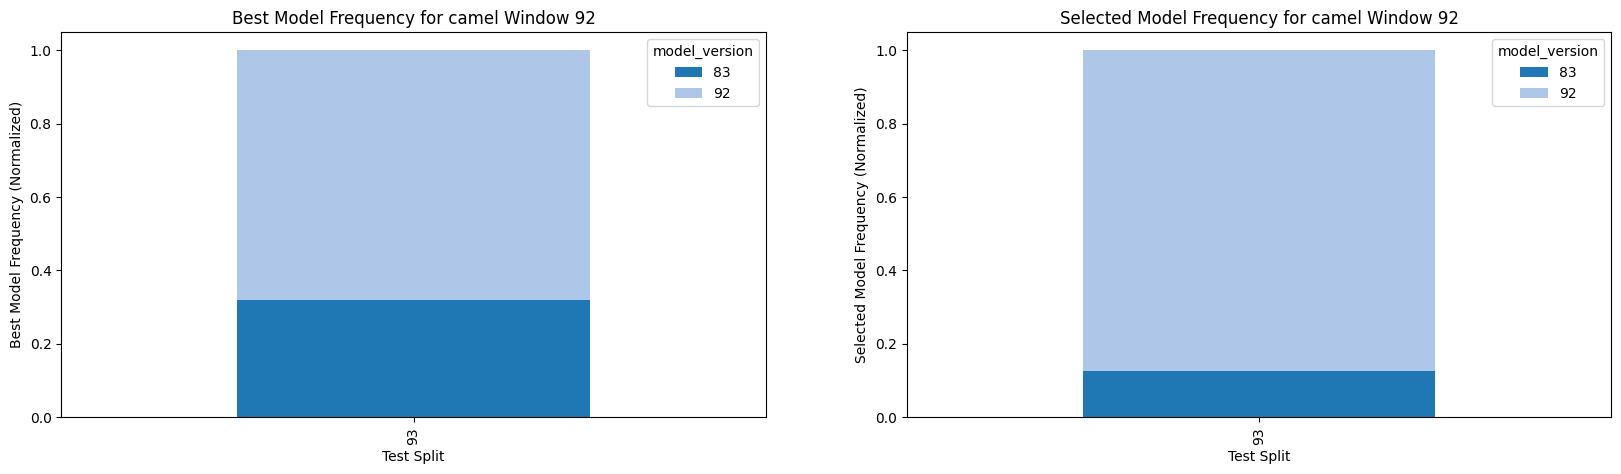

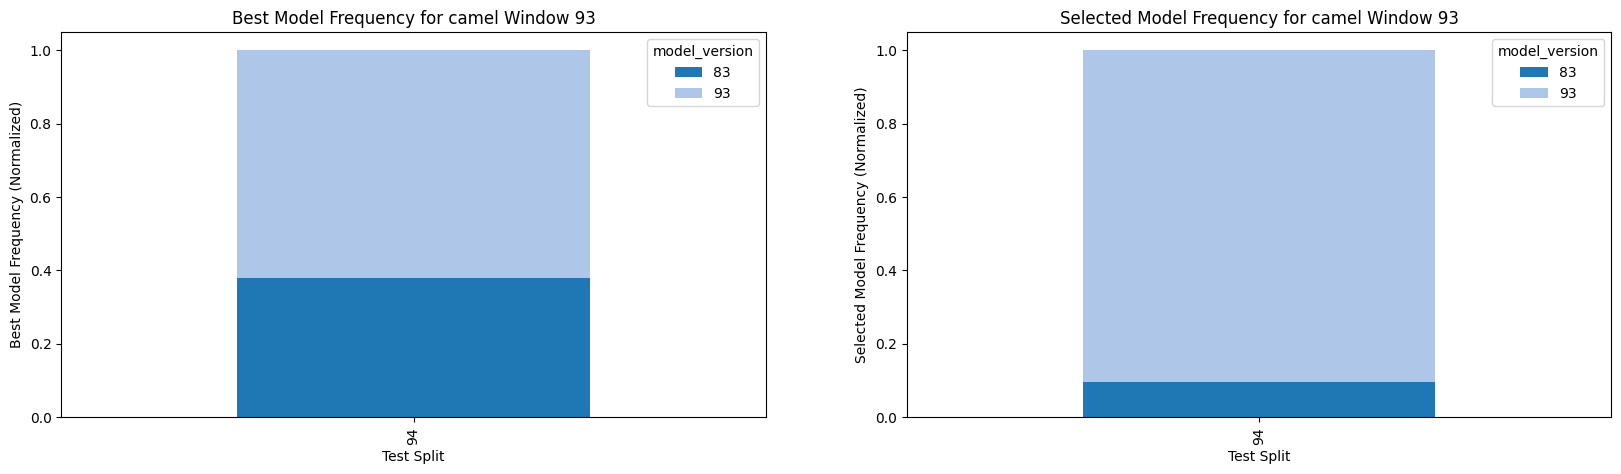

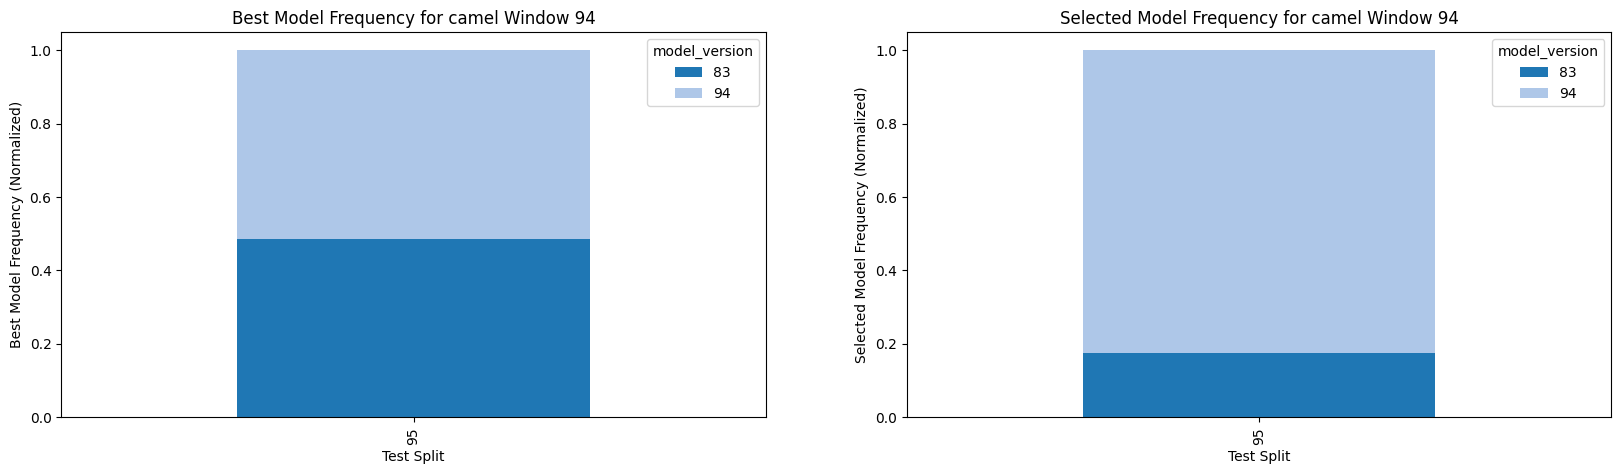

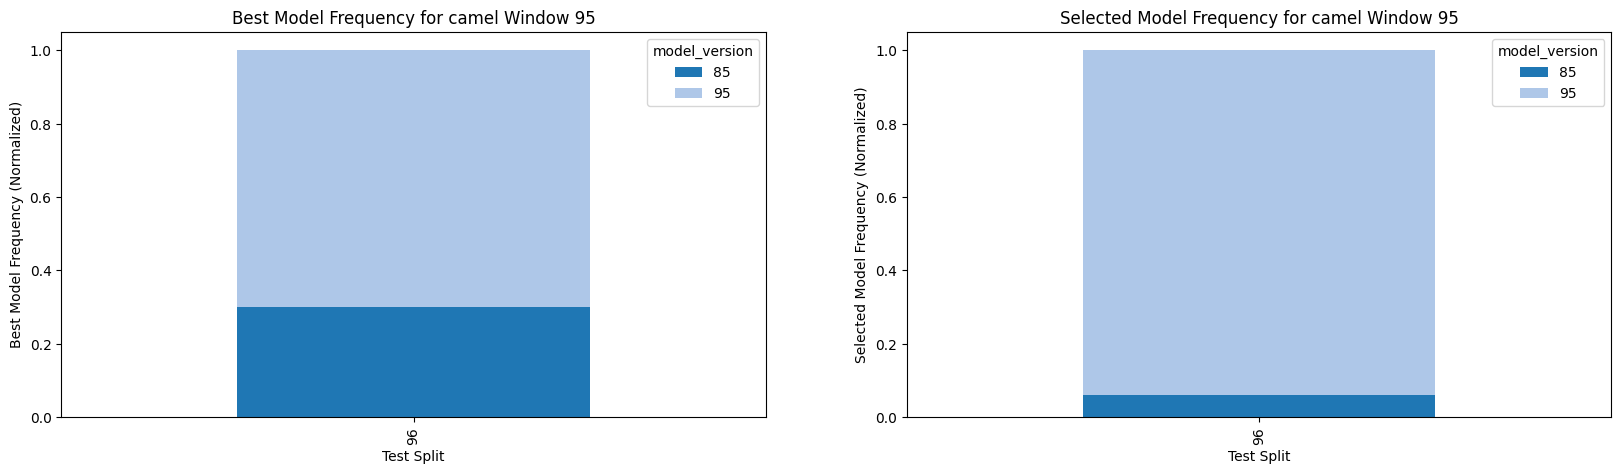

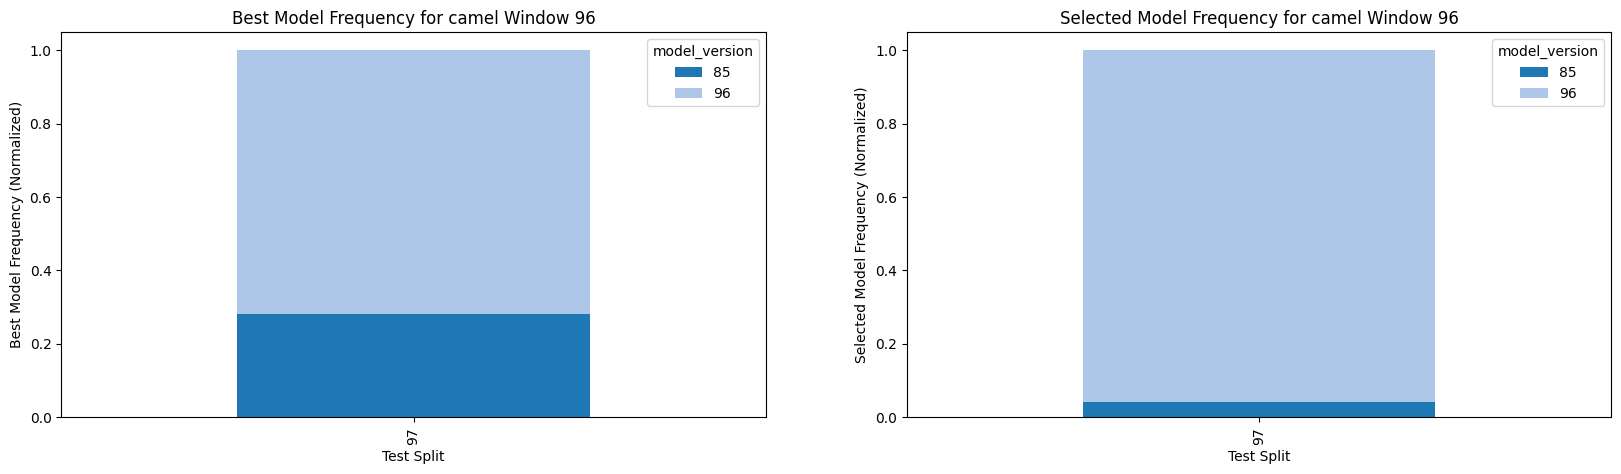

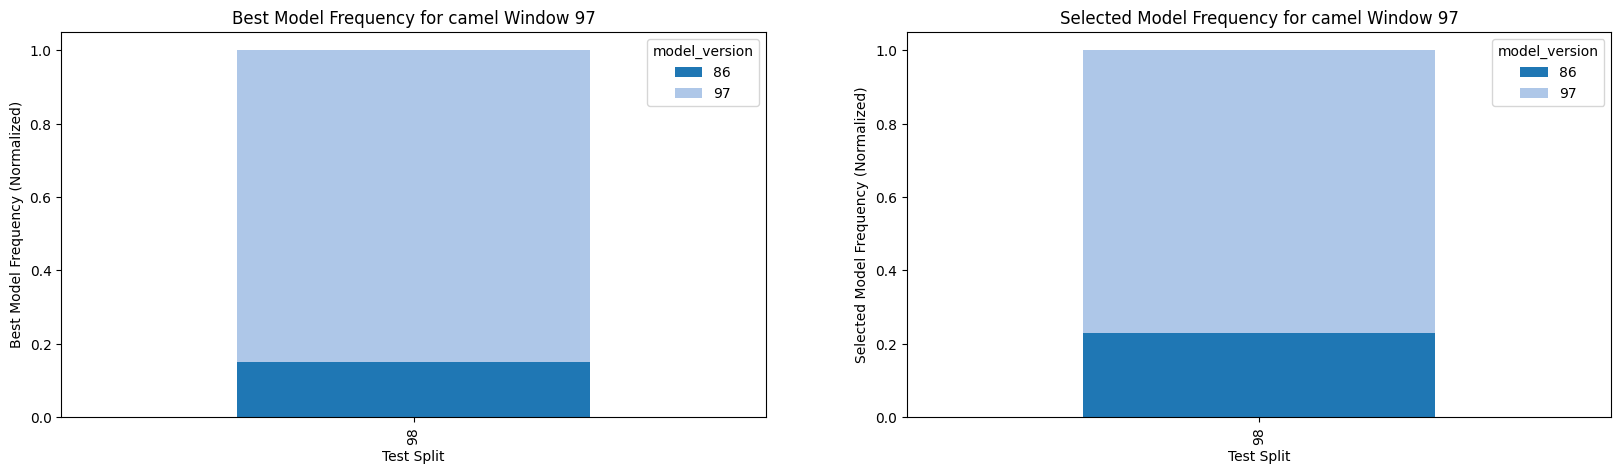

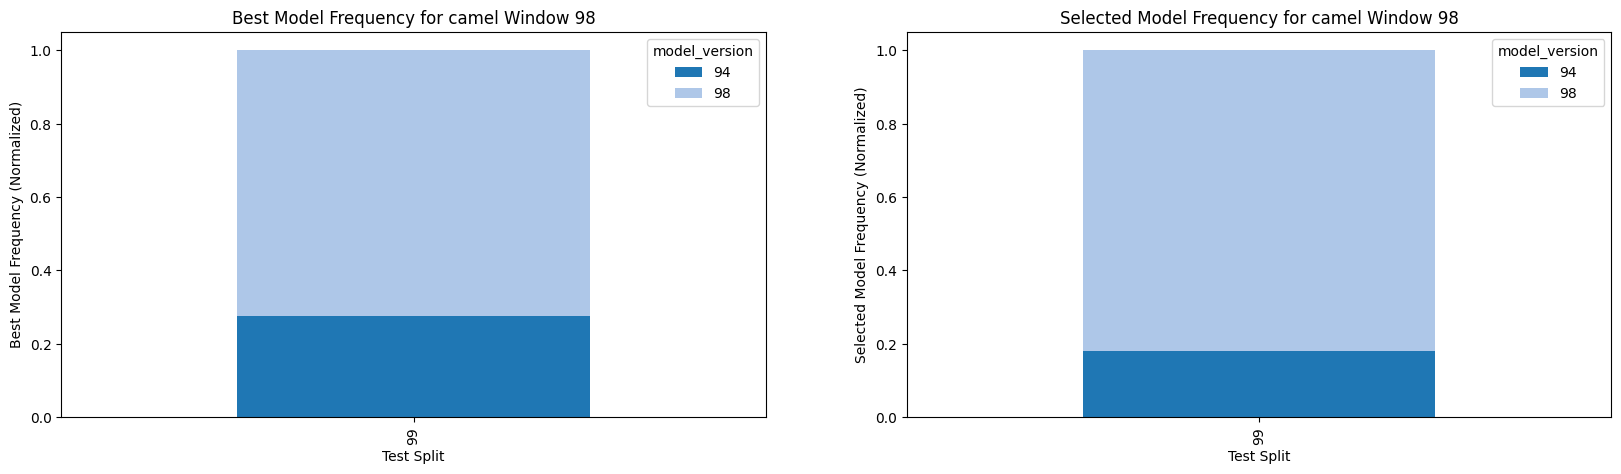

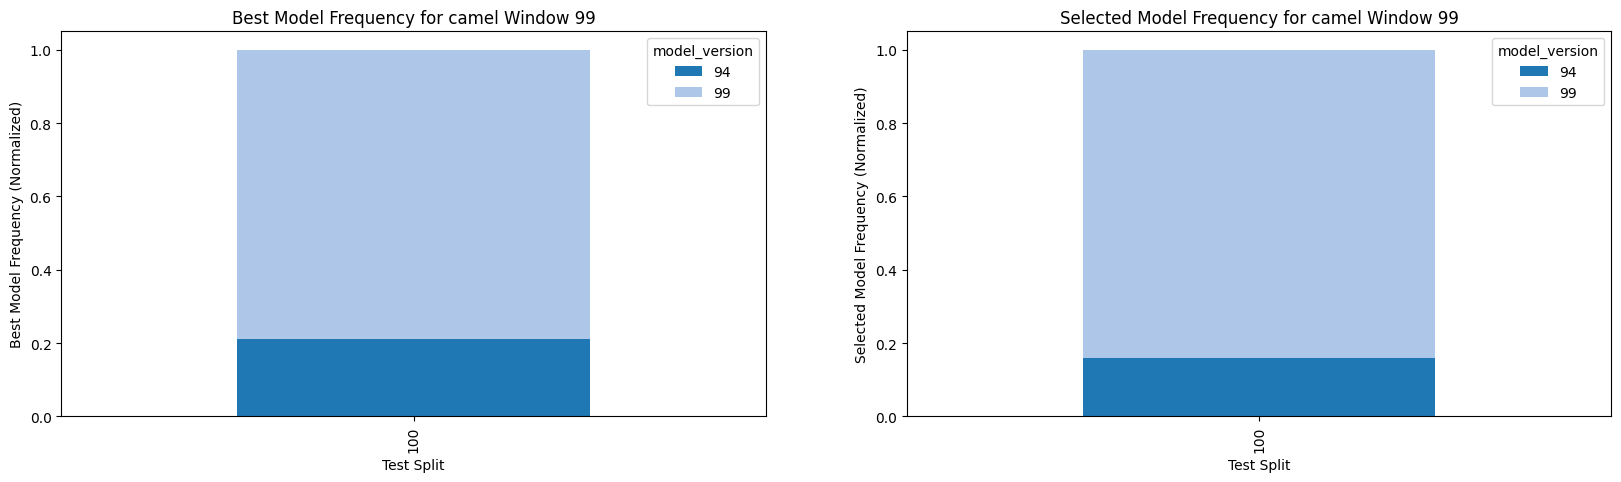

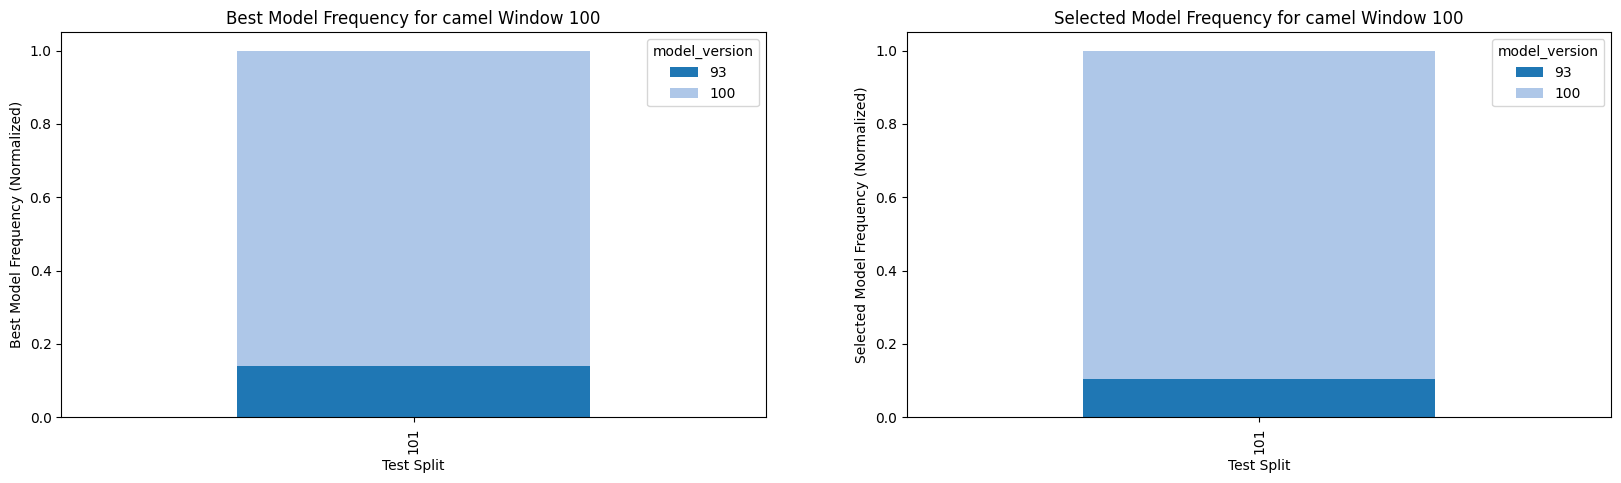

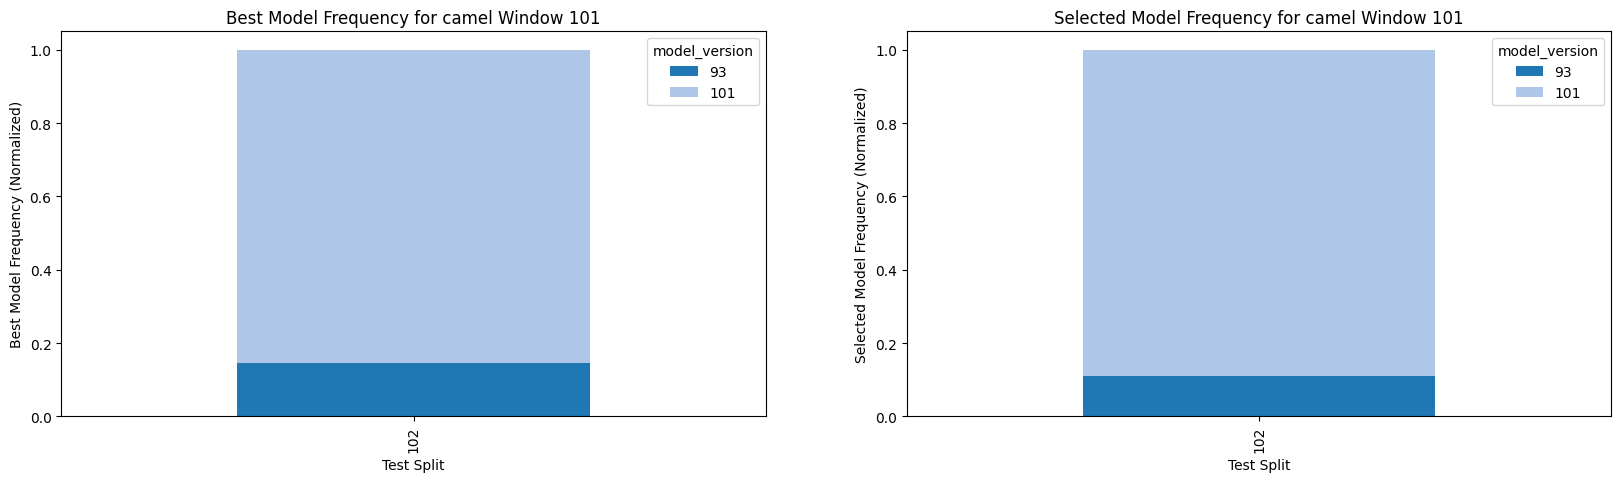

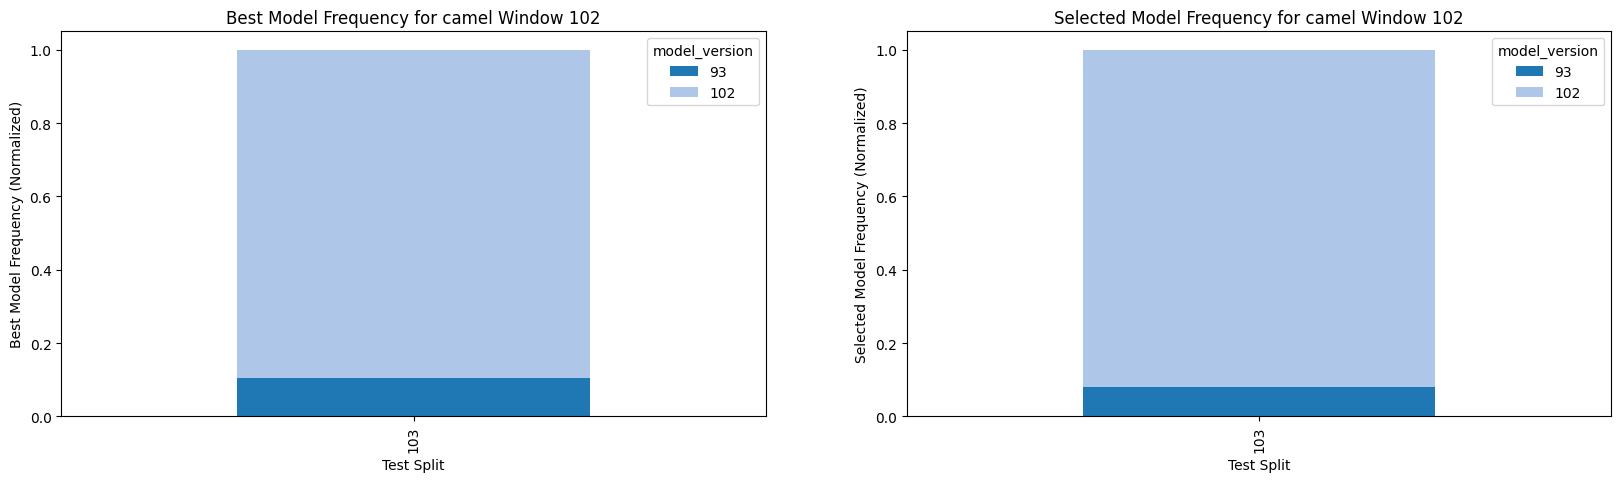

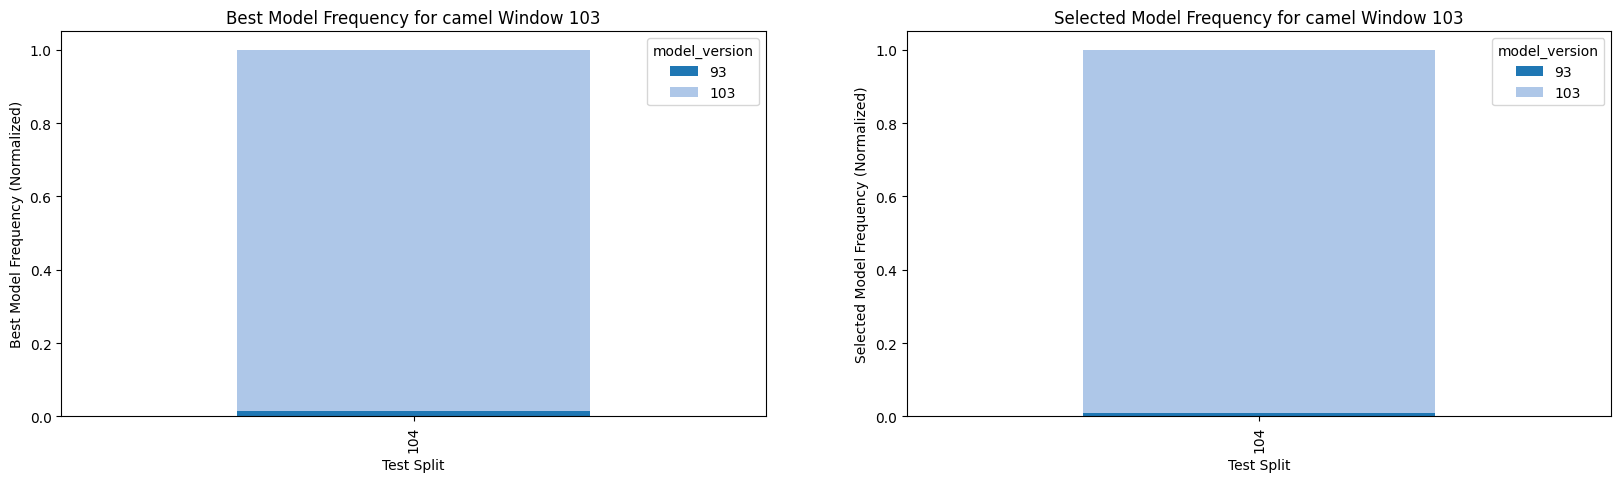

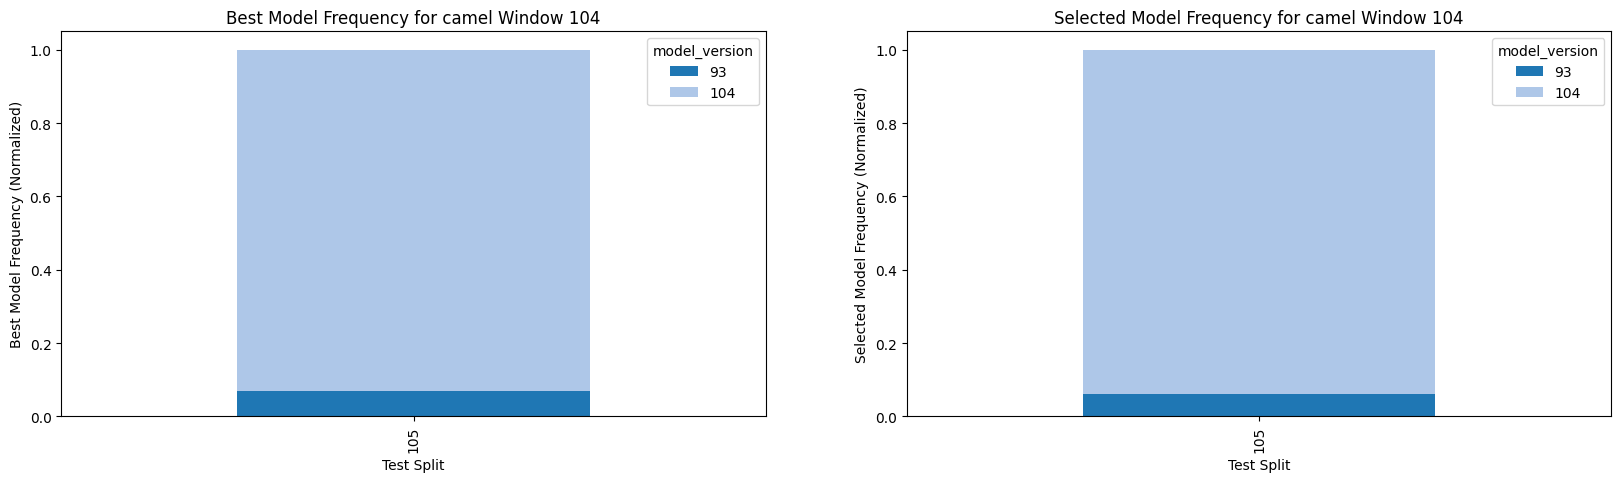

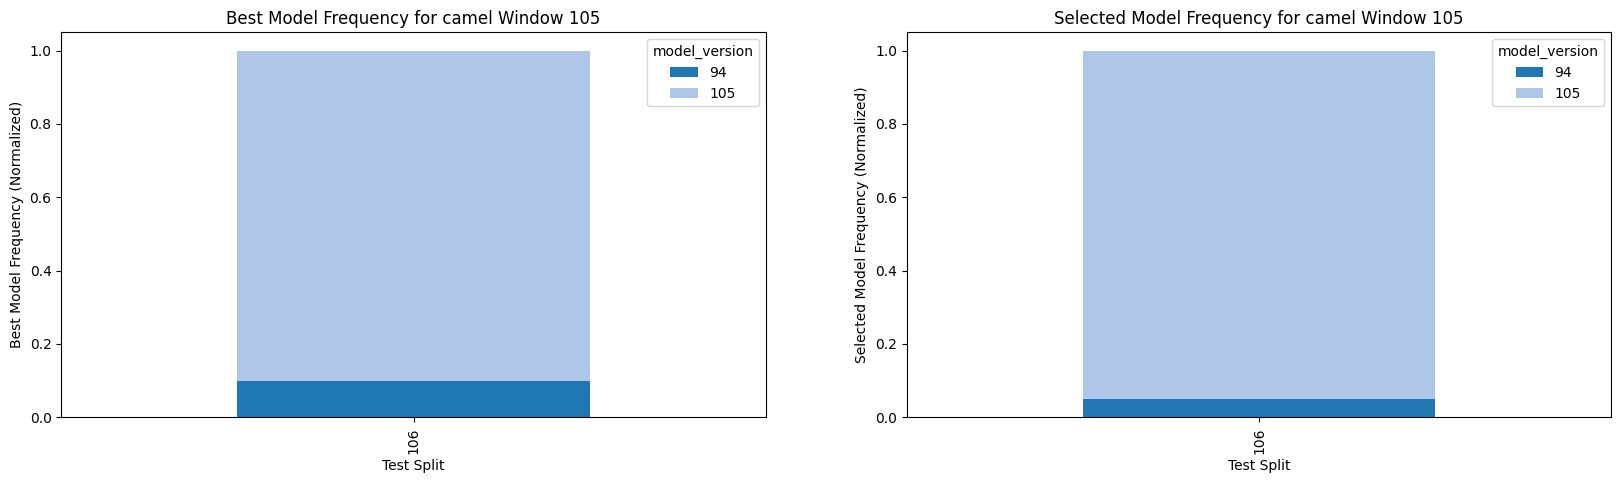

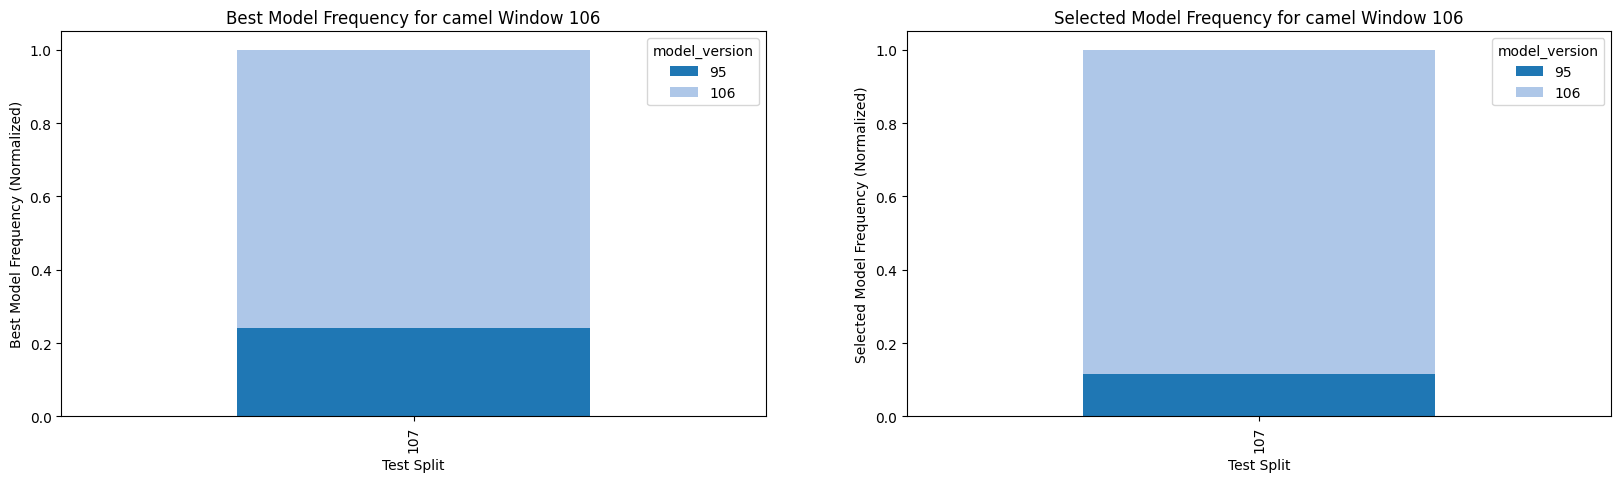

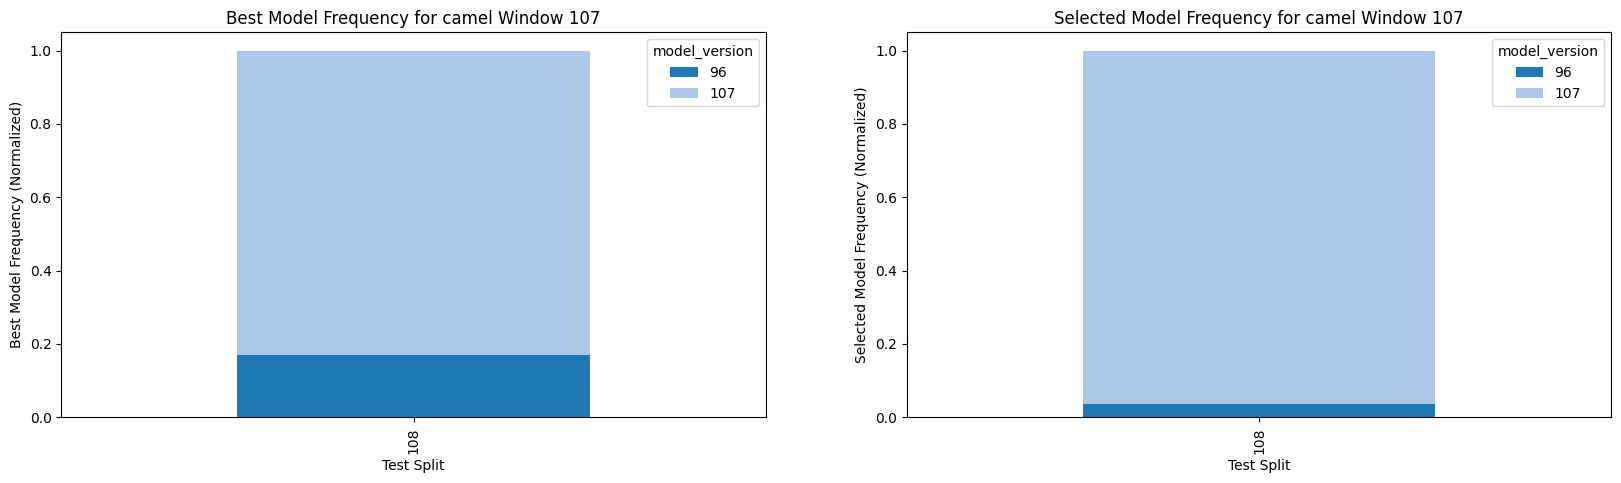

In [13]:
for i in range(MODEL_HISTORY,TOTAL_WINDOWS - 1):
    temp_selektmodel_df = selektmodel_df[selektmodel_df["window"] == i]
    temp_selektmodel_df = temp_selektmodel_df[temp_selektmodel_df["test_split"] == i + 1]
    temp_bestmodel_df = bestmodel_df[bestmodel_df["window"] == i]
    temp_bestmodel_df = temp_bestmodel_df[temp_bestmodel_df["test_split"] == i + 1]
    # plot normalized best model frequency per test split side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

    # find unique models
    unique_models = set(temp_bestmodel_df["model_version"].unique()) | set(temp_selektmodel_df["model_version"].unique())
    unique_models = list(unique_models)
    unique_models.sort()

    # creating color palette
    palette_colors = sns.color_palette('tab20')
    palette_dict = {model_version: color for model_version, color in zip(unique_models, palette_colors)}

    # best model
    model_frequency_by_test_split = temp_bestmodel_df.groupby('test_split')['model_version'].value_counts().unstack().fillna(0)
    normalized_model_frequency_by_test_split = model_frequency_by_test_split.div(model_frequency_by_test_split.sum(axis=1), axis=0)
    p = normalized_model_frequency_by_test_split.plot(kind='bar', stacked=True, ax=ax1, color=palette_dict)
    p.set_xlabel("Test Split")
    p.set_ylabel("Best Model Frequency (Normalized)")
    p.set_title(f"Best Model Frequency for {PROJECT_NAME} Window {i}")
    
    # selected model
    model_frequency_by_test_split = temp_selektmodel_df.groupby('test_split')['model_version'].value_counts().unstack().fillna(0)
    normalized_model_frequency_by_test_split = model_frequency_by_test_split.div(model_frequency_by_test_split.sum(axis=1), axis=0)
    q = normalized_model_frequency_by_test_split.plot(kind='bar', stacked=True, ax=ax2, color=palette_dict)
    q.set_xlabel("Test Split")
    q.set_ylabel("Selected Model Frequency (Normalized)")
    q.set_title(f"Selected Model Frequency for {PROJECT_NAME} Window {i}")
    plt.show()